# 01 앙상블


(1) 보팅(Voting): 하드 보팅, 소프트 보팅

(2) 배깅(Bagging): 랜덤포레스트

(3) 부스팅(Boosting): GBM, XGBoost, LightGBM 

# 02 보팅&배깅

## 보팅(Voting)

In [12]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# 위스콘신 유방암 데이터셋 불러오기
cancer = load_breast_cancer()

X_features = cancer.data # 피처들
y_label = cancer.target # 라벨

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [15]:
# 타켓 레이블 값 확인
print(cancer.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [16]:
# train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [17]:
# 개별 모델: 로지스틱 회귀 & KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# Voting Classifier: 개별 모델을 Sotf Voting 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting = 'soft')

# Voting Classifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 {0:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

## 배깅(Bagging)

In [18]:
# 유방암 데이터셋 with 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9561


In [19]:
# GridSearchCV를 통한 랜덤포레스트의 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# 멀티코어 환경이라면 n_jobs=-1를 통해 모든 CPU 코어를 이용할 수 있음(CPU 병렬처리가 효과적)
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9451


In [20]:
# 최적 하이퍼파라미터는 그대로 살리고, n_estimators를 300으로 늘려보기
# 성능이 조금 올라갔다!
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=6, min_samples_leaf=8, min_samples_split=8, random_state = 0, n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9474


## Feature Importances 시각화

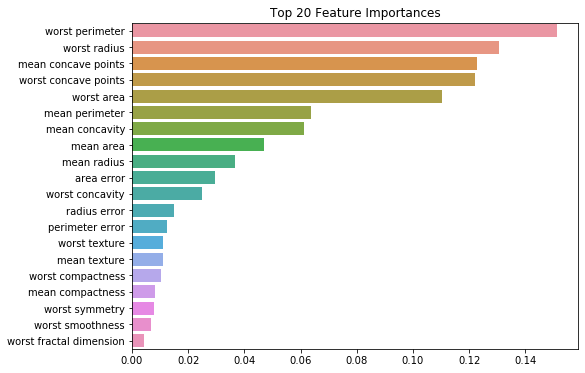

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_

# seaborn의 막대그래프로 표현하고자 pd.Series로 변환
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)

# 중요도 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

# 막대그래프
plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 03 부스팅

## GBM

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9561


## XGBoost

In [23]:
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# max_depth = 3, 학습률 = 0.1
# 부스팅 반복횟수 = 400

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
x_preds = xgb_wrapper.predict(X_test)

In [24]:
# 성능 확인을 위한 함수
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print('오차행렬 \n', confusion)
    print('\n정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nF1: {3:.4f}\nAUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    
# 예측 결과 확인
get_clf_eval(y_test, x_preds)

오차행렬 
 [[35  2]
 [ 1 76]]

정확도: 0.9737
정밀도: 0.9744
재현율: 0.9870
F1: 0.9806
AUC: 0.9665


In [25]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1 , max_depth = 3)
evals = [(X_test, y_test)] # 성능평가를 수행할 평가용 데이터셋
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, # 조기중단 최소횟수: 100
                eval_metric="logloss", eval_set = evals, verbose=True) # 성능평가방법: logloss
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [26]:
get_clf_eval(y_test, ws100_preds)

오차행렬 
 [[34  3]
 [ 1 76]]

정확도: 0.9649
정밀도: 0.9620
재현율: 0.9870
F1: 0.9744
AUC: 0.9530


## LightGBM

In [27]:
# 모듈 임포트
from lightgbm import LGBMClassifier

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 8:2로 학습: 테스트용 데이터셋 추출
X_trian, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 일전의 XGBoost와 동일하게 n_estimaters=400
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# XGBoost와 동일하게, LightGBM도 조기중단 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [28]:
get_clf_eval(y_test, preds)

오차행렬 
 [[33  4]
 [ 2 75]]

정확도: 0.9474
정밀도: 0.9494
재현율: 0.9740
F1: 0.9615
AUC: 0.9330


# 04 분류 실습

## 예제1: XGBoost, LightGBM
* weatherAUS.csv: 호주에서 다음날 비가 올지 안올지를 예측하기 위한 10년 간의 데이터셋

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
rain_df = pd.read_csv('C:/Users/USER/BITAmin/data/weatherAUS.csv')
print('dataset shape: ', rain_df.shape)
rain_df.head(3)

dataset shape:  (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [3]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

### 데이터 전처리

In [4]:
# RainToday, RainTomorrow: Yes/No -> 1/0
rain_df['RainToday'] = rain_df['RainToday'].map({'Yes':1, 'No':0})
rain_df['RainTomorrow'] = rain_df['RainTomorrow'].map({'Yes':1, 'No':0})

In [5]:
# Null값 처리
rain_df = rain_df.fillna(0)

In [6]:
# 'Date'열 삭제
del rain_df['Date']

In [7]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
Location         145460 non-null object
MinTemp          145460 non-null float64
MaxTemp          145460 non-null float64
Rainfall         145460 non-null float64
Evaporation      145460 non-null float64
Sunshine         145460 non-null float64
WindGustDir      145460 non-null object
WindGustSpeed    145460 non-null float64
WindDir9am       145460 non-null object
WindDir3pm       145460 non-null object
WindSpeed9am     145460 non-null float64
WindSpeed3pm     145460 non-null float64
Humidity9am      145460 non-null float64
Humidity3pm      145460 non-null float64
Pressure9am      145460 non-null float64
Pressure3pm      145460 non-null float64
Cloud9am         145460 non-null float64
Cloud3pm         145460 non-null float64
Temp9am          145460 non-null float64
Temp3pm          145460 non-null float64
RainToday        145460 non-null float64
RainTomorrow     145460 non-null

In [8]:
# Location: 위치
rain_df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [9]:
# Wind_Direction: 풍향
rain_df['WindGustDir'].unique()
rain_df['WindDir9am'].unique()
rain_df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 0, 'NE'], dtype=object)

In [10]:
# 레이블 인코딩: 범주형 변수
X_c = ['Location','WindGustDir','WindDir9am','WindDir3pm']

encoder = LabelEncoder()
for c in rain_df[X_c]:
    c_list = rain_df[c].tolist()
    encoder.fit(c_list)
    labels = encoder.transform(c_list)
    df = pd.DataFrame(data=labels, columns=[c])
    rain_df[c] = df[c]

print(rain_df)

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0              2     13.4     22.9       0.6          0.0       0.0   
1              2      7.4     25.1       0.0          0.0       0.0   
2              2     12.9     25.7       0.0          0.0       0.0   
3              2      9.2     28.0       0.0          0.0       0.0   
4              2     17.5     32.3       1.0          0.0       0.0   
5              2     14.6     29.7       0.2          0.0       0.0   
6              2     14.3     25.0       0.0          0.0       0.0   
7              2      7.7     26.7       0.0          0.0       0.0   
8              2      9.7     31.9       0.0          0.0       0.0   
9              2     13.1     30.1       1.4          0.0       0.0   
10             2     13.4     30.4       0.0          0.0       0.0   
11             2     15.9     21.7       2.2          0.0       0.0   
12             2     15.9     18.6      15.6          0.0       0.0   
13    

In [11]:
rain_df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.069546,23.020041,2.307990,3.107787,3.957069,8.099759,37.210525,7.708972,8.508188,...,67.624062,49.942204,912.253980,910.366122,2.738677,2.669559,16.784235,21.145405,0.219167,0.219146
std,14.228687,6.482693,7.407808,8.389771,4.163070,4.680785,5.020795,16.649265,4.877989,4.766401,...,20.987869,22.334356,310.151281,309.084382,3.132539,3.048519,6.712427,7.635396,0.413683,0.413669
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,11.000000,7.500000,17.800000,0.000000,0.000000,0.000000,4.000000,30.000000,4.000000,4.000000,...,56.000000,35.000000,1010.900000,1008.400000,0.000000,0.000000,12.100000,16.200000,0.000000,0.000000
50%,24.000000,11.900000,22.500000,0.000000,1.600000,0.100000,9.000000,37.000000,8.000000,9.000000,...,69.000000,51.000000,1016.600000,1014.200000,1.000000,1.000000,16.600000,20.900000,0.000000,0.000000
75%,36.000000,16.800000,28.200000,0.600000,5.200000,8.700000,12.000000,46.000000,12.000000,13.000000,...,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,16.000000,135.000000,16.000000,16.000000,...,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


In [12]:
rain_df = rain_df.astype(float)

In [13]:
rain_df.info() # non_null: 145460, float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
Location         145460 non-null float64
MinTemp          145460 non-null float64
MaxTemp          145460 non-null float64
Rainfall         145460 non-null float64
Evaporation      145460 non-null float64
Sunshine         145460 non-null float64
WindGustDir      145460 non-null float64
WindGustSpeed    145460 non-null float64
WindDir9am       145460 non-null float64
WindDir3pm       145460 non-null float64
WindSpeed9am     145460 non-null float64
WindSpeed3pm     145460 non-null float64
Humidity9am      145460 non-null float64
Humidity3pm      145460 non-null float64
Pressure9am      145460 non-null float64
Pressure3pm      145460 non-null float64
Cloud9am         145460 non-null float64
Cloud3pm         145460 non-null float64
Temp9am          145460 non-null float64
Temp3pm          145460 non-null float64
RainToday        145460 non-null float64
RainTomorrow     145460 non-

### 학습/테스트셋 분리

In [14]:
X_features = rain_df.iloc[:, :-1] 
y_label = rain_df.iloc[:,-1] # RainTomorrow
print('피처데이터 shape: {0}'.format(X_features.shape))

피처데이터 shape: (145460, 21)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습세트 shape: {0}, 테스트세트 shape: {1}'.format(X_train.shape, X_test.shape))

print('\n[학습 세트 레이블 값 분포 비율] \n', y_train.value_counts()/train_cnt)
print('\n[테스트 세트 레이블 값 분포 비율] \n', y_test.value_counts()/test_cnt)

학습세트 shape: (116368, 21), 테스트세트 shape: (29092, 21)

[학습 세트 레이블 값 분포 비율] 
 0.0    0.780773
1.0    0.219227
Name: RainTomorrow, dtype: float64

[테스트 세트 레이블 값 분포 비율] 
 0.0    0.781177
1.0    0.218823
Name: RainTomorrow, dtype: float64


### XGBoost 모델 학습 및 파라미터 튜닝

In [16]:
# 모델 학습
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_data=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.789412	validation_1-auc:0.788697
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.815934	validation_1-auc:0.815347
[2]	validation_0-auc:0.819583	validation_1-auc:0.817357
[3]	validation_0-auc:0.821642	validation_1-auc:0.818996
[4]	validation_0-auc:0.823128	validation_1-auc:0.820706
[5]	validation_0-auc:0.824175	validation_1-auc:0.821896
[6]	validation_0-auc:0.83196	validation_1-auc:0.830356
[7]	validation_0-auc:0.832089	validation_1-auc:0.83058
[8]	validation_0-auc:0.834526	validation_1-auc:0.833253
[9]	validation_0-auc:0.836314	validation_1-auc:0.834622
[10]	validation_0-auc:0.837138	validation_1-auc:0.835444
[11]	validation_0-auc:0.83806	validation_1-auc:0.836187
[12]	validation_0-auc:0.840003	validation_1-auc:0.838259
[13]	validation_0-auc:0.841039	validation_1-auc:0.839527
[14]	validation_0-auc:0.842633	validation_1-auc:0.84113
[

[142]	validation_0-auc:0.87871	validation_1-auc:0.873942
[143]	validation_0-auc:0.878741	validation_1-auc:0.873945
[144]	validation_0-auc:0.8788	validation_1-auc:0.873998
[145]	validation_0-auc:0.87888	validation_1-auc:0.874073
[146]	validation_0-auc:0.87895	validation_1-auc:0.87409
[147]	validation_0-auc:0.879003	validation_1-auc:0.87413
[148]	validation_0-auc:0.879144	validation_1-auc:0.874283
[149]	validation_0-auc:0.87921	validation_1-auc:0.87437
[150]	validation_0-auc:0.879286	validation_1-auc:0.874421
[151]	validation_0-auc:0.879479	validation_1-auc:0.874622
[152]	validation_0-auc:0.879532	validation_1-auc:0.874642
[153]	validation_0-auc:0.879694	validation_1-auc:0.874754
[154]	validation_0-auc:0.879805	validation_1-auc:0.874828
[155]	validation_0-auc:0.879915	validation_1-auc:0.874907
[156]	validation_0-auc:0.880033	validation_1-auc:0.875033
[157]	validation_0-auc:0.880101	validation_1-auc:0.875061
[158]	validation_0-auc:0.880197	validation_1-auc:0.875136
[159]	validation_0-auc:

[284]	validation_0-auc:0.88786	validation_1-auc:0.880396
[285]	validation_0-auc:0.887917	validation_1-auc:0.880463
[286]	validation_0-auc:0.887938	validation_1-auc:0.880468
[287]	validation_0-auc:0.887987	validation_1-auc:0.880489
[288]	validation_0-auc:0.888011	validation_1-auc:0.880489
[289]	validation_0-auc:0.888022	validation_1-auc:0.880493
[290]	validation_0-auc:0.888045	validation_1-auc:0.880495
[291]	validation_0-auc:0.888067	validation_1-auc:0.880503
[292]	validation_0-auc:0.888131	validation_1-auc:0.880533
[293]	validation_0-auc:0.888199	validation_1-auc:0.880601
[294]	validation_0-auc:0.888237	validation_1-auc:0.880615
[295]	validation_0-auc:0.888249	validation_1-auc:0.880617
[296]	validation_0-auc:0.888336	validation_1-auc:0.880659
[297]	validation_0-auc:0.888394	validation_1-auc:0.88071
[298]	validation_0-auc:0.888484	validation_1-auc:0.880795
[299]	validation_0-auc:0.888549	validation_1-auc:0.880821
[300]	validation_0-auc:0.888603	validation_1-auc:0.880855
[301]	validation

[426]	validation_0-auc:0.893367	validation_1-auc:0.883558
[427]	validation_0-auc:0.893384	validation_1-auc:0.883562
[428]	validation_0-auc:0.8934	validation_1-auc:0.883551
[429]	validation_0-auc:0.893404	validation_1-auc:0.883552
[430]	validation_0-auc:0.893411	validation_1-auc:0.883543
[431]	validation_0-auc:0.893458	validation_1-auc:0.88359
[432]	validation_0-auc:0.893493	validation_1-auc:0.883606
[433]	validation_0-auc:0.893531	validation_1-auc:0.883613
[434]	validation_0-auc:0.893537	validation_1-auc:0.883614
[435]	validation_0-auc:0.893548	validation_1-auc:0.883608
[436]	validation_0-auc:0.893562	validation_1-auc:0.883611
[437]	validation_0-auc:0.893573	validation_1-auc:0.883601
[438]	validation_0-auc:0.893613	validation_1-auc:0.883624
[439]	validation_0-auc:0.893649	validation_1-auc:0.883625
[440]	validation_0-auc:0.893667	validation_1-auc:0.88363
[441]	validation_0-auc:0.89369	validation_1-auc:0.883626
[442]	validation_0-auc:0.893736	validation_1-auc:0.883658
[443]	validation_0-

In [17]:
# 하이퍼파라미터 튜닝

xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.824024	validation_1-auc:0.822698
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.835332	validation_1-auc:0.83419
[2]	validation_0-auc:0.842203	validation_1-auc:0.840657
[3]	validation_0-auc:0.845089	validation_1-auc:0.843099
[4]	validation_0-auc:0.846689	validation_1-auc:0.84528
[5]	validation_0-auc:0.848923	validation_1-auc:0.846901
[6]	validation_0-auc:0.850891	validation_1-auc:0.848185
[7]	validation_0-auc:0.853446	validation_1-auc:0.850256
[8]	validation_0-auc:0.855143	validation_1-auc:0.852115
[9]	validation_0-auc:0.856225	validation_1-auc:0.852587
[10]	validation_0-auc:0.858199	validation_1-auc:0.854627
[11]	validation_0-auc:0.859025	validation_1-auc:0.855407
[12]	validation_0-auc:0.859634	validation_1-auc:0.856054
[13]	validation_0-auc:0.860106	validation_1-auc:0.856567
[14]	validation_0-auc:0.860822	validation_1-auc:0.857572


[40]	validation_0-auc:0.874964	validation_1-auc:0.869509
[41]	validation_0-auc:0.875327	validation_1-auc:0.869839
[42]	validation_0-auc:0.875931	validation_1-auc:0.870389
[43]	validation_0-auc:0.876317	validation_1-auc:0.87062
[44]	validation_0-auc:0.876798	validation_1-auc:0.871077
[45]	validation_0-auc:0.877265	validation_1-auc:0.871499
[46]	validation_0-auc:0.877748	validation_1-auc:0.871846
[47]	validation_0-auc:0.878129	validation_1-auc:0.872155
[48]	validation_0-auc:0.878569	validation_1-auc:0.872469
[49]	validation_0-auc:0.87892	validation_1-auc:0.872649
[50]	validation_0-auc:0.879369	validation_1-auc:0.873027
[51]	validation_0-auc:0.879747	validation_1-auc:0.873317
[52]	validation_0-auc:0.880076	validation_1-auc:0.873488
[53]	validation_0-auc:0.880481	validation_1-auc:0.87379
[54]	validation_0-auc:0.880702	validation_1-auc:0.873942
[55]	validation_0-auc:0.88091	validation_1-auc:0.874039
[56]	validation_0-auc:0.88127	validation_1-auc:0.874321
[57]	validation_0-auc:0.881603	valid

[82]	validation_0-auc:0.887764	validation_1-auc:0.879179
[83]	validation_0-auc:0.887968	validation_1-auc:0.879307
[84]	validation_0-auc:0.888071	validation_1-auc:0.879338
[85]	validation_0-auc:0.88826	validation_1-auc:0.879521
[86]	validation_0-auc:0.888506	validation_1-auc:0.87967
[87]	validation_0-auc:0.888627	validation_1-auc:0.879756
[88]	validation_0-auc:0.888888	validation_1-auc:0.879944
[89]	validation_0-auc:0.888972	validation_1-auc:0.879987
[90]	validation_0-auc:0.889194	validation_1-auc:0.880075
[91]	validation_0-auc:0.889292	validation_1-auc:0.88011
[92]	validation_0-auc:0.88951	validation_1-auc:0.880127
[93]	validation_0-auc:0.889656	validation_1-auc:0.880149
[94]	validation_0-auc:0.889859	validation_1-auc:0.88026
[95]	validation_0-auc:0.890028	validation_1-auc:0.88036
[96]	validation_0-auc:0.890228	validation_1-auc:0.880457
[97]	validation_0-auc:0.89037	validation_1-auc:0.880538
[98]	validation_0-auc:0.890458	validation_1-auc:0.880578
[99]	validation_0-auc:0.890514	validat

[22]	validation_0-auc:0.86608	validation_1-auc:0.862223
[23]	validation_0-auc:0.867072	validation_1-auc:0.862889
[24]	validation_0-auc:0.867356	validation_1-auc:0.863056
[25]	validation_0-auc:0.867822	validation_1-auc:0.863375
[26]	validation_0-auc:0.868473	validation_1-auc:0.86392
[27]	validation_0-auc:0.868946	validation_1-auc:0.864267
[28]	validation_0-auc:0.86947	validation_1-auc:0.864737
[29]	validation_0-auc:0.869833	validation_1-auc:0.865011
[30]	validation_0-auc:0.870451	validation_1-auc:0.86552
[31]	validation_0-auc:0.871	validation_1-auc:0.86599
[32]	validation_0-auc:0.871349	validation_1-auc:0.866346
[33]	validation_0-auc:0.87191	validation_1-auc:0.866777
[34]	validation_0-auc:0.872254	validation_1-auc:0.8671
[35]	validation_0-auc:0.872939	validation_1-auc:0.867603
[36]	validation_0-auc:0.873304	validation_1-auc:0.867922
[37]	validation_0-auc:0.873753	validation_1-auc:0.868324
[38]	validation_0-auc:0.874076	validation_1-auc:0.868518
[39]	validation_0-auc:0.874524	validation_

[64]	validation_0-auc:0.883315	validation_1-auc:0.876764
[65]	validation_0-auc:0.883459	validation_1-auc:0.87693
[66]	validation_0-auc:0.883774	validation_1-auc:0.877085
[67]	validation_0-auc:0.883999	validation_1-auc:0.8773
[68]	validation_0-auc:0.884248	validation_1-auc:0.877477
[69]	validation_0-auc:0.884472	validation_1-auc:0.877622
[70]	validation_0-auc:0.884674	validation_1-auc:0.877781
[71]	validation_0-auc:0.884781	validation_1-auc:0.877825
[72]	validation_0-auc:0.885022	validation_1-auc:0.877997
[73]	validation_0-auc:0.88517	validation_1-auc:0.87812
[74]	validation_0-auc:0.885412	validation_1-auc:0.878215
[75]	validation_0-auc:0.885514	validation_1-auc:0.878293
[76]	validation_0-auc:0.88573	validation_1-auc:0.878389
[77]	validation_0-auc:0.886004	validation_1-auc:0.878617
[78]	validation_0-auc:0.886431	validation_1-auc:0.878988
[79]	validation_0-auc:0.886671	validation_1-auc:0.879229
[80]	validation_0-auc:0.886795	validation_1-auc:0.879382
[81]	validation_0-auc:0.887029	valida

[3]	validation_0-auc:0.862764	validation_1-auc:0.856704
[4]	validation_0-auc:0.864859	validation_1-auc:0.858314
[5]	validation_0-auc:0.866777	validation_1-auc:0.86018
[6]	validation_0-auc:0.867373	validation_1-auc:0.860036
[7]	validation_0-auc:0.869603	validation_1-auc:0.861385
[8]	validation_0-auc:0.870946	validation_1-auc:0.862667
[9]	validation_0-auc:0.87162	validation_1-auc:0.862632
[10]	validation_0-auc:0.873016	validation_1-auc:0.863631
[11]	validation_0-auc:0.874023	validation_1-auc:0.86482
[12]	validation_0-auc:0.874729	validation_1-auc:0.8653
[13]	validation_0-auc:0.875417	validation_1-auc:0.865819
[14]	validation_0-auc:0.876202	validation_1-auc:0.866741
[15]	validation_0-auc:0.876923	validation_1-auc:0.867375
[16]	validation_0-auc:0.877977	validation_1-auc:0.868232
[17]	validation_0-auc:0.878733	validation_1-auc:0.868993
[18]	validation_0-auc:0.879609	validation_1-auc:0.869501
[19]	validation_0-auc:0.880272	validation_1-auc:0.869805
[20]	validation_0-auc:0.880938	validation_1

[45]	validation_0-auc:0.895947	validation_1-auc:0.880029
[46]	validation_0-auc:0.896428	validation_1-auc:0.880203
[47]	validation_0-auc:0.896779	validation_1-auc:0.880255
[48]	validation_0-auc:0.8973	validation_1-auc:0.880576
[49]	validation_0-auc:0.89784	validation_1-auc:0.880726
[50]	validation_0-auc:0.898289	validation_1-auc:0.881016
[51]	validation_0-auc:0.898598	validation_1-auc:0.88118
[52]	validation_0-auc:0.898966	validation_1-auc:0.881273
[53]	validation_0-auc:0.899468	validation_1-auc:0.881409
[54]	validation_0-auc:0.900046	validation_1-auc:0.881621
[55]	validation_0-auc:0.900417	validation_1-auc:0.881698
[56]	validation_0-auc:0.900716	validation_1-auc:0.881792
[57]	validation_0-auc:0.901028	validation_1-auc:0.882043
[58]	validation_0-auc:0.90137	validation_1-auc:0.882206
[59]	validation_0-auc:0.901886	validation_1-auc:0.882487
[60]	validation_0-auc:0.90229	validation_1-auc:0.882659
[61]	validation_0-auc:0.902698	validation_1-auc:0.88291
[62]	validation_0-auc:0.903024	validat

[87]	validation_0-auc:0.908978	validation_1-auc:0.885457
[88]	validation_0-auc:0.909455	validation_1-auc:0.88573
[89]	validation_0-auc:0.90971	validation_1-auc:0.885855
[90]	validation_0-auc:0.909898	validation_1-auc:0.885977
[91]	validation_0-auc:0.910009	validation_1-auc:0.886035
[92]	validation_0-auc:0.910131	validation_1-auc:0.886021
[93]	validation_0-auc:0.910249	validation_1-auc:0.886022
[94]	validation_0-auc:0.910369	validation_1-auc:0.886047
[95]	validation_0-auc:0.910689	validation_1-auc:0.88609
[96]	validation_0-auc:0.910878	validation_1-auc:0.88608
[97]	validation_0-auc:0.910976	validation_1-auc:0.886092
[98]	validation_0-auc:0.9114	validation_1-auc:0.886338
[99]	validation_0-auc:0.911639	validation_1-auc:0.886465
[0]	validation_0-auc:0.845305	validation_1-auc:0.840846
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.850687	validation_1-auc:0.844

[27]	validation_0-auc:0.885528	validation_1-auc:0.874183
[28]	validation_0-auc:0.886159	validation_1-auc:0.874615
[29]	validation_0-auc:0.886494	validation_1-auc:0.874647
[30]	validation_0-auc:0.887315	validation_1-auc:0.875167
[31]	validation_0-auc:0.887923	validation_1-auc:0.875524
[32]	validation_0-auc:0.888314	validation_1-auc:0.875768
[33]	validation_0-auc:0.888904	validation_1-auc:0.875973
[34]	validation_0-auc:0.889448	validation_1-auc:0.876268
[35]	validation_0-auc:0.889895	validation_1-auc:0.876589
[36]	validation_0-auc:0.890557	validation_1-auc:0.877134
[37]	validation_0-auc:0.891141	validation_1-auc:0.87741
[38]	validation_0-auc:0.891572	validation_1-auc:0.877657
[39]	validation_0-auc:0.89211	validation_1-auc:0.878109
[40]	validation_0-auc:0.892846	validation_1-auc:0.878594
[41]	validation_0-auc:0.893243	validation_1-auc:0.878815
[42]	validation_0-auc:0.893742	validation_1-auc:0.879103
[43]	validation_0-auc:0.894259	validation_1-auc:0.879353
[44]	validation_0-auc:0.89462	val

[69]	validation_0-auc:0.885815	validation_1-auc:0.876874
[70]	validation_0-auc:0.885961	validation_1-auc:0.876994
[71]	validation_0-auc:0.886191	validation_1-auc:0.87716
[72]	validation_0-auc:0.886474	validation_1-auc:0.87733
[73]	validation_0-auc:0.88658	validation_1-auc:0.877378
[74]	validation_0-auc:0.886806	validation_1-auc:0.877436
[75]	validation_0-auc:0.887041	validation_1-auc:0.877611
[76]	validation_0-auc:0.887162	validation_1-auc:0.877707
[77]	validation_0-auc:0.887376	validation_1-auc:0.877859
[78]	validation_0-auc:0.887896	validation_1-auc:0.878361
[79]	validation_0-auc:0.88799	validation_1-auc:0.878395
[80]	validation_0-auc:0.888168	validation_1-auc:0.878493
[81]	validation_0-auc:0.888291	validation_1-auc:0.878576
[82]	validation_0-auc:0.888629	validation_1-auc:0.878811
[83]	validation_0-auc:0.8888	validation_1-auc:0.878911
[84]	validation_0-auc:0.889096	validation_1-auc:0.879152
[85]	validation_0-auc:0.889188	validation_1-auc:0.879193
[86]	validation_0-auc:0.889302	valida

[9]	validation_0-auc:0.857739	validation_1-auc:0.853617
[10]	validation_0-auc:0.857721	validation_1-auc:0.853263
[11]	validation_0-auc:0.859519	validation_1-auc:0.855009
[12]	validation_0-auc:0.860483	validation_1-auc:0.855892
[13]	validation_0-auc:0.860959	validation_1-auc:0.856149
[14]	validation_0-auc:0.8623	validation_1-auc:0.857574
[15]	validation_0-auc:0.863285	validation_1-auc:0.858459
[16]	validation_0-auc:0.864111	validation_1-auc:0.859281
[17]	validation_0-auc:0.86492	validation_1-auc:0.860217
[18]	validation_0-auc:0.865468	validation_1-auc:0.860784
[19]	validation_0-auc:0.865934	validation_1-auc:0.861198
[20]	validation_0-auc:0.866631	validation_1-auc:0.861915
[21]	validation_0-auc:0.866728	validation_1-auc:0.862014
[22]	validation_0-auc:0.867073	validation_1-auc:0.862372
[23]	validation_0-auc:0.86775	validation_1-auc:0.863011
[24]	validation_0-auc:0.868347	validation_1-auc:0.863514
[25]	validation_0-auc:0.868967	validation_1-auc:0.864205
[26]	validation_0-auc:0.869519	valid

[51]	validation_0-auc:0.880137	validation_1-auc:0.873099
[52]	validation_0-auc:0.880482	validation_1-auc:0.873383
[53]	validation_0-auc:0.880756	validation_1-auc:0.873525
[54]	validation_0-auc:0.881205	validation_1-auc:0.873825
[55]	validation_0-auc:0.881577	validation_1-auc:0.874108
[56]	validation_0-auc:0.88209	validation_1-auc:0.874558
[57]	validation_0-auc:0.882362	validation_1-auc:0.874706
[58]	validation_0-auc:0.882597	validation_1-auc:0.87489
[59]	validation_0-auc:0.883049	validation_1-auc:0.875168
[60]	validation_0-auc:0.883434	validation_1-auc:0.875468
[61]	validation_0-auc:0.883682	validation_1-auc:0.875656
[62]	validation_0-auc:0.884064	validation_1-auc:0.875974
[63]	validation_0-auc:0.884363	validation_1-auc:0.876188
[64]	validation_0-auc:0.884763	validation_1-auc:0.87653
[65]	validation_0-auc:0.884883	validation_1-auc:0.876595
[66]	validation_0-auc:0.88508	validation_1-auc:0.876686
[67]	validation_0-auc:0.885313	validation_1-auc:0.87679
[68]	validation_0-auc:0.885499	valid

[93]	validation_0-auc:0.889913	validation_1-auc:0.879341
[94]	validation_0-auc:0.890047	validation_1-auc:0.87941
[95]	validation_0-auc:0.89012	validation_1-auc:0.879426
[96]	validation_0-auc:0.890154	validation_1-auc:0.879436
[97]	validation_0-auc:0.890439	validation_1-auc:0.879518
[98]	validation_0-auc:0.890549	validation_1-auc:0.879546
[99]	validation_0-auc:0.890923	validation_1-auc:0.879812
[0]	validation_0-auc:0.819682	validation_1-auc:0.817224
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.83644	validation_1-auc:0.832141
[2]	validation_0-auc:0.847076	validation_1-auc:0.843737
[3]	validation_0-auc:0.850355	validation_1-auc:0.847438
[4]	validation_0-auc:0.852543	validation_1-auc:0.849241
[5]	validation_0-auc:0.853945	validation_1-auc:0.850808
[6]	validation_0-auc:0.854633	validation_1-auc:0.851154
[7]	validation_0-auc:0.854957	validation_1-auc:0.851015

[33]	validation_0-auc:0.891019	validation_1-auc:0.876022
[34]	validation_0-auc:0.891689	validation_1-auc:0.876383
[35]	validation_0-auc:0.892319	validation_1-auc:0.876616
[36]	validation_0-auc:0.893001	validation_1-auc:0.87702
[37]	validation_0-auc:0.893597	validation_1-auc:0.877416
[38]	validation_0-auc:0.894029	validation_1-auc:0.877649
[39]	validation_0-auc:0.894637	validation_1-auc:0.878019
[40]	validation_0-auc:0.895401	validation_1-auc:0.878461
[41]	validation_0-auc:0.895984	validation_1-auc:0.87867
[42]	validation_0-auc:0.896493	validation_1-auc:0.878928
[43]	validation_0-auc:0.897149	validation_1-auc:0.879382
[44]	validation_0-auc:0.897731	validation_1-auc:0.879701
[45]	validation_0-auc:0.898393	validation_1-auc:0.880029
[46]	validation_0-auc:0.898724	validation_1-auc:0.880178
[47]	validation_0-auc:0.899307	validation_1-auc:0.88053
[48]	validation_0-auc:0.899901	validation_1-auc:0.88086
[49]	validation_0-auc:0.900236	validation_1-auc:0.880963
[50]	validation_0-auc:0.900734	vali

[75]	validation_0-auc:0.909017	validation_1-auc:0.88395
[76]	validation_0-auc:0.909065	validation_1-auc:0.883953
[77]	validation_0-auc:0.909533	validation_1-auc:0.884131
[78]	validation_0-auc:0.909945	validation_1-auc:0.884244
[79]	validation_0-auc:0.910014	validation_1-auc:0.884235
[80]	validation_0-auc:0.910383	validation_1-auc:0.884428
[81]	validation_0-auc:0.910414	validation_1-auc:0.884432
[82]	validation_0-auc:0.910884	validation_1-auc:0.88464
[83]	validation_0-auc:0.910996	validation_1-auc:0.884716
[84]	validation_0-auc:0.91103	validation_1-auc:0.884707
[85]	validation_0-auc:0.911116	validation_1-auc:0.884738
[86]	validation_0-auc:0.911458	validation_1-auc:0.884852
[87]	validation_0-auc:0.911628	validation_1-auc:0.884895
[88]	validation_0-auc:0.911679	validation_1-auc:0.884901
[89]	validation_0-auc:0.911713	validation_1-auc:0.884917
[90]	validation_0-auc:0.912037	validation_1-auc:0.885034
[91]	validation_0-auc:0.912169	validation_1-auc:0.885088
[92]	validation_0-auc:0.912456	val

[15]	validation_0-auc:0.878164	validation_1-auc:0.866998
[16]	validation_0-auc:0.879127	validation_1-auc:0.867787
[17]	validation_0-auc:0.8801	validation_1-auc:0.868619
[18]	validation_0-auc:0.8809	validation_1-auc:0.869112
[19]	validation_0-auc:0.881553	validation_1-auc:0.869842
[20]	validation_0-auc:0.882469	validation_1-auc:0.870838
[21]	validation_0-auc:0.883076	validation_1-auc:0.871255
[22]	validation_0-auc:0.883763	validation_1-auc:0.871575
[23]	validation_0-auc:0.884681	validation_1-auc:0.872287
[24]	validation_0-auc:0.885286	validation_1-auc:0.872693
[25]	validation_0-auc:0.886011	validation_1-auc:0.873068
[26]	validation_0-auc:0.886826	validation_1-auc:0.873596
[27]	validation_0-auc:0.887426	validation_1-auc:0.873851
[28]	validation_0-auc:0.888065	validation_1-auc:0.874282
[29]	validation_0-auc:0.888432	validation_1-auc:0.874429
[30]	validation_0-auc:0.888989	validation_1-auc:0.874729
[31]	validation_0-auc:0.889855	validation_1-auc:0.875413
[32]	validation_0-auc:0.890464	vali

[57]	validation_0-auc:0.901248	validation_1-auc:0.88126
[58]	validation_0-auc:0.901702	validation_1-auc:0.881501
[59]	validation_0-auc:0.902208	validation_1-auc:0.881755
[60]	validation_0-auc:0.902839	validation_1-auc:0.882103
[61]	validation_0-auc:0.903018	validation_1-auc:0.88214
[62]	validation_0-auc:0.903558	validation_1-auc:0.882424
[63]	validation_0-auc:0.904056	validation_1-auc:0.882669
[64]	validation_0-auc:0.904267	validation_1-auc:0.882859
[65]	validation_0-auc:0.904373	validation_1-auc:0.882896
[66]	validation_0-auc:0.904834	validation_1-auc:0.883044
[67]	validation_0-auc:0.905096	validation_1-auc:0.883186
[68]	validation_0-auc:0.905165	validation_1-auc:0.883214
[69]	validation_0-auc:0.905659	validation_1-auc:0.883509
[70]	validation_0-auc:0.905803	validation_1-auc:0.88359
[71]	validation_0-auc:0.906169	validation_1-auc:0.883714
[72]	validation_0-auc:0.906487	validation_1-auc:0.883852
[73]	validation_0-auc:0.906646	validation_1-auc:0.883941
[74]	validation_0-auc:0.90677	vali

[99]	validation_0-auc:0.912845	validation_1-auc:0.887382
[0]	validation_0-auc:0.846855	validation_1-auc:0.838884
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.853651	validation_1-auc:0.843141
[2]	validation_0-auc:0.862681	validation_1-auc:0.853386
[3]	validation_0-auc:0.866155	validation_1-auc:0.857063
[4]	validation_0-auc:0.868677	validation_1-auc:0.859486
[5]	validation_0-auc:0.870812	validation_1-auc:0.861224
[6]	validation_0-auc:0.871311	validation_1-auc:0.86146
[7]	validation_0-auc:0.871738	validation_1-auc:0.861615
[8]	validation_0-auc:0.873489	validation_1-auc:0.863409
[9]	validation_0-auc:0.874236	validation_1-auc:0.863697
[10]	validation_0-auc:0.874329	validation_1-auc:0.863481
[11]	validation_0-auc:0.875999	validation_1-auc:0.864992
[12]	validation_0-auc:0.877034	validation_1-auc:0.865804
[13]	validation_0-auc:0.877644	validation_1-auc:0.865897

In [18]:
# 2차 하이퍼파라미터 튜닝

xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_Rate=0.02,
                       max_depth=5, min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.816147	validation_1-auc:0.812654
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.822743	validation_1-auc:0.817775
[2]	validation_0-auc:0.836288	validation_1-auc:0.832372
[3]	validation_0-auc:0.84677	validation_1-auc:0.843103
[4]	validation_0-auc:0.852226	validation_1-auc:0.848064
[5]	validation_0-auc:0.854082	validation_1-auc:0.850068
[6]	validation_0-auc:0.855997	validation_1-auc:0.851697
[7]	validation_0-auc:0.855167	validation_1-auc:0.850673
[8]	validation_0-auc:0.857712	validation_1-auc:0.85307
[9]	validation_0-auc:0.859337	validation_1-auc:0.85434
[10]	validation_0-auc:0.859515	validation_1-auc:0.85406
[11]	validation_0-auc:0.860883	validation_1-auc:0.855663
[12]	validation_0-auc:0.861471	validation_1-auc:0.856167
[13]	validation_0-auc:0.861642	validation_1-auc:0.856118
[14]	validation_0-auc:0.86293	validation_1-auc:0.857687
[1

[142]	validation_0-auc:0.898767	validation_1-auc:0.884915
[143]	validation_0-auc:0.898949	validation_1-auc:0.885038
[144]	validation_0-auc:0.898975	validation_1-auc:0.885046
[145]	validation_0-auc:0.899101	validation_1-auc:0.88509
[146]	validation_0-auc:0.899196	validation_1-auc:0.885112
[147]	validation_0-auc:0.89932	validation_1-auc:0.885154
[148]	validation_0-auc:0.899483	validation_1-auc:0.885234
[149]	validation_0-auc:0.899675	validation_1-auc:0.885294
[150]	validation_0-auc:0.899868	validation_1-auc:0.885378
[151]	validation_0-auc:0.899971	validation_1-auc:0.885411
[152]	validation_0-auc:0.90015	validation_1-auc:0.885487
[153]	validation_0-auc:0.900219	validation_1-auc:0.885511
[154]	validation_0-auc:0.900283	validation_1-auc:0.885514
[155]	validation_0-auc:0.900426	validation_1-auc:0.885623
[156]	validation_0-auc:0.900602	validation_1-auc:0.885663
[157]	validation_0-auc:0.90076	validation_1-auc:0.885771
[158]	validation_0-auc:0.900866	validation_1-auc:0.885871
[159]	validation_0

[284]	validation_0-auc:0.911655	validation_1-auc:0.889657
[285]	validation_0-auc:0.91175	validation_1-auc:0.889679
[286]	validation_0-auc:0.911824	validation_1-auc:0.889707
[287]	validation_0-auc:0.911968	validation_1-auc:0.8898
[288]	validation_0-auc:0.91198	validation_1-auc:0.889796
[289]	validation_0-auc:0.912059	validation_1-auc:0.889797
[290]	validation_0-auc:0.912144	validation_1-auc:0.889832
[291]	validation_0-auc:0.912211	validation_1-auc:0.889865
[292]	validation_0-auc:0.9123	validation_1-auc:0.889879
[293]	validation_0-auc:0.91239	validation_1-auc:0.889893
[294]	validation_0-auc:0.912489	validation_1-auc:0.88991
[295]	validation_0-auc:0.912553	validation_1-auc:0.889906
[296]	validation_0-auc:0.912658	validation_1-auc:0.889939
[297]	validation_0-auc:0.912678	validation_1-auc:0.889939
[298]	validation_0-auc:0.912744	validation_1-auc:0.889955
[299]	validation_0-auc:0.912852	validation_1-auc:0.89004
[300]	validation_0-auc:0.912938	validation_1-auc:0.890041
[301]	validation_0-auc:

[426]	validation_0-auc:0.920166	validation_1-auc:0.89123
[427]	validation_0-auc:0.920193	validation_1-auc:0.891228
[428]	validation_0-auc:0.920243	validation_1-auc:0.89123
[429]	validation_0-auc:0.920256	validation_1-auc:0.891232
[430]	validation_0-auc:0.920288	validation_1-auc:0.891233
[431]	validation_0-auc:0.920327	validation_1-auc:0.891234
[432]	validation_0-auc:0.920334	validation_1-auc:0.891234
[433]	validation_0-auc:0.920339	validation_1-auc:0.891233
[434]	validation_0-auc:0.920402	validation_1-auc:0.891252
[435]	validation_0-auc:0.920476	validation_1-auc:0.891268
[436]	validation_0-auc:0.920519	validation_1-auc:0.891251
[437]	validation_0-auc:0.920564	validation_1-auc:0.891239
[438]	validation_0-auc:0.920611	validation_1-auc:0.891205
[439]	validation_0-auc:0.920741	validation_1-auc:0.891269
[440]	validation_0-auc:0.920753	validation_1-auc:0.891263
[441]	validation_0-auc:0.920831	validation_1-auc:0.891268
[442]	validation_0-auc:0.920911	validation_1-auc:0.891284
[443]	validation

[568]	validation_0-auc:0.92735	validation_1-auc:0.89205
[569]	validation_0-auc:0.927431	validation_1-auc:0.89209
[570]	validation_0-auc:0.92747	validation_1-auc:0.892113
[571]	validation_0-auc:0.927504	validation_1-auc:0.892104
[572]	validation_0-auc:0.927575	validation_1-auc:0.892121
[573]	validation_0-auc:0.927615	validation_1-auc:0.892137
[574]	validation_0-auc:0.927644	validation_1-auc:0.892132
[575]	validation_0-auc:0.92774	validation_1-auc:0.892172
[576]	validation_0-auc:0.9278	validation_1-auc:0.892175
[577]	validation_0-auc:0.927872	validation_1-auc:0.892188
[578]	validation_0-auc:0.927936	validation_1-auc:0.892247
[579]	validation_0-auc:0.927983	validation_1-auc:0.892274
[580]	validation_0-auc:0.928009	validation_1-auc:0.892265
[581]	validation_0-auc:0.928057	validation_1-auc:0.89229
[582]	validation_0-auc:0.92812	validation_1-auc:0.892306
[583]	validation_0-auc:0.928171	validation_1-auc:0.892303
[584]	validation_0-auc:0.928228	validation_1-auc:0.892307
[585]	validation_0-auc:

[710]	validation_0-auc:0.933315	validation_1-auc:0.892336
[711]	validation_0-auc:0.933337	validation_1-auc:0.89234
[712]	validation_0-auc:0.933385	validation_1-auc:0.892337
[713]	validation_0-auc:0.933426	validation_1-auc:0.892345
[714]	validation_0-auc:0.933455	validation_1-auc:0.892319
[715]	validation_0-auc:0.933513	validation_1-auc:0.892319
[716]	validation_0-auc:0.933586	validation_1-auc:0.892338
[717]	validation_0-auc:0.933633	validation_1-auc:0.892344
[718]	validation_0-auc:0.933653	validation_1-auc:0.892349
[719]	validation_0-auc:0.933741	validation_1-auc:0.892371
[720]	validation_0-auc:0.93378	validation_1-auc:0.892396
[721]	validation_0-auc:0.933835	validation_1-auc:0.892399
[722]	validation_0-auc:0.933877	validation_1-auc:0.892384
[723]	validation_0-auc:0.933893	validation_1-auc:0.892395
[724]	validation_0-auc:0.933914	validation_1-auc:0.8924
[725]	validation_0-auc:0.933975	validation_1-auc:0.8924
[726]	validation_0-auc:0.934015	validation_1-auc:0.892382
[727]	validation_0-a

[853]	validation_0-auc:0.938799	validation_1-auc:0.892704
[854]	validation_0-auc:0.938811	validation_1-auc:0.892702
[855]	validation_0-auc:0.938871	validation_1-auc:0.892715
[856]	validation_0-auc:0.938907	validation_1-auc:0.892699
[857]	validation_0-auc:0.938951	validation_1-auc:0.892726
[858]	validation_0-auc:0.938993	validation_1-auc:0.892735
[859]	validation_0-auc:0.939012	validation_1-auc:0.892725
[860]	validation_0-auc:0.939052	validation_1-auc:0.89273
[861]	validation_0-auc:0.9391	validation_1-auc:0.892734
[862]	validation_0-auc:0.939158	validation_1-auc:0.892744
[863]	validation_0-auc:0.939177	validation_1-auc:0.892743
[864]	validation_0-auc:0.939203	validation_1-auc:0.892734
[865]	validation_0-auc:0.939245	validation_1-auc:0.892735
[866]	validation_0-auc:0.939293	validation_1-auc:0.892711
[867]	validation_0-auc:0.939328	validation_1-auc:0.89271
[868]	validation_0-auc:0.939372	validation_1-auc:0.892708
[869]	validation_0-auc:0.939408	validation_1-auc:0.892698
[870]	validation_0

[995]	validation_0-auc:0.943626	validation_1-auc:0.893129
[996]	validation_0-auc:0.943634	validation_1-auc:0.89312
[997]	validation_0-auc:0.943645	validation_1-auc:0.893112
[998]	validation_0-auc:0.943677	validation_1-auc:0.89311
[999]	validation_0-auc:0.943722	validation_1-auc:0.89313
ROC AUC: 0.8931


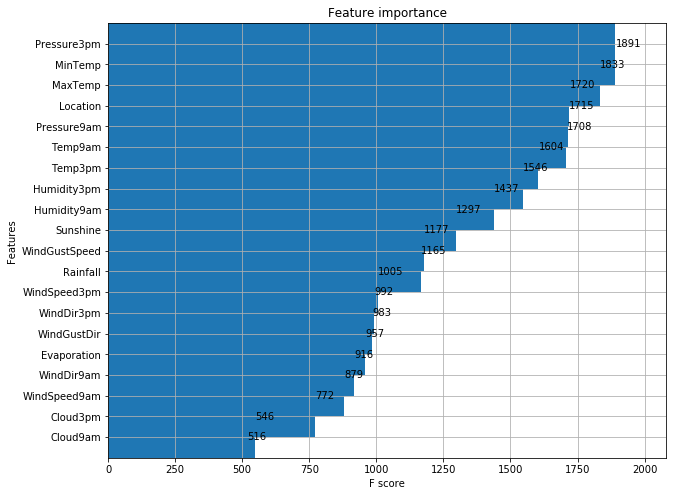

In [19]:
# 중요 피처 확인: Pressure9am, Pressure3am, MaxTemp
from xgboost import plot_importance

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=4)

### LightGBM 모델 학습 및 파라미터 튜닝

In [20]:
# 모델 학습 
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predicct_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.826545	valid_0's binary_logloss: 0.497113
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.838372	valid_0's binary_logloss: 0.475833
[3]	valid_0's auc: 0.841865	valid_0's binary_logloss: 0.459041
[4]	valid_0's auc: 0.845901	valid_0's binary_logloss: 0.445205
[5]	valid_0's auc: 0.849377	valid_0's binary_logloss: 0.433658
[6]	valid_0's auc: 0.851602	valid_0's binary_logloss: 0.423736
[7]	valid_0's auc: 0.853517	valid_0's binary_logloss: 0.415382
[8]	valid_0's auc: 0.854921	valid_0's binary_logloss: 0.408034
[9]	valid_0's auc: 0.855814	valid_0's binary_logloss: 0.401837
[10]	valid_0's auc: 0.85643	valid_0's binary_logloss: 0.396581
[11]	valid_0's auc: 0.857756	valid_0's binary_logloss: 0.391679
[12]	valid_0's auc: 0.858666	valid_0's binary_logloss: 0.387476
[13]	valid_0's auc: 0.859355	valid_0's binary_logloss: 0.383757
[14]	valid_0's auc: 0.860255	valid_0's binary_logloss: 0.380312
[15]	valid_0's auc: 0.860812	valid_0's binary_loglos

[137]	valid_0's auc: 0.886939	valid_0's binary_logloss: 0.329304
[138]	valid_0's auc: 0.88707	valid_0's binary_logloss: 0.32913
[139]	valid_0's auc: 0.887113	valid_0's binary_logloss: 0.329062
[140]	valid_0's auc: 0.887123	valid_0's binary_logloss: 0.329055
[141]	valid_0's auc: 0.88721	valid_0's binary_logloss: 0.328933
[142]	valid_0's auc: 0.887204	valid_0's binary_logloss: 0.328958
[143]	valid_0's auc: 0.887246	valid_0's binary_logloss: 0.328888
[144]	valid_0's auc: 0.88726	valid_0's binary_logloss: 0.328872
[145]	valid_0's auc: 0.887301	valid_0's binary_logloss: 0.328833
[146]	valid_0's auc: 0.887297	valid_0's binary_logloss: 0.328849
[147]	valid_0's auc: 0.887245	valid_0's binary_logloss: 0.328895
[148]	valid_0's auc: 0.887264	valid_0's binary_logloss: 0.328875
[149]	valid_0's auc: 0.887248	valid_0's binary_logloss: 0.328885
[150]	valid_0's auc: 0.887268	valid_0's binary_logloss: 0.328864
[151]	valid_0's auc: 0.887321	valid_0's binary_logloss: 0.328806
[152]	valid_0's auc: 0.887368

[272]	valid_0's auc: 0.889645	valid_0's binary_logloss: 0.325888
[273]	valid_0's auc: 0.88964	valid_0's binary_logloss: 0.325901
[274]	valid_0's auc: 0.88964	valid_0's binary_logloss: 0.325897
[275]	valid_0's auc: 0.889679	valid_0's binary_logloss: 0.325851
[276]	valid_0's auc: 0.889671	valid_0's binary_logloss: 0.32583
[277]	valid_0's auc: 0.889672	valid_0's binary_logloss: 0.325823
[278]	valid_0's auc: 0.889733	valid_0's binary_logloss: 0.325723
[279]	valid_0's auc: 0.889762	valid_0's binary_logloss: 0.325704
[280]	valid_0's auc: 0.889789	valid_0's binary_logloss: 0.325658
[281]	valid_0's auc: 0.889834	valid_0's binary_logloss: 0.3256
[282]	valid_0's auc: 0.889887	valid_0's binary_logloss: 0.325536
[283]	valid_0's auc: 0.889895	valid_0's binary_logloss: 0.325528
[284]	valid_0's auc: 0.889893	valid_0's binary_logloss: 0.325526
[285]	valid_0's auc: 0.889908	valid_0's binary_logloss: 0.325508
[286]	valid_0's auc: 0.88991	valid_0's binary_logloss: 0.3255
[287]	valid_0's auc: 0.889901	val

[402]	valid_0's auc: 0.891074	valid_0's binary_logloss: 0.324089
[403]	valid_0's auc: 0.891085	valid_0's binary_logloss: 0.324069
[404]	valid_0's auc: 0.891132	valid_0's binary_logloss: 0.324023
[405]	valid_0's auc: 0.891148	valid_0's binary_logloss: 0.324001
[406]	valid_0's auc: 0.891116	valid_0's binary_logloss: 0.32404
[407]	valid_0's auc: 0.891116	valid_0's binary_logloss: 0.324043
[408]	valid_0's auc: 0.891095	valid_0's binary_logloss: 0.324077
[409]	valid_0's auc: 0.891092	valid_0's binary_logloss: 0.324082
[410]	valid_0's auc: 0.891101	valid_0's binary_logloss: 0.324071
[411]	valid_0's auc: 0.891067	valid_0's binary_logloss: 0.324101
[412]	valid_0's auc: 0.891074	valid_0's binary_logloss: 0.324094
[413]	valid_0's auc: 0.891071	valid_0's binary_logloss: 0.324102
[414]	valid_0's auc: 0.891122	valid_0's binary_logloss: 0.324065
[415]	valid_0's auc: 0.891109	valid_0's binary_logloss: 0.324093
[416]	valid_0's auc: 0.89111	valid_0's binary_logloss: 0.324093
[417]	valid_0's auc: 0.8911

AttributeError: 'LGBMClassifier' object has no attribute 'predicct_proba'

In [21]:
# 하이퍼파라미터 튜닝

lgbm_clf = LGBMClassifier(n_estimators=200)
params = {'num_leaves':[32,64], 'max_depth':[128,160], 'min_child_samples':[60,100], 'subsample':[0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.830965	valid_0's binary_logloss: 0.496893	valid_1's auc: 0.827345	valid_1's binary_logloss: 0.496873
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841684	valid_0's binary_logloss: 0.475257	valid_1's auc: 0.837669	valid_1's binary_logloss: 0.475511
[3]	valid_0's auc: 0.843479	valid_0's binary_logloss: 0.458188	valid_1's auc: 0.839271	valid_1's binary_logloss: 0.458805
[4]	valid_0's auc: 0.8499	valid_0's binary_logloss: 0.443976	valid_1's auc: 0.846318	valid_1's binary_logloss: 0.444811
[5]	valid_0's auc: 0.852369	valid_0's binary_logloss: 0.432131	valid_1's auc: 0.84899	valid_1's binary_logloss: 0.433251
[6]	valid_0's auc: 0.854982	valid_0's binary_logloss: 0.421884	valid_1's auc: 0.851511	valid_1's binary_logloss: 0.423146
[7]	valid_0's auc: 0.856761	valid_0's binary_logloss: 0.413312	valid_1's auc: 0.853477	valid_1's binary_logloss: 0.414797
[8]	valid_0's auc: 0.85856	valid_0's binary_logloss: 0.405919	valid_1's auc: 0.854624	va

[71]	valid_0's auc: 0.894291	valid_0's binary_logloss: 0.321653	valid_1's auc: 0.88289	valid_1's binary_logloss: 0.334666
[72]	valid_0's auc: 0.89456	valid_0's binary_logloss: 0.321293	valid_1's auc: 0.883002	valid_1's binary_logloss: 0.334516
[73]	valid_0's auc: 0.89482	valid_0's binary_logloss: 0.320955	valid_1's auc: 0.883156	valid_1's binary_logloss: 0.334325
[74]	valid_0's auc: 0.895101	valid_0's binary_logloss: 0.320564	valid_1's auc: 0.883331	valid_1's binary_logloss: 0.334104
[75]	valid_0's auc: 0.895244	valid_0's binary_logloss: 0.32032	valid_1's auc: 0.883349	valid_1's binary_logloss: 0.334058
[76]	valid_0's auc: 0.895532	valid_0's binary_logloss: 0.319961	valid_1's auc: 0.883502	valid_1's binary_logloss: 0.333867
[77]	valid_0's auc: 0.895682	valid_0's binary_logloss: 0.319664	valid_1's auc: 0.883529	valid_1's binary_logloss: 0.33379
[78]	valid_0's auc: 0.895932	valid_0's binary_logloss: 0.31936	valid_1's auc: 0.88361	valid_1's binary_logloss: 0.333694
[79]	valid_0's auc: 0.8

[137]	valid_0's auc: 0.90579	valid_0's binary_logloss: 0.306011	valid_1's auc: 0.886762	valid_1's binary_logloss: 0.329315
[138]	valid_0's auc: 0.905939	valid_0's binary_logloss: 0.3058	valid_1's auc: 0.886857	valid_1's binary_logloss: 0.329181
[139]	valid_0's auc: 0.906077	valid_0's binary_logloss: 0.305624	valid_1's auc: 0.886888	valid_1's binary_logloss: 0.329149
[140]	valid_0's auc: 0.906229	valid_0's binary_logloss: 0.305431	valid_1's auc: 0.886887	valid_1's binary_logloss: 0.32916
[141]	valid_0's auc: 0.906315	valid_0's binary_logloss: 0.305301	valid_1's auc: 0.886865	valid_1's binary_logloss: 0.32918
[142]	valid_0's auc: 0.906478	valid_0's binary_logloss: 0.305093	valid_1's auc: 0.886883	valid_1's binary_logloss: 0.329158
[143]	valid_0's auc: 0.90663	valid_0's binary_logloss: 0.304886	valid_1's auc: 0.886946	valid_1's binary_logloss: 0.329092
[144]	valid_0's auc: 0.906751	valid_0's binary_logloss: 0.30474	valid_1's auc: 0.886922	valid_1's binary_logloss: 0.329125
[145]	valid_0's

[4]	valid_0's auc: 0.851528	valid_0's binary_logloss: 0.443908	valid_1's auc: 0.847379	valid_1's binary_logloss: 0.444798
[5]	valid_0's auc: 0.853732	valid_0's binary_logloss: 0.432288	valid_1's auc: 0.849144	valid_1's binary_logloss: 0.433485
[6]	valid_0's auc: 0.855885	valid_0's binary_logloss: 0.422159	valid_1's auc: 0.851501	valid_1's binary_logloss: 0.423679
[7]	valid_0's auc: 0.857013	valid_0's binary_logloss: 0.413745	valid_1's auc: 0.852538	valid_1's binary_logloss: 0.415555
[8]	valid_0's auc: 0.859223	valid_0's binary_logloss: 0.406185	valid_1's auc: 0.854329	valid_1's binary_logloss: 0.408458
[9]	valid_0's auc: 0.860106	valid_0's binary_logloss: 0.399718	valid_1's auc: 0.855176	valid_1's binary_logloss: 0.402278
[10]	valid_0's auc: 0.861278	valid_0's binary_logloss: 0.394036	valid_1's auc: 0.856334	valid_1's binary_logloss: 0.396739
[11]	valid_0's auc: 0.862407	valid_0's binary_logloss: 0.388955	valid_1's auc: 0.8573	valid_1's binary_logloss: 0.391896
[12]	valid_0's auc: 0.86

[71]	valid_0's auc: 0.893683	valid_0's binary_logloss: 0.322559	valid_1's auc: 0.881489	valid_1's binary_logloss: 0.336255
[72]	valid_0's auc: 0.893912	valid_0's binary_logloss: 0.322192	valid_1's auc: 0.881669	valid_1's binary_logloss: 0.336025
[73]	valid_0's auc: 0.894007	valid_0's binary_logloss: 0.321994	valid_1's auc: 0.881699	valid_1's binary_logloss: 0.335951
[74]	valid_0's auc: 0.894249	valid_0's binary_logloss: 0.321697	valid_1's auc: 0.881841	valid_1's binary_logloss: 0.335786
[75]	valid_0's auc: 0.894509	valid_0's binary_logloss: 0.321345	valid_1's auc: 0.881953	valid_1's binary_logloss: 0.335625
[76]	valid_0's auc: 0.894685	valid_0's binary_logloss: 0.321068	valid_1's auc: 0.881983	valid_1's binary_logloss: 0.335569
[77]	valid_0's auc: 0.894903	valid_0's binary_logloss: 0.320794	valid_1's auc: 0.882079	valid_1's binary_logloss: 0.335443
[78]	valid_0's auc: 0.895036	valid_0's binary_logloss: 0.320535	valid_1's auc: 0.882103	valid_1's binary_logloss: 0.335374
[79]	valid_0's a

[141]	valid_0's auc: 0.90567	valid_0's binary_logloss: 0.306395	valid_1's auc: 0.885205	valid_1's binary_logloss: 0.331302
[142]	valid_0's auc: 0.905829	valid_0's binary_logloss: 0.306168	valid_1's auc: 0.885289	valid_1's binary_logloss: 0.331185
[143]	valid_0's auc: 0.905966	valid_0's binary_logloss: 0.305964	valid_1's auc: 0.88535	valid_1's binary_logloss: 0.331109
[144]	valid_0's auc: 0.906039	valid_0's binary_logloss: 0.305834	valid_1's auc: 0.885346	valid_1's binary_logloss: 0.331132
[145]	valid_0's auc: 0.906215	valid_0's binary_logloss: 0.305629	valid_1's auc: 0.885387	valid_1's binary_logloss: 0.331083
[146]	valid_0's auc: 0.906309	valid_0's binary_logloss: 0.305509	valid_1's auc: 0.885425	valid_1's binary_logloss: 0.331049
[147]	valid_0's auc: 0.906412	valid_0's binary_logloss: 0.305372	valid_1's auc: 0.885405	valid_1's binary_logloss: 0.331066
[148]	valid_0's auc: 0.906503	valid_0's binary_logloss: 0.305259	valid_1's auc: 0.885392	valid_1's binary_logloss: 0.331062
[149]	vali

[7]	valid_0's auc: 0.858279	valid_0's binary_logloss: 0.413449	valid_1's auc: 0.854156	valid_1's binary_logloss: 0.415063
[8]	valid_0's auc: 0.86037	valid_0's binary_logloss: 0.405771	valid_1's auc: 0.855893	valid_1's binary_logloss: 0.407787
[9]	valid_0's auc: 0.861657	valid_0's binary_logloss: 0.399325	valid_1's auc: 0.856884	valid_1's binary_logloss: 0.401604
[10]	valid_0's auc: 0.862911	valid_0's binary_logloss: 0.393527	valid_1's auc: 0.857965	valid_1's binary_logloss: 0.396073
[11]	valid_0's auc: 0.863946	valid_0's binary_logloss: 0.38852	valid_1's auc: 0.85859	valid_1's binary_logloss: 0.391499
[12]	valid_0's auc: 0.865043	valid_0's binary_logloss: 0.384001	valid_1's auc: 0.859658	valid_1's binary_logloss: 0.387166
[13]	valid_0's auc: 0.865949	valid_0's binary_logloss: 0.38004	valid_1's auc: 0.860367	valid_1's binary_logloss: 0.383462
[14]	valid_0's auc: 0.866807	valid_0's binary_logloss: 0.37636	valid_1's auc: 0.861229	valid_1's binary_logloss: 0.37996
[15]	valid_0's auc: 0.867

[77]	valid_0's auc: 0.895221	valid_0's binary_logloss: 0.320151	valid_1's auc: 0.883869	valid_1's binary_logloss: 0.333783
[78]	valid_0's auc: 0.895534	valid_0's binary_logloss: 0.319752	valid_1's auc: 0.884039	valid_1's binary_logloss: 0.33357
[79]	valid_0's auc: 0.895822	valid_0's binary_logloss: 0.319434	valid_1's auc: 0.884105	valid_1's binary_logloss: 0.333457
[80]	valid_0's auc: 0.896006	valid_0's binary_logloss: 0.319195	valid_1's auc: 0.884168	valid_1's binary_logloss: 0.333333
[81]	valid_0's auc: 0.896234	valid_0's binary_logloss: 0.318918	valid_1's auc: 0.884265	valid_1's binary_logloss: 0.33322
[82]	valid_0's auc: 0.896423	valid_0's binary_logloss: 0.318677	valid_1's auc: 0.884326	valid_1's binary_logloss: 0.333147
[83]	valid_0's auc: 0.896624	valid_0's binary_logloss: 0.318413	valid_1's auc: 0.884451	valid_1's binary_logloss: 0.33299
[84]	valid_0's auc: 0.896851	valid_0's binary_logloss: 0.318102	valid_1's auc: 0.884548	valid_1's binary_logloss: 0.332849
[85]	valid_0's auc:

[143]	valid_0's auc: 0.906096	valid_0's binary_logloss: 0.305504	valid_1's auc: 0.88688	valid_1's binary_logloss: 0.329403
[144]	valid_0's auc: 0.906239	valid_0's binary_logloss: 0.305333	valid_1's auc: 0.886896	valid_1's binary_logloss: 0.329382
[145]	valid_0's auc: 0.90637	valid_0's binary_logloss: 0.305149	valid_1's auc: 0.88692	valid_1's binary_logloss: 0.329327
[146]	valid_0's auc: 0.906515	valid_0's binary_logloss: 0.304925	valid_1's auc: 0.886961	valid_1's binary_logloss: 0.329266
[147]	valid_0's auc: 0.906621	valid_0's binary_logloss: 0.304789	valid_1's auc: 0.886933	valid_1's binary_logloss: 0.329283
[148]	valid_0's auc: 0.906728	valid_0's binary_logloss: 0.304634	valid_1's auc: 0.886941	valid_1's binary_logloss: 0.329253
[149]	valid_0's auc: 0.906914	valid_0's binary_logloss: 0.3044	valid_1's auc: 0.887027	valid_1's binary_logloss: 0.329159
[150]	valid_0's auc: 0.907073	valid_0's binary_logloss: 0.304184	valid_1's auc: 0.88703	valid_1's binary_logloss: 0.329153
[151]	valid_0'

[12]	valid_0's auc: 0.863327	valid_0's binary_logloss: 0.384333	valid_1's auc: 0.859031	valid_1's binary_logloss: 0.386978
[13]	valid_0's auc: 0.864259	valid_0's binary_logloss: 0.380286	valid_1's auc: 0.859994	valid_1's binary_logloss: 0.383062
[14]	valid_0's auc: 0.865316	valid_0's binary_logloss: 0.376709	valid_1's auc: 0.86078	valid_1's binary_logloss: 0.379737
[15]	valid_0's auc: 0.866248	valid_0's binary_logloss: 0.373494	valid_1's auc: 0.86161	valid_1's binary_logloss: 0.376799
[16]	valid_0's auc: 0.866983	valid_0's binary_logloss: 0.370588	valid_1's auc: 0.86229	valid_1's binary_logloss: 0.374057
[17]	valid_0's auc: 0.867715	valid_0's binary_logloss: 0.367966	valid_1's auc: 0.862822	valid_1's binary_logloss: 0.371618
[18]	valid_0's auc: 0.868693	valid_0's binary_logloss: 0.365422	valid_1's auc: 0.863606	valid_1's binary_logloss: 0.369372
[19]	valid_0's auc: 0.869395	valid_0's binary_logloss: 0.363284	valid_1's auc: 0.864096	valid_1's binary_logloss: 0.367517
[20]	valid_0's auc:

[79]	valid_0's auc: 0.896072	valid_0's binary_logloss: 0.319079	valid_1's auc: 0.883617	valid_1's binary_logloss: 0.333658
[80]	valid_0's auc: 0.896273	valid_0's binary_logloss: 0.318841	valid_1's auc: 0.883678	valid_1's binary_logloss: 0.333609
[81]	valid_0's auc: 0.896465	valid_0's binary_logloss: 0.318598	valid_1's auc: 0.883753	valid_1's binary_logloss: 0.33349
[82]	valid_0's auc: 0.896687	valid_0's binary_logloss: 0.3183	valid_1's auc: 0.883934	valid_1's binary_logloss: 0.333246
[83]	valid_0's auc: 0.896897	valid_0's binary_logloss: 0.318018	valid_1's auc: 0.884052	valid_1's binary_logloss: 0.333113
[84]	valid_0's auc: 0.897131	valid_0's binary_logloss: 0.317716	valid_1's auc: 0.884123	valid_1's binary_logloss: 0.333007
[85]	valid_0's auc: 0.897287	valid_0's binary_logloss: 0.317466	valid_1's auc: 0.884173	valid_1's binary_logloss: 0.33294
[86]	valid_0's auc: 0.897469	valid_0's binary_logloss: 0.317253	valid_1's auc: 0.884213	valid_1's binary_logloss: 0.332888
[87]	valid_0's auc: 

[151]	valid_0's auc: 0.907858	valid_0's binary_logloss: 0.303289	valid_1's auc: 0.887186	valid_1's binary_logloss: 0.328781
[152]	valid_0's auc: 0.907991	valid_0's binary_logloss: 0.303085	valid_1's auc: 0.887222	valid_1's binary_logloss: 0.328743
[153]	valid_0's auc: 0.908089	valid_0's binary_logloss: 0.302902	valid_1's auc: 0.887231	valid_1's binary_logloss: 0.328715
[154]	valid_0's auc: 0.90817	valid_0's binary_logloss: 0.302777	valid_1's auc: 0.887257	valid_1's binary_logloss: 0.328668
[155]	valid_0's auc: 0.908307	valid_0's binary_logloss: 0.302547	valid_1's auc: 0.887313	valid_1's binary_logloss: 0.328609
[156]	valid_0's auc: 0.908442	valid_0's binary_logloss: 0.302359	valid_1's auc: 0.887349	valid_1's binary_logloss: 0.328574
[157]	valid_0's auc: 0.908567	valid_0's binary_logloss: 0.302153	valid_1's auc: 0.887391	valid_1's binary_logloss: 0.32853
[158]	valid_0's auc: 0.908735	valid_0's binary_logloss: 0.301945	valid_1's auc: 0.887393	valid_1's binary_logloss: 0.328529
[159]	vali

[19]	valid_0's auc: 0.869421	valid_0's binary_logloss: 0.363423	valid_1's auc: 0.863351	valid_1's binary_logloss: 0.368172
[20]	valid_0's auc: 0.870187	valid_0's binary_logloss: 0.361361	valid_1's auc: 0.863962	valid_1's binary_logloss: 0.366392
[21]	valid_0's auc: 0.87095	valid_0's binary_logloss: 0.359506	valid_1's auc: 0.864685	valid_1's binary_logloss: 0.364715
[22]	valid_0's auc: 0.871686	valid_0's binary_logloss: 0.357747	valid_1's auc: 0.865286	valid_1's binary_logloss: 0.363155
[23]	valid_0's auc: 0.872609	valid_0's binary_logloss: 0.355895	valid_1's auc: 0.86587	valid_1's binary_logloss: 0.361669
[24]	valid_0's auc: 0.873513	valid_0's binary_logloss: 0.35422	valid_1's auc: 0.866675	valid_1's binary_logloss: 0.360184
[25]	valid_0's auc: 0.874117	valid_0's binary_logloss: 0.352887	valid_1's auc: 0.867328	valid_1's binary_logloss: 0.358923
[26]	valid_0's auc: 0.874902	valid_0's binary_logloss: 0.351346	valid_1's auc: 0.867954	valid_1's binary_logloss: 0.35764
[27]	valid_0's auc: 

[87]	valid_0's auc: 0.8973	valid_0's binary_logloss: 0.317723	valid_1's auc: 0.883155	valid_1's binary_logloss: 0.334092
[88]	valid_0's auc: 0.897473	valid_0's binary_logloss: 0.317501	valid_1's auc: 0.883189	valid_1's binary_logloss: 0.334031
[89]	valid_0's auc: 0.897709	valid_0's binary_logloss: 0.317146	valid_1's auc: 0.883299	valid_1's binary_logloss: 0.333845
[90]	valid_0's auc: 0.897923	valid_0's binary_logloss: 0.316899	valid_1's auc: 0.883356	valid_1's binary_logloss: 0.333772
[91]	valid_0's auc: 0.898057	valid_0's binary_logloss: 0.31671	valid_1's auc: 0.883401	valid_1's binary_logloss: 0.333735
[92]	valid_0's auc: 0.898249	valid_0's binary_logloss: 0.31649	valid_1's auc: 0.883409	valid_1's binary_logloss: 0.333696
[93]	valid_0's auc: 0.898459	valid_0's binary_logloss: 0.316192	valid_1's auc: 0.883462	valid_1's binary_logloss: 0.33362
[94]	valid_0's auc: 0.898647	valid_0's binary_logloss: 0.315965	valid_1's auc: 0.883462	valid_1's binary_logloss: 0.333561
[95]	valid_0's auc: 0

[155]	valid_0's auc: 0.907405	valid_0's binary_logloss: 0.304008	valid_1's auc: 0.885643	valid_1's binary_logloss: 0.330779
[156]	valid_0's auc: 0.907521	valid_0's binary_logloss: 0.303854	valid_1's auc: 0.885672	valid_1's binary_logloss: 0.330756
[157]	valid_0's auc: 0.907606	valid_0's binary_logloss: 0.303747	valid_1's auc: 0.885697	valid_1's binary_logloss: 0.330737
[158]	valid_0's auc: 0.907742	valid_0's binary_logloss: 0.303568	valid_1's auc: 0.885716	valid_1's binary_logloss: 0.330711
[159]	valid_0's auc: 0.907924	valid_0's binary_logloss: 0.303342	valid_1's auc: 0.885762	valid_1's binary_logloss: 0.330677
[160]	valid_0's auc: 0.908098	valid_0's binary_logloss: 0.30312	valid_1's auc: 0.885807	valid_1's binary_logloss: 0.33062
[161]	valid_0's auc: 0.908247	valid_0's binary_logloss: 0.30293	valid_1's auc: 0.885815	valid_1's binary_logloss: 0.330612
[162]	valid_0's auc: 0.908448	valid_0's binary_logloss: 0.302696	valid_1's auc: 0.885832	valid_1's binary_logloss: 0.330582
[163]	valid

[24]	valid_0's auc: 0.874316	valid_0's binary_logloss: 0.353686	valid_1's auc: 0.868431	valid_1's binary_logloss: 0.358938
[25]	valid_0's auc: 0.875019	valid_0's binary_logloss: 0.352202	valid_1's auc: 0.868917	valid_1's binary_logloss: 0.35776
[26]	valid_0's auc: 0.875589	valid_0's binary_logloss: 0.350968	valid_1's auc: 0.869309	valid_1's binary_logloss: 0.356778
[27]	valid_0's auc: 0.876377	valid_0's binary_logloss: 0.349573	valid_1's auc: 0.87003	valid_1's binary_logloss: 0.35553
[28]	valid_0's auc: 0.876981	valid_0's binary_logloss: 0.348269	valid_1's auc: 0.870577	valid_1's binary_logloss: 0.354376
[29]	valid_0's auc: 0.877493	valid_0's binary_logloss: 0.347193	valid_1's auc: 0.870902	valid_1's binary_logloss: 0.353554
[30]	valid_0's auc: 0.878094	valid_0's binary_logloss: 0.346052	valid_1's auc: 0.871466	valid_1's binary_logloss: 0.35251
[31]	valid_0's auc: 0.878924	valid_0's binary_logloss: 0.344725	valid_1's auc: 0.872256	valid_1's binary_logloss: 0.351327
[32]	valid_0's auc: 

[92]	valid_0's auc: 0.898224	valid_0's binary_logloss: 0.316222	valid_1's auc: 0.884892	valid_1's binary_logloss: 0.332278
[93]	valid_0's auc: 0.898386	valid_0's binary_logloss: 0.316	valid_1's auc: 0.88496	valid_1's binary_logloss: 0.332151
[94]	valid_0's auc: 0.898579	valid_0's binary_logloss: 0.31571	valid_1's auc: 0.885047	valid_1's binary_logloss: 0.332029
[95]	valid_0's auc: 0.898744	valid_0's binary_logloss: 0.315465	valid_1's auc: 0.885118	valid_1's binary_logloss: 0.331936
[96]	valid_0's auc: 0.898948	valid_0's binary_logloss: 0.315187	valid_1's auc: 0.885188	valid_1's binary_logloss: 0.331815
[97]	valid_0's auc: 0.899118	valid_0's binary_logloss: 0.314932	valid_1's auc: 0.885288	valid_1's binary_logloss: 0.331675
[98]	valid_0's auc: 0.899226	valid_0's binary_logloss: 0.314787	valid_1's auc: 0.885284	valid_1's binary_logloss: 0.331666
[99]	valid_0's auc: 0.899408	valid_0's binary_logloss: 0.314537	valid_1's auc: 0.885367	valid_1's binary_logloss: 0.331557
[100]	valid_0's auc: 

[162]	valid_0's auc: 0.908739	valid_0's binary_logloss: 0.301935	valid_1's auc: 0.887456	valid_1's binary_logloss: 0.328519
[163]	valid_0's auc: 0.908867	valid_0's binary_logloss: 0.301765	valid_1's auc: 0.887502	valid_1's binary_logloss: 0.328472
[164]	valid_0's auc: 0.908971	valid_0's binary_logloss: 0.301607	valid_1's auc: 0.887541	valid_1's binary_logloss: 0.328399
[165]	valid_0's auc: 0.909107	valid_0's binary_logloss: 0.301442	valid_1's auc: 0.887589	valid_1's binary_logloss: 0.328349
[166]	valid_0's auc: 0.909268	valid_0's binary_logloss: 0.301239	valid_1's auc: 0.8876	valid_1's binary_logloss: 0.328342
[167]	valid_0's auc: 0.909358	valid_0's binary_logloss: 0.301107	valid_1's auc: 0.887603	valid_1's binary_logloss: 0.328351
[168]	valid_0's auc: 0.909511	valid_0's binary_logloss: 0.300879	valid_1's auc: 0.887684	valid_1's binary_logloss: 0.32822
[169]	valid_0's auc: 0.909636	valid_0's binary_logloss: 0.300717	valid_1's auc: 0.887661	valid_1's binary_logloss: 0.328229
[170]	valid

[30]	valid_0's auc: 0.888004	valid_0's binary_logloss: 0.334116	valid_1's auc: 0.876662	valid_1's binary_logloss: 0.34569
[31]	valid_0's auc: 0.888575	valid_0's binary_logloss: 0.332942	valid_1's auc: 0.877025	valid_1's binary_logloss: 0.344872
[32]	valid_0's auc: 0.889315	valid_0's binary_logloss: 0.331743	valid_1's auc: 0.877421	valid_1's binary_logloss: 0.344131
[33]	valid_0's auc: 0.890109	valid_0's binary_logloss: 0.330428	valid_1's auc: 0.877981	valid_1's binary_logloss: 0.343221
[34]	valid_0's auc: 0.89068	valid_0's binary_logloss: 0.329404	valid_1's auc: 0.878357	valid_1's binary_logloss: 0.342507
[35]	valid_0's auc: 0.891311	valid_0's binary_logloss: 0.328398	valid_1's auc: 0.878781	valid_1's binary_logloss: 0.341805
[36]	valid_0's auc: 0.892137	valid_0's binary_logloss: 0.327187	valid_1's auc: 0.879446	valid_1's binary_logloss: 0.340863
[37]	valid_0's auc: 0.892774	valid_0's binary_logloss: 0.326213	valid_1's auc: 0.879829	valid_1's binary_logloss: 0.340273
[38]	valid_0's auc

[101]	valid_0's auc: 0.914563	valid_0's binary_logloss: 0.29414	valid_1's auc: 0.88772	valid_1's binary_logloss: 0.328371
[102]	valid_0's auc: 0.914795	valid_0's binary_logloss: 0.293767	valid_1's auc: 0.887784	valid_1's binary_logloss: 0.328274
[103]	valid_0's auc: 0.915006	valid_0's binary_logloss: 0.293449	valid_1's auc: 0.887888	valid_1's binary_logloss: 0.328151
[104]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.293136	valid_1's auc: 0.887916	valid_1's binary_logloss: 0.328082
[105]	valid_0's auc: 0.915553	valid_0's binary_logloss: 0.292788	valid_1's auc: 0.887928	valid_1's binary_logloss: 0.328063
[106]	valid_0's auc: 0.915721	valid_0's binary_logloss: 0.292514	valid_1's auc: 0.887971	valid_1's binary_logloss: 0.327976
[107]	valid_0's auc: 0.915899	valid_0's binary_logloss: 0.292242	valid_1's auc: 0.888002	valid_1's binary_logloss: 0.327927
[108]	valid_0's auc: 0.916115	valid_0's binary_logloss: 0.291968	valid_1's auc: 0.888025	valid_1's binary_logloss: 0.327916
[109]	vali

[172]	valid_0's auc: 0.927931	valid_0's binary_logloss: 0.274382	valid_1's auc: 0.889042	valid_1's binary_logloss: 0.326716
[173]	valid_0's auc: 0.928136	valid_0's binary_logloss: 0.274072	valid_1's auc: 0.889063	valid_1's binary_logloss: 0.326667
[174]	valid_0's auc: 0.928258	valid_0's binary_logloss: 0.273866	valid_1's auc: 0.888996	valid_1's binary_logloss: 0.326729
[175]	valid_0's auc: 0.92841	valid_0's binary_logloss: 0.273637	valid_1's auc: 0.88898	valid_1's binary_logloss: 0.32677
[176]	valid_0's auc: 0.928584	valid_0's binary_logloss: 0.273407	valid_1's auc: 0.888982	valid_1's binary_logloss: 0.326776
[177]	valid_0's auc: 0.928691	valid_0's binary_logloss: 0.273228	valid_1's auc: 0.888997	valid_1's binary_logloss: 0.326778
Early stopping, best iteration is:
[147]	valid_0's auc: 0.924088	valid_0's binary_logloss: 0.280394	valid_1's auc: 0.88918	valid_1's binary_logloss: 0.326446
[1]	valid_0's auc: 0.841222	valid_0's binary_logloss: 0.495194	valid_1's auc: 0.834102	valid_1's bina

[63]	valid_0's auc: 0.904266	valid_0's binary_logloss: 0.309428	valid_1's auc: 0.884538	valid_1's binary_logloss: 0.332797
[64]	valid_0's auc: 0.904526	valid_0's binary_logloss: 0.309015	valid_1's auc: 0.884536	valid_1's binary_logloss: 0.332786
[65]	valid_0's auc: 0.904895	valid_0's binary_logloss: 0.308474	valid_1's auc: 0.884612	valid_1's binary_logloss: 0.332653
[66]	valid_0's auc: 0.905325	valid_0's binary_logloss: 0.307897	valid_1's auc: 0.884779	valid_1's binary_logloss: 0.332438
[67]	valid_0's auc: 0.905684	valid_0's binary_logloss: 0.307397	valid_1's auc: 0.884961	valid_1's binary_logloss: 0.332231
[68]	valid_0's auc: 0.905865	valid_0's binary_logloss: 0.307084	valid_1's auc: 0.885007	valid_1's binary_logloss: 0.332128
[69]	valid_0's auc: 0.906244	valid_0's binary_logloss: 0.306595	valid_1's auc: 0.885196	valid_1's binary_logloss: 0.331885
[70]	valid_0's auc: 0.906544	valid_0's binary_logloss: 0.30615	valid_1's auc: 0.885209	valid_1's binary_logloss: 0.331805
[71]	valid_0's au

[134]	valid_0's auc: 0.921946	valid_0's binary_logloss: 0.284657	valid_1's auc: 0.887698	valid_1's binary_logloss: 0.328309
[135]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.284339	valid_1's auc: 0.887759	valid_1's binary_logloss: 0.328225
[136]	valid_0's auc: 0.922242	valid_0's binary_logloss: 0.284172	valid_1's auc: 0.887724	valid_1's binary_logloss: 0.328269
[137]	valid_0's auc: 0.92243	valid_0's binary_logloss: 0.283934	valid_1's auc: 0.887775	valid_1's binary_logloss: 0.328229
[138]	valid_0's auc: 0.922545	valid_0's binary_logloss: 0.283696	valid_1's auc: 0.887772	valid_1's binary_logloss: 0.328236
[139]	valid_0's auc: 0.922748	valid_0's binary_logloss: 0.28343	valid_1's auc: 0.887771	valid_1's binary_logloss: 0.328236
[140]	valid_0's auc: 0.922919	valid_0's binary_logloss: 0.283112	valid_1's auc: 0.887801	valid_1's binary_logloss: 0.328186
[141]	valid_0's auc: 0.923141	valid_0's binary_logloss: 0.282775	valid_1's auc: 0.887849	valid_1's binary_logloss: 0.328114
[142]	vali

[1]	valid_0's auc: 0.84499	valid_0's binary_logloss: 0.495083	valid_1's auc: 0.838099	valid_1's binary_logloss: 0.495464
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.85405	valid_0's binary_logloss: 0.472038	valid_1's auc: 0.847743	valid_1's binary_logloss: 0.47303
[3]	valid_0's auc: 0.859343	valid_0's binary_logloss: 0.453555	valid_1's auc: 0.854128	valid_1's binary_logloss: 0.454891
[4]	valid_0's auc: 0.861392	valid_0's binary_logloss: 0.438729	valid_1's auc: 0.856234	valid_1's binary_logloss: 0.440467
[5]	valid_0's auc: 0.862956	valid_0's binary_logloss: 0.426295	valid_1's auc: 0.857018	valid_1's binary_logloss: 0.428646
[6]	valid_0's auc: 0.865361	valid_0's binary_logloss: 0.4156	valid_1's auc: 0.858833	valid_1's binary_logloss: 0.418388
[7]	valid_0's auc: 0.866911	valid_0's binary_logloss: 0.406483	valid_1's auc: 0.859888	valid_1's binary_logloss: 0.409807
[8]	valid_0's auc: 0.869012	valid_0's binary_logloss: 0.398457	valid_1's auc: 0.861178	val

[68]	valid_0's auc: 0.906004	valid_0's binary_logloss: 0.306528	valid_1's auc: 0.885976	valid_1's binary_logloss: 0.330691
[69]	valid_0's auc: 0.906246	valid_0's binary_logloss: 0.306064	valid_1's auc: 0.886043	valid_1's binary_logloss: 0.330538
[70]	valid_0's auc: 0.906553	valid_0's binary_logloss: 0.305627	valid_1's auc: 0.886075	valid_1's binary_logloss: 0.330449
[71]	valid_0's auc: 0.906791	valid_0's binary_logloss: 0.30521	valid_1's auc: 0.886156	valid_1's binary_logloss: 0.330317
[72]	valid_0's auc: 0.907114	valid_0's binary_logloss: 0.304824	valid_1's auc: 0.886323	valid_1's binary_logloss: 0.330119
[73]	valid_0's auc: 0.90738	valid_0's binary_logloss: 0.304423	valid_1's auc: 0.886348	valid_1's binary_logloss: 0.330019
[74]	valid_0's auc: 0.907645	valid_0's binary_logloss: 0.304101	valid_1's auc: 0.886464	valid_1's binary_logloss: 0.329887
[75]	valid_0's auc: 0.907935	valid_0's binary_logloss: 0.303736	valid_1's auc: 0.886499	valid_1's binary_logloss: 0.329856
[76]	valid_0's auc

[134]	valid_0's auc: 0.921797	valid_0's binary_logloss: 0.283946	valid_1's auc: 0.888457	valid_1's binary_logloss: 0.327
[135]	valid_0's auc: 0.921919	valid_0's binary_logloss: 0.283749	valid_1's auc: 0.888416	valid_1's binary_logloss: 0.327024
[136]	valid_0's auc: 0.922101	valid_0's binary_logloss: 0.283477	valid_1's auc: 0.888392	valid_1's binary_logloss: 0.32705
[137]	valid_0's auc: 0.922294	valid_0's binary_logloss: 0.283183	valid_1's auc: 0.88842	valid_1's binary_logloss: 0.327024
[138]	valid_0's auc: 0.922405	valid_0's binary_logloss: 0.282977	valid_1's auc: 0.888434	valid_1's binary_logloss: 0.326998
[139]	valid_0's auc: 0.922572	valid_0's binary_logloss: 0.282751	valid_1's auc: 0.888435	valid_1's binary_logloss: 0.327035
[140]	valid_0's auc: 0.922766	valid_0's binary_logloss: 0.282472	valid_1's auc: 0.888441	valid_1's binary_logloss: 0.327037
[141]	valid_0's auc: 0.922969	valid_0's binary_logloss: 0.28214	valid_1's auc: 0.888501	valid_1's binary_logloss: 0.326942
[142]	valid_0'

[1]	valid_0's auc: 0.843201	valid_0's binary_logloss: 0.495069	valid_1's auc: 0.8401	valid_1's binary_logloss: 0.495205
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.85251	valid_0's binary_logloss: 0.471991	valid_1's auc: 0.846928	valid_1's binary_logloss: 0.472917
[3]	valid_0's auc: 0.858671	valid_0's binary_logloss: 0.453612	valid_1's auc: 0.853352	valid_1's binary_logloss: 0.455079
[4]	valid_0's auc: 0.861009	valid_0's binary_logloss: 0.438598	valid_1's auc: 0.855558	valid_1's binary_logloss: 0.440547
[5]	valid_0's auc: 0.863372	valid_0's binary_logloss: 0.426034	valid_1's auc: 0.857306	valid_1's binary_logloss: 0.428454
[6]	valid_0's auc: 0.864896	valid_0's binary_logloss: 0.415473	valid_1's auc: 0.858479	valid_1's binary_logloss: 0.418409
[7]	valid_0's auc: 0.866339	valid_0's binary_logloss: 0.406242	valid_1's auc: 0.859968	valid_1's binary_logloss: 0.409588
[8]	valid_0's auc: 0.868141	valid_0's binary_logloss: 0.398276	valid_1's auc: 0.861426	v

[68]	valid_0's auc: 0.906227	valid_0's binary_logloss: 0.306229	valid_1's auc: 0.88637	valid_1's binary_logloss: 0.330505
[69]	valid_0's auc: 0.906508	valid_0's binary_logloss: 0.30579	valid_1's auc: 0.886376	valid_1's binary_logloss: 0.330451
[70]	valid_0's auc: 0.906902	valid_0's binary_logloss: 0.305276	valid_1's auc: 0.886556	valid_1's binary_logloss: 0.330253
[71]	valid_0's auc: 0.907172	valid_0's binary_logloss: 0.3049	valid_1's auc: 0.886597	valid_1's binary_logloss: 0.330171
[72]	valid_0's auc: 0.907356	valid_0's binary_logloss: 0.304633	valid_1's auc: 0.886582	valid_1's binary_logloss: 0.330179
[73]	valid_0's auc: 0.907773	valid_0's binary_logloss: 0.304097	valid_1's auc: 0.886736	valid_1's binary_logloss: 0.329979
[74]	valid_0's auc: 0.908005	valid_0's binary_logloss: 0.303772	valid_1's auc: 0.886804	valid_1's binary_logloss: 0.329885
[75]	valid_0's auc: 0.908244	valid_0's binary_logloss: 0.303436	valid_1's auc: 0.886817	valid_1's binary_logloss: 0.329861
[76]	valid_0's auc: 

[136]	valid_0's auc: 0.922209	valid_0's binary_logloss: 0.283245	valid_1's auc: 0.888959	valid_1's binary_logloss: 0.326675
[137]	valid_0's auc: 0.92234	valid_0's binary_logloss: 0.283059	valid_1's auc: 0.888949	valid_1's binary_logloss: 0.326699
[138]	valid_0's auc: 0.922534	valid_0's binary_logloss: 0.282769	valid_1's auc: 0.888967	valid_1's binary_logloss: 0.326658
[139]	valid_0's auc: 0.922728	valid_0's binary_logloss: 0.282506	valid_1's auc: 0.889003	valid_1's binary_logloss: 0.326616
[140]	valid_0's auc: 0.92287	valid_0's binary_logloss: 0.282279	valid_1's auc: 0.889061	valid_1's binary_logloss: 0.326576
[141]	valid_0's auc: 0.92307	valid_0's binary_logloss: 0.281998	valid_1's auc: 0.889107	valid_1's binary_logloss: 0.326557
[142]	valid_0's auc: 0.923272	valid_0's binary_logloss: 0.281681	valid_1's auc: 0.889137	valid_1's binary_logloss: 0.326491
[143]	valid_0's auc: 0.923381	valid_0's binary_logloss: 0.281482	valid_1's auc: 0.889121	valid_1's binary_logloss: 0.326518
[144]	valid

[27]	valid_0's auc: 0.885368	valid_0's binary_logloss: 0.338688	valid_1's auc: 0.873992	valid_1's binary_logloss: 0.34958
[28]	valid_0's auc: 0.886117	valid_0's binary_logloss: 0.337337	valid_1's auc: 0.874523	valid_1's binary_logloss: 0.348563
[29]	valid_0's auc: 0.886794	valid_0's binary_logloss: 0.336064	valid_1's auc: 0.875038	valid_1's binary_logloss: 0.347589
[30]	valid_0's auc: 0.887629	valid_0's binary_logloss: 0.334724	valid_1's auc: 0.875551	valid_1's binary_logloss: 0.346655
[31]	valid_0's auc: 0.888314	valid_0's binary_logloss: 0.333591	valid_1's auc: 0.875972	valid_1's binary_logloss: 0.345902
[32]	valid_0's auc: 0.888912	valid_0's binary_logloss: 0.33252	valid_1's auc: 0.876295	valid_1's binary_logloss: 0.345237
[33]	valid_0's auc: 0.889715	valid_0's binary_logloss: 0.331253	valid_1's auc: 0.876862	valid_1's binary_logloss: 0.344347
[34]	valid_0's auc: 0.89031	valid_0's binary_logloss: 0.330297	valid_1's auc: 0.877284	valid_1's binary_logloss: 0.343671
[35]	valid_0's auc:

[96]	valid_0's auc: 0.913399	valid_0's binary_logloss: 0.296674	valid_1's auc: 0.88638	valid_1's binary_logloss: 0.330102
[97]	valid_0's auc: 0.913647	valid_0's binary_logloss: 0.29638	valid_1's auc: 0.886378	valid_1's binary_logloss: 0.330094
[98]	valid_0's auc: 0.913903	valid_0's binary_logloss: 0.296016	valid_1's auc: 0.886414	valid_1's binary_logloss: 0.33004
[99]	valid_0's auc: 0.914152	valid_0's binary_logloss: 0.295651	valid_1's auc: 0.88657	valid_1's binary_logloss: 0.329861
[100]	valid_0's auc: 0.914369	valid_0's binary_logloss: 0.295317	valid_1's auc: 0.886598	valid_1's binary_logloss: 0.329828
[101]	valid_0's auc: 0.914626	valid_0's binary_logloss: 0.294966	valid_1's auc: 0.886644	valid_1's binary_logloss: 0.329784
[102]	valid_0's auc: 0.914792	valid_0's binary_logloss: 0.294709	valid_1's auc: 0.886623	valid_1's binary_logloss: 0.329785
[103]	valid_0's auc: 0.915044	valid_0's binary_logloss: 0.294375	valid_1's auc: 0.886608	valid_1's binary_logloss: 0.329812
[104]	valid_0's 

[165]	valid_0's auc: 0.927389	valid_0's binary_logloss: 0.276458	valid_1's auc: 0.888238	valid_1's binary_logloss: 0.327622
[166]	valid_0's auc: 0.927525	valid_0's binary_logloss: 0.276256	valid_1's auc: 0.888196	valid_1's binary_logloss: 0.327648
[167]	valid_0's auc: 0.927681	valid_0's binary_logloss: 0.276027	valid_1's auc: 0.888179	valid_1's binary_logloss: 0.327665
[168]	valid_0's auc: 0.927826	valid_0's binary_logloss: 0.275812	valid_1's auc: 0.888127	valid_1's binary_logloss: 0.327718
[169]	valid_0's auc: 0.927985	valid_0's binary_logloss: 0.27552	valid_1's auc: 0.888189	valid_1's binary_logloss: 0.327625
[170]	valid_0's auc: 0.92808	valid_0's binary_logloss: 0.275354	valid_1's auc: 0.88821	valid_1's binary_logloss: 0.327578
[171]	valid_0's auc: 0.928309	valid_0's binary_logloss: 0.275055	valid_1's auc: 0.888171	valid_1's binary_logloss: 0.327618
[172]	valid_0's auc: 0.928463	valid_0's binary_logloss: 0.274845	valid_1's auc: 0.88817	valid_1's binary_logloss: 0.327595
[173]	valid_

[31]	valid_0's auc: 0.888731	valid_0's binary_logloss: 0.332956	valid_1's auc: 0.877022	valid_1's binary_logloss: 0.345133
[32]	valid_0's auc: 0.889382	valid_0's binary_logloss: 0.33184	valid_1's auc: 0.877634	valid_1's binary_logloss: 0.344192
[33]	valid_0's auc: 0.889978	valid_0's binary_logloss: 0.330747	valid_1's auc: 0.878012	valid_1's binary_logloss: 0.343481
[34]	valid_0's auc: 0.890569	valid_0's binary_logloss: 0.329637	valid_1's auc: 0.878433	valid_1's binary_logloss: 0.342661
[35]	valid_0's auc: 0.891171	valid_0's binary_logloss: 0.328633	valid_1's auc: 0.878801	valid_1's binary_logloss: 0.342003
[36]	valid_0's auc: 0.891884	valid_0's binary_logloss: 0.32756	valid_1's auc: 0.879258	valid_1's binary_logloss: 0.341256
[37]	valid_0's auc: 0.892422	valid_0's binary_logloss: 0.326646	valid_1's auc: 0.879624	valid_1's binary_logloss: 0.340623
[38]	valid_0's auc: 0.893055	valid_0's binary_logloss: 0.325678	valid_1's auc: 0.879987	valid_1's binary_logloss: 0.340062
[39]	valid_0's auc

[97]	valid_0's auc: 0.913956	valid_0's binary_logloss: 0.295353	valid_1's auc: 0.887744	valid_1's binary_logloss: 0.328068
[98]	valid_0's auc: 0.914154	valid_0's binary_logloss: 0.295076	valid_1's auc: 0.887727	valid_1's binary_logloss: 0.328087
[99]	valid_0's auc: 0.914369	valid_0's binary_logloss: 0.294806	valid_1's auc: 0.887707	valid_1's binary_logloss: 0.328106
[100]	valid_0's auc: 0.914625	valid_0's binary_logloss: 0.294404	valid_1's auc: 0.88774	valid_1's binary_logloss: 0.328073
[101]	valid_0's auc: 0.914852	valid_0's binary_logloss: 0.294057	valid_1's auc: 0.887753	valid_1's binary_logloss: 0.328032
[102]	valid_0's auc: 0.915134	valid_0's binary_logloss: 0.293686	valid_1's auc: 0.887847	valid_1's binary_logloss: 0.327926
[103]	valid_0's auc: 0.915399	valid_0's binary_logloss: 0.293298	valid_1's auc: 0.887856	valid_1's binary_logloss: 0.327914
[104]	valid_0's auc: 0.915634	valid_0's binary_logloss: 0.292938	valid_1's auc: 0.887838	valid_1's binary_logloss: 0.327885
[105]	valid_

[165]	valid_0's auc: 0.927347	valid_0's binary_logloss: 0.275887	valid_1's auc: 0.888629	valid_1's binary_logloss: 0.326851
[166]	valid_0's auc: 0.927537	valid_0's binary_logloss: 0.275612	valid_1's auc: 0.888611	valid_1's binary_logloss: 0.326863
[167]	valid_0's auc: 0.927671	valid_0's binary_logloss: 0.275367	valid_1's auc: 0.888592	valid_1's binary_logloss: 0.326923
[168]	valid_0's auc: 0.927827	valid_0's binary_logloss: 0.275105	valid_1's auc: 0.888626	valid_1's binary_logloss: 0.326884
[169]	valid_0's auc: 0.927999	valid_0's binary_logloss: 0.274854	valid_1's auc: 0.888628	valid_1's binary_logloss: 0.326881
[170]	valid_0's auc: 0.928151	valid_0's binary_logloss: 0.27464	valid_1's auc: 0.888631	valid_1's binary_logloss: 0.326889
[171]	valid_0's auc: 0.928326	valid_0's binary_logloss: 0.274375	valid_1's auc: 0.888672	valid_1's binary_logloss: 0.326827
[172]	valid_0's auc: 0.928431	valid_0's binary_logloss: 0.274184	valid_1's auc: 0.888646	valid_1's binary_logloss: 0.326876
[173]	val

[31]	valid_0's auc: 0.878276	valid_0's binary_logloss: 0.345094	valid_1's auc: 0.871512	valid_1's binary_logloss: 0.351409
[32]	valid_0's auc: 0.878923	valid_0's binary_logloss: 0.344035	valid_1's auc: 0.872097	valid_1's binary_logloss: 0.350466
[33]	valid_0's auc: 0.879551	valid_0's binary_logloss: 0.343007	valid_1's auc: 0.872644	valid_1's binary_logloss: 0.349601
[34]	valid_0's auc: 0.880138	valid_0's binary_logloss: 0.342062	valid_1's auc: 0.873124	valid_1's binary_logloss: 0.34882
[35]	valid_0's auc: 0.880666	valid_0's binary_logloss: 0.341077	valid_1's auc: 0.873543	valid_1's binary_logloss: 0.347978
[36]	valid_0's auc: 0.881346	valid_0's binary_logloss: 0.340093	valid_1's auc: 0.874151	valid_1's binary_logloss: 0.347072
[37]	valid_0's auc: 0.881817	valid_0's binary_logloss: 0.339367	valid_1's auc: 0.874498	valid_1's binary_logloss: 0.346538
[38]	valid_0's auc: 0.882308	valid_0's binary_logloss: 0.338573	valid_1's auc: 0.874848	valid_1's binary_logloss: 0.345936
[39]	valid_0's au

[100]	valid_0's auc: 0.899621	valid_0's binary_logloss: 0.31408	valid_1's auc: 0.885553	valid_1's binary_logloss: 0.331204
[101]	valid_0's auc: 0.899756	valid_0's binary_logloss: 0.31391	valid_1's auc: 0.885575	valid_1's binary_logloss: 0.331159
[102]	valid_0's auc: 0.899855	valid_0's binary_logloss: 0.313734	valid_1's auc: 0.885597	valid_1's binary_logloss: 0.331132
[103]	valid_0's auc: 0.899995	valid_0's binary_logloss: 0.313569	valid_1's auc: 0.885632	valid_1's binary_logloss: 0.331091
[104]	valid_0's auc: 0.900119	valid_0's binary_logloss: 0.313374	valid_1's auc: 0.885663	valid_1's binary_logloss: 0.331024
[105]	valid_0's auc: 0.900329	valid_0's binary_logloss: 0.313089	valid_1's auc: 0.885802	valid_1's binary_logloss: 0.330849
[106]	valid_0's auc: 0.900542	valid_0's binary_logloss: 0.31282	valid_1's auc: 0.885904	valid_1's binary_logloss: 0.330757
[107]	valid_0's auc: 0.900686	valid_0's binary_logloss: 0.312616	valid_1's auc: 0.885963	valid_1's binary_logloss: 0.330674
[108]	valid

[172]	valid_0's auc: 0.909656	valid_0's binary_logloss: 0.300458	valid_1's auc: 0.888309	valid_1's binary_logloss: 0.327485
[173]	valid_0's auc: 0.909761	valid_0's binary_logloss: 0.300334	valid_1's auc: 0.888278	valid_1's binary_logloss: 0.327521
[174]	valid_0's auc: 0.909871	valid_0's binary_logloss: 0.300163	valid_1's auc: 0.888319	valid_1's binary_logloss: 0.327444
[175]	valid_0's auc: 0.909973	valid_0's binary_logloss: 0.300022	valid_1's auc: 0.888312	valid_1's binary_logloss: 0.327472
[176]	valid_0's auc: 0.91004	valid_0's binary_logloss: 0.299932	valid_1's auc: 0.888305	valid_1's binary_logloss: 0.327487
[177]	valid_0's auc: 0.910185	valid_0's binary_logloss: 0.299741	valid_1's auc: 0.888357	valid_1's binary_logloss: 0.327436
[178]	valid_0's auc: 0.910279	valid_0's binary_logloss: 0.299605	valid_1's auc: 0.888391	valid_1's binary_logloss: 0.3274
[179]	valid_0's auc: 0.910384	valid_0's binary_logloss: 0.299423	valid_1's auc: 0.888373	valid_1's binary_logloss: 0.327413
[180]	valid

[40]	valid_0's auc: 0.88328	valid_0's binary_logloss: 0.337338	valid_1's auc: 0.875421	valid_1's binary_logloss: 0.345618
[41]	valid_0's auc: 0.883782	valid_0's binary_logloss: 0.336602	valid_1's auc: 0.875828	valid_1's binary_logloss: 0.345054
[42]	valid_0's auc: 0.884283	valid_0's binary_logloss: 0.335798	valid_1's auc: 0.876172	valid_1's binary_logloss: 0.344438
[43]	valid_0's auc: 0.884692	valid_0's binary_logloss: 0.335205	valid_1's auc: 0.876509	valid_1's binary_logloss: 0.343936
[44]	valid_0's auc: 0.885128	valid_0's binary_logloss: 0.334535	valid_1's auc: 0.876833	valid_1's binary_logloss: 0.34345
[45]	valid_0's auc: 0.885523	valid_0's binary_logloss: 0.333985	valid_1's auc: 0.876981	valid_1's binary_logloss: 0.343179
[46]	valid_0's auc: 0.88597	valid_0's binary_logloss: 0.333385	valid_1's auc: 0.877272	valid_1's binary_logloss: 0.342755
[47]	valid_0's auc: 0.886362	valid_0's binary_logloss: 0.33279	valid_1's auc: 0.877595	valid_1's binary_logloss: 0.342264
[48]	valid_0's auc: 

[109]	valid_0's auc: 0.900763	valid_0's binary_logloss: 0.312973	valid_1's auc: 0.884823	valid_1's binary_logloss: 0.332087
[110]	valid_0's auc: 0.900888	valid_0's binary_logloss: 0.31282	valid_1's auc: 0.884853	valid_1's binary_logloss: 0.332051
[111]	valid_0's auc: 0.901031	valid_0's binary_logloss: 0.312642	valid_1's auc: 0.884859	valid_1's binary_logloss: 0.33203
[112]	valid_0's auc: 0.901236	valid_0's binary_logloss: 0.312373	valid_1's auc: 0.884969	valid_1's binary_logloss: 0.3319
[113]	valid_0's auc: 0.90136	valid_0's binary_logloss: 0.312226	valid_1's auc: 0.884975	valid_1's binary_logloss: 0.331868
[114]	valid_0's auc: 0.901473	valid_0's binary_logloss: 0.312067	valid_1's auc: 0.885004	valid_1's binary_logloss: 0.33184
[115]	valid_0's auc: 0.901666	valid_0's binary_logloss: 0.311844	valid_1's auc: 0.885075	valid_1's binary_logloss: 0.331764
[116]	valid_0's auc: 0.90187	valid_0's binary_logloss: 0.311612	valid_1's auc: 0.885142	valid_1's binary_logloss: 0.331684
[117]	valid_0's

[177]	valid_0's auc: 0.910305	valid_0's binary_logloss: 0.300427	valid_1's auc: 0.887277	valid_1's binary_logloss: 0.329062
[178]	valid_0's auc: 0.910399	valid_0's binary_logloss: 0.300321	valid_1's auc: 0.887293	valid_1's binary_logloss: 0.329043
[179]	valid_0's auc: 0.910594	valid_0's binary_logloss: 0.300086	valid_1's auc: 0.887354	valid_1's binary_logloss: 0.328987
[180]	valid_0's auc: 0.910715	valid_0's binary_logloss: 0.299916	valid_1's auc: 0.887312	valid_1's binary_logloss: 0.329044
[181]	valid_0's auc: 0.910884	valid_0's binary_logloss: 0.299714	valid_1's auc: 0.887375	valid_1's binary_logloss: 0.32898
[182]	valid_0's auc: 0.911009	valid_0's binary_logloss: 0.299532	valid_1's auc: 0.887427	valid_1's binary_logloss: 0.328915
[183]	valid_0's auc: 0.911073	valid_0's binary_logloss: 0.299443	valid_1's auc: 0.887379	valid_1's binary_logloss: 0.328982
[184]	valid_0's auc: 0.911202	valid_0's binary_logloss: 0.299226	valid_1's auc: 0.887394	valid_1's binary_logloss: 0.328929
[185]	val

[45]	valid_0's auc: 0.885043	valid_0's binary_logloss: 0.334305	valid_1's auc: 0.877391	valid_1's binary_logloss: 0.342765
[46]	valid_0's auc: 0.885484	valid_0's binary_logloss: 0.333646	valid_1's auc: 0.8778	valid_1's binary_logloss: 0.342198
[47]	valid_0's auc: 0.885921	valid_0's binary_logloss: 0.333028	valid_1's auc: 0.878102	valid_1's binary_logloss: 0.341772
[48]	valid_0's auc: 0.886224	valid_0's binary_logloss: 0.332546	valid_1's auc: 0.878241	valid_1's binary_logloss: 0.341509
[49]	valid_0's auc: 0.886591	valid_0's binary_logloss: 0.33201	valid_1's auc: 0.878551	valid_1's binary_logloss: 0.341057
[50]	valid_0's auc: 0.887062	valid_0's binary_logloss: 0.331409	valid_1's auc: 0.878994	valid_1's binary_logloss: 0.34054
[51]	valid_0's auc: 0.887362	valid_0's binary_logloss: 0.330903	valid_1's auc: 0.879176	valid_1's binary_logloss: 0.340201
[52]	valid_0's auc: 0.887742	valid_0's binary_logloss: 0.330365	valid_1's auc: 0.879478	valid_1's binary_logloss: 0.339785
[53]	valid_0's auc: 

[111]	valid_0's auc: 0.900611	valid_0's binary_logloss: 0.312777	valid_1's auc: 0.885726	valid_1's binary_logloss: 0.331033
[112]	valid_0's auc: 0.900704	valid_0's binary_logloss: 0.312653	valid_1's auc: 0.88575	valid_1's binary_logloss: 0.331004
[113]	valid_0's auc: 0.900817	valid_0's binary_logloss: 0.312488	valid_1's auc: 0.885764	valid_1's binary_logloss: 0.330962
[114]	valid_0's auc: 0.900968	valid_0's binary_logloss: 0.3123	valid_1's auc: 0.885851	valid_1's binary_logloss: 0.330872
[115]	valid_0's auc: 0.901077	valid_0's binary_logloss: 0.312146	valid_1's auc: 0.885837	valid_1's binary_logloss: 0.330862
[116]	valid_0's auc: 0.901177	valid_0's binary_logloss: 0.311995	valid_1's auc: 0.885869	valid_1's binary_logloss: 0.330811
[117]	valid_0's auc: 0.90133	valid_0's binary_logloss: 0.311767	valid_1's auc: 0.885896	valid_1's binary_logloss: 0.330753
[118]	valid_0's auc: 0.9015	valid_0's binary_logloss: 0.311521	valid_1's auc: 0.885986	valid_1's binary_logloss: 0.33063
[119]	valid_0's

[179]	valid_0's auc: 0.909927	valid_0's binary_logloss: 0.300145	valid_1's auc: 0.887813	valid_1's binary_logloss: 0.328061
[180]	valid_0's auc: 0.910023	valid_0's binary_logloss: 0.300011	valid_1's auc: 0.887832	valid_1's binary_logloss: 0.328016
[181]	valid_0's auc: 0.910113	valid_0's binary_logloss: 0.299831	valid_1's auc: 0.887857	valid_1's binary_logloss: 0.327946
[182]	valid_0's auc: 0.910175	valid_0's binary_logloss: 0.299677	valid_1's auc: 0.887861	valid_1's binary_logloss: 0.327925
[183]	valid_0's auc: 0.910246	valid_0's binary_logloss: 0.299547	valid_1's auc: 0.887866	valid_1's binary_logloss: 0.32792
[184]	valid_0's auc: 0.910324	valid_0's binary_logloss: 0.299414	valid_1's auc: 0.887868	valid_1's binary_logloss: 0.327927
[185]	valid_0's auc: 0.910453	valid_0's binary_logloss: 0.299219	valid_1's auc: 0.887889	valid_1's binary_logloss: 0.327917
[186]	valid_0's auc: 0.910588	valid_0's binary_logloss: 0.299047	valid_1's auc: 0.887879	valid_1's binary_logloss: 0.327929
[187]	val

[48]	valid_0's auc: 0.88706	valid_0's binary_logloss: 0.331645	valid_1's auc: 0.87854	valid_1's binary_logloss: 0.340687
[49]	valid_0's auc: 0.887463	valid_0's binary_logloss: 0.331042	valid_1's auc: 0.87887	valid_1's binary_logloss: 0.340208
[50]	valid_0's auc: 0.887823	valid_0's binary_logloss: 0.330515	valid_1's auc: 0.879111	valid_1's binary_logloss: 0.339856
[51]	valid_0's auc: 0.888248	valid_0's binary_logloss: 0.329948	valid_1's auc: 0.879448	valid_1's binary_logloss: 0.339402
[52]	valid_0's auc: 0.888672	valid_0's binary_logloss: 0.329359	valid_1's auc: 0.87972	valid_1's binary_logloss: 0.339039
[53]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.328832	valid_1's auc: 0.879963	valid_1's binary_logloss: 0.338699
[54]	valid_0's auc: 0.889381	valid_0's binary_logloss: 0.32839	valid_1's auc: 0.880177	valid_1's binary_logloss: 0.338422
[55]	valid_0's auc: 0.889712	valid_0's binary_logloss: 0.327919	valid_1's auc: 0.880418	valid_1's binary_logloss: 0.338096
[56]	valid_0's auc: 0

[120]	valid_0's auc: 0.902903	valid_0's binary_logloss: 0.309677	valid_1's auc: 0.886741	valid_1's binary_logloss: 0.329662
[121]	valid_0's auc: 0.903071	valid_0's binary_logloss: 0.309475	valid_1's auc: 0.886784	valid_1's binary_logloss: 0.329612
[122]	valid_0's auc: 0.903211	valid_0's binary_logloss: 0.309261	valid_1's auc: 0.886815	valid_1's binary_logloss: 0.329554
[123]	valid_0's auc: 0.903313	valid_0's binary_logloss: 0.309096	valid_1's auc: 0.886814	valid_1's binary_logloss: 0.329539
[124]	valid_0's auc: 0.903464	valid_0's binary_logloss: 0.308886	valid_1's auc: 0.886844	valid_1's binary_logloss: 0.329474
[125]	valid_0's auc: 0.903588	valid_0's binary_logloss: 0.308685	valid_1's auc: 0.886853	valid_1's binary_logloss: 0.329446
[126]	valid_0's auc: 0.903742	valid_0's binary_logloss: 0.308497	valid_1's auc: 0.886861	valid_1's binary_logloss: 0.329427
[127]	valid_0's auc: 0.903914	valid_0's binary_logloss: 0.308271	valid_1's auc: 0.886873	valid_1's binary_logloss: 0.329389
[128]	va

[189]	valid_0's auc: 0.911588	valid_0's binary_logloss: 0.29777	valid_1's auc: 0.888547	valid_1's binary_logloss: 0.32721
[190]	valid_0's auc: 0.911707	valid_0's binary_logloss: 0.297595	valid_1's auc: 0.88858	valid_1's binary_logloss: 0.327166
[191]	valid_0's auc: 0.911814	valid_0's binary_logloss: 0.297476	valid_1's auc: 0.888585	valid_1's binary_logloss: 0.327155
[192]	valid_0's auc: 0.911901	valid_0's binary_logloss: 0.297354	valid_1's auc: 0.888581	valid_1's binary_logloss: 0.327158
[193]	valid_0's auc: 0.911974	valid_0's binary_logloss: 0.297233	valid_1's auc: 0.888593	valid_1's binary_logloss: 0.327112
[194]	valid_0's auc: 0.912111	valid_0's binary_logloss: 0.297057	valid_1's auc: 0.888612	valid_1's binary_logloss: 0.327088
[195]	valid_0's auc: 0.912201	valid_0's binary_logloss: 0.296923	valid_1's auc: 0.88864	valid_1's binary_logloss: 0.327032
[196]	valid_0's auc: 0.912337	valid_0's binary_logloss: 0.296733	valid_1's auc: 0.888723	valid_1's binary_logloss: 0.326939
[197]	valid_

[55]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.328665	valid_1's auc: 0.879608	valid_1's binary_logloss: 0.339382
[56]	valid_0's auc: 0.889542	valid_0's binary_logloss: 0.328294	valid_1's auc: 0.879721	valid_1's binary_logloss: 0.339208
[57]	valid_0's auc: 0.889804	valid_0's binary_logloss: 0.327885	valid_1's auc: 0.879844	valid_1's binary_logloss: 0.338996
[58]	valid_0's auc: 0.890095	valid_0's binary_logloss: 0.327507	valid_1's auc: 0.879936	valid_1's binary_logloss: 0.338825
[59]	valid_0's auc: 0.890428	valid_0's binary_logloss: 0.327064	valid_1's auc: 0.880137	valid_1's binary_logloss: 0.338537
[60]	valid_0's auc: 0.890711	valid_0's binary_logloss: 0.326675	valid_1's auc: 0.880312	valid_1's binary_logloss: 0.338322
[61]	valid_0's auc: 0.890928	valid_0's binary_logloss: 0.326309	valid_1's auc: 0.880386	valid_1's binary_logloss: 0.338115
[62]	valid_0's auc: 0.89122	valid_0's binary_logloss: 0.325919	valid_1's auc: 0.880521	valid_1's binary_logloss: 0.337923
[63]	valid_0's au

[121]	valid_0's auc: 0.902615	valid_0's binary_logloss: 0.310562	valid_1's auc: 0.885404	valid_1's binary_logloss: 0.33136
[122]	valid_0's auc: 0.902744	valid_0's binary_logloss: 0.310398	valid_1's auc: 0.885373	valid_1's binary_logloss: 0.331374
[123]	valid_0's auc: 0.903029	valid_0's binary_logloss: 0.310136	valid_1's auc: 0.885453	valid_1's binary_logloss: 0.331288
[124]	valid_0's auc: 0.903206	valid_0's binary_logloss: 0.309915	valid_1's auc: 0.885504	valid_1's binary_logloss: 0.331209
[125]	valid_0's auc: 0.903372	valid_0's binary_logloss: 0.309675	valid_1's auc: 0.885571	valid_1's binary_logloss: 0.331113
[126]	valid_0's auc: 0.903492	valid_0's binary_logloss: 0.309515	valid_1's auc: 0.885618	valid_1's binary_logloss: 0.331055
[127]	valid_0's auc: 0.903704	valid_0's binary_logloss: 0.309269	valid_1's auc: 0.885722	valid_1's binary_logloss: 0.330944
[128]	valid_0's auc: 0.903822	valid_0's binary_logloss: 0.309121	valid_1's auc: 0.885723	valid_1's binary_logloss: 0.330927
[129]	val

[192]	valid_0's auc: 0.912032	valid_0's binary_logloss: 0.298065	valid_1's auc: 0.887396	valid_1's binary_logloss: 0.328844
[193]	valid_0's auc: 0.912132	valid_0's binary_logloss: 0.297905	valid_1's auc: 0.887462	valid_1's binary_logloss: 0.328771
[194]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.29774	valid_1's auc: 0.887455	valid_1's binary_logloss: 0.32876
[195]	valid_0's auc: 0.91239	valid_0's binary_logloss: 0.297557	valid_1's auc: 0.887456	valid_1's binary_logloss: 0.328752
[196]	valid_0's auc: 0.912447	valid_0's binary_logloss: 0.297446	valid_1's auc: 0.887478	valid_1's binary_logloss: 0.328728
[197]	valid_0's auc: 0.912572	valid_0's binary_logloss: 0.297317	valid_1's auc: 0.887501	valid_1's binary_logloss: 0.328717
[198]	valid_0's auc: 0.91265	valid_0's binary_logloss: 0.297204	valid_1's auc: 0.887491	valid_1's binary_logloss: 0.328714
[199]	valid_0's auc: 0.912721	valid_0's binary_logloss: 0.297091	valid_1's auc: 0.887492	valid_1's binary_logloss: 0.328697
[200]	valid_

[58]	valid_0's auc: 0.889568	valid_0's binary_logloss: 0.327651	valid_1's auc: 0.8808	valid_1's binary_logloss: 0.337874
[59]	valid_0's auc: 0.889875	valid_0's binary_logloss: 0.327232	valid_1's auc: 0.88094	valid_1's binary_logloss: 0.337647
[60]	valid_0's auc: 0.890237	valid_0's binary_logloss: 0.326769	valid_1's auc: 0.881233	valid_1's binary_logloss: 0.337284
[61]	valid_0's auc: 0.890539	valid_0's binary_logloss: 0.326325	valid_1's auc: 0.881435	valid_1's binary_logloss: 0.337023
[62]	valid_0's auc: 0.890837	valid_0's binary_logloss: 0.325898	valid_1's auc: 0.881649	valid_1's binary_logloss: 0.336747
[63]	valid_0's auc: 0.891108	valid_0's binary_logloss: 0.325486	valid_1's auc: 0.881814	valid_1's binary_logloss: 0.336516
[64]	valid_0's auc: 0.891286	valid_0's binary_logloss: 0.325227	valid_1's auc: 0.881924	valid_1's binary_logloss: 0.336336
[65]	valid_0's auc: 0.891496	valid_0's binary_logloss: 0.324928	valid_1's auc: 0.88198	valid_1's binary_logloss: 0.336245
[66]	valid_0's auc: 

[130]	valid_0's auc: 0.903587	valid_0's binary_logloss: 0.308804	valid_1's auc: 0.886598	valid_1's binary_logloss: 0.329798
[131]	valid_0's auc: 0.903688	valid_0's binary_logloss: 0.308668	valid_1's auc: 0.886612	valid_1's binary_logloss: 0.329765
[132]	valid_0's auc: 0.903765	valid_0's binary_logloss: 0.30851	valid_1's auc: 0.886633	valid_1's binary_logloss: 0.329721
[133]	valid_0's auc: 0.903937	valid_0's binary_logloss: 0.308288	valid_1's auc: 0.886637	valid_1's binary_logloss: 0.329684
[134]	valid_0's auc: 0.904107	valid_0's binary_logloss: 0.308051	valid_1's auc: 0.886733	valid_1's binary_logloss: 0.329549
[135]	valid_0's auc: 0.904257	valid_0's binary_logloss: 0.307815	valid_1's auc: 0.886768	valid_1's binary_logloss: 0.329524
[136]	valid_0's auc: 0.904409	valid_0's binary_logloss: 0.307596	valid_1's auc: 0.886868	valid_1's binary_logloss: 0.329389
[137]	valid_0's auc: 0.904553	valid_0's binary_logloss: 0.307412	valid_1's auc: 0.886808	valid_1's binary_logloss: 0.329441
[138]	val

[198]	valid_0's auc: 0.91195	valid_0's binary_logloss: 0.297196	valid_1's auc: 0.888054	valid_1's binary_logloss: 0.327709
[199]	valid_0's auc: 0.912087	valid_0's binary_logloss: 0.297021	valid_1's auc: 0.888114	valid_1's binary_logloss: 0.327621
[200]	valid_0's auc: 0.91214	valid_0's binary_logloss: 0.296902	valid_1's auc: 0.888137	valid_1's binary_logloss: 0.327585
Did not meet early stopping. Best iteration is:
[200]	valid_0's auc: 0.91214	valid_0's binary_logloss: 0.296902	valid_1's auc: 0.888137	valid_1's binary_logloss: 0.327585
[1]	valid_0's auc: 0.843119	valid_0's binary_logloss: 0.495091	valid_1's auc: 0.84019	valid_1's binary_logloss: 0.495198
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.85182	valid_0's binary_logloss: 0.472007	valid_1's auc: 0.846707	valid_1's binary_logloss: 0.472858
[3]	valid_0's auc: 0.855442	valid_0's binary_logloss: 0.453915	valid_1's auc: 0.84944	valid_1's binary_logloss: 0.455343
[4]	valid_0's auc: 0.860308	valid_0

[65]	valid_0's auc: 0.904795	valid_0's binary_logloss: 0.307789	valid_1's auc: 0.886259	valid_1's binary_logloss: 0.330698
[66]	valid_0's auc: 0.905185	valid_0's binary_logloss: 0.307222	valid_1's auc: 0.886496	valid_1's binary_logloss: 0.330377
[67]	valid_0's auc: 0.905506	valid_0's binary_logloss: 0.306744	valid_1's auc: 0.886598	valid_1's binary_logloss: 0.33021
[68]	valid_0's auc: 0.905809	valid_0's binary_logloss: 0.306256	valid_1's auc: 0.886806	valid_1's binary_logloss: 0.329908
[69]	valid_0's auc: 0.906157	valid_0's binary_logloss: 0.305782	valid_1's auc: 0.886957	valid_1's binary_logloss: 0.32972
[70]	valid_0's auc: 0.90645	valid_0's binary_logloss: 0.305324	valid_1's auc: 0.887074	valid_1's binary_logloss: 0.329529
[71]	valid_0's auc: 0.906706	valid_0's binary_logloss: 0.304945	valid_1's auc: 0.887185	valid_1's binary_logloss: 0.329344
[72]	valid_0's auc: 0.906958	valid_0's binary_logloss: 0.304568	valid_1's auc: 0.887265	valid_1's binary_logloss: 0.329236
[73]	valid_0's auc:

[132]	valid_0's auc: 0.920719	valid_0's binary_logloss: 0.285077	valid_1's auc: 0.889193	valid_1's binary_logloss: 0.326443
[133]	valid_0's auc: 0.920906	valid_0's binary_logloss: 0.284816	valid_1's auc: 0.889315	valid_1's binary_logloss: 0.32629
[134]	valid_0's auc: 0.921151	valid_0's binary_logloss: 0.284516	valid_1's auc: 0.889325	valid_1's binary_logloss: 0.326294
[135]	valid_0's auc: 0.921318	valid_0's binary_logloss: 0.284282	valid_1's auc: 0.889281	valid_1's binary_logloss: 0.326339
[136]	valid_0's auc: 0.921505	valid_0's binary_logloss: 0.28398	valid_1's auc: 0.889324	valid_1's binary_logloss: 0.326293
[137]	valid_0's auc: 0.921706	valid_0's binary_logloss: 0.283691	valid_1's auc: 0.8894	valid_1's binary_logloss: 0.326173
[138]	valid_0's auc: 0.921866	valid_0's binary_logloss: 0.283425	valid_1's auc: 0.889462	valid_1's binary_logloss: 0.326084
[139]	valid_0's auc: 0.922013	valid_0's binary_logloss: 0.283215	valid_1's auc: 0.889537	valid_1's binary_logloss: 0.325991
[140]	valid_

[199]	valid_0's auc: 0.931255	valid_0's binary_logloss: 0.268959	valid_1's auc: 0.890003	valid_1's binary_logloss: 0.325561
[200]	valid_0's auc: 0.931444	valid_0's binary_logloss: 0.268677	valid_1's auc: 0.890005	valid_1's binary_logloss: 0.325562
Did not meet early stopping. Best iteration is:
[200]	valid_0's auc: 0.931444	valid_0's binary_logloss: 0.268677	valid_1's auc: 0.890005	valid_1's binary_logloss: 0.325562
[1]	valid_0's auc: 0.841146	valid_0's binary_logloss: 0.49526	valid_1's auc: 0.834107	valid_1's binary_logloss: 0.495612
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.850057	valid_0's binary_logloss: 0.472288	valid_1's auc: 0.842869	valid_1's binary_logloss: 0.473235
[3]	valid_0's auc: 0.854616	valid_0's binary_logloss: 0.454289	valid_1's auc: 0.848614	valid_1's binary_logloss: 0.455593
[4]	valid_0's auc: 0.859339	valid_0's binary_logloss: 0.439226	valid_1's auc: 0.852965	valid_1's binary_logloss: 0.441098
[5]	valid_0's auc: 0.861997	vali

[66]	valid_0's auc: 0.904424	valid_0's binary_logloss: 0.308657	valid_1's auc: 0.884911	valid_1's binary_logloss: 0.332137
[67]	valid_0's auc: 0.904674	valid_0's binary_logloss: 0.308271	valid_1's auc: 0.884921	valid_1's binary_logloss: 0.332081
[68]	valid_0's auc: 0.905017	valid_0's binary_logloss: 0.307766	valid_1's auc: 0.885035	valid_1's binary_logloss: 0.33191
[69]	valid_0's auc: 0.90528	valid_0's binary_logloss: 0.30734	valid_1's auc: 0.885107	valid_1's binary_logloss: 0.33178
[70]	valid_0's auc: 0.905617	valid_0's binary_logloss: 0.306871	valid_1's auc: 0.885288	valid_1's binary_logloss: 0.331543
[71]	valid_0's auc: 0.905974	valid_0's binary_logloss: 0.306417	valid_1's auc: 0.885306	valid_1's binary_logloss: 0.331493
[72]	valid_0's auc: 0.906391	valid_0's binary_logloss: 0.305872	valid_1's auc: 0.885458	valid_1's binary_logloss: 0.331328
[73]	valid_0's auc: 0.906676	valid_0's binary_logloss: 0.305457	valid_1's auc: 0.885545	valid_1's binary_logloss: 0.33122
[74]	valid_0's auc: 0

[134]	valid_0's auc: 0.9209	valid_0's binary_logloss: 0.285494	valid_1's auc: 0.88787	valid_1's binary_logloss: 0.328238
[135]	valid_0's auc: 0.921081	valid_0's binary_logloss: 0.285224	valid_1's auc: 0.887884	valid_1's binary_logloss: 0.328222
[136]	valid_0's auc: 0.92124	valid_0's binary_logloss: 0.28494	valid_1's auc: 0.887874	valid_1's binary_logloss: 0.328235
[137]	valid_0's auc: 0.921416	valid_0's binary_logloss: 0.284632	valid_1's auc: 0.88789	valid_1's binary_logloss: 0.328206
[138]	valid_0's auc: 0.921559	valid_0's binary_logloss: 0.284438	valid_1's auc: 0.88784	valid_1's binary_logloss: 0.328263
[139]	valid_0's auc: 0.92172	valid_0's binary_logloss: 0.284231	valid_1's auc: 0.887827	valid_1's binary_logloss: 0.328288
[140]	valid_0's auc: 0.921871	valid_0's binary_logloss: 0.284022	valid_1's auc: 0.887789	valid_1's binary_logloss: 0.328353
[141]	valid_0's auc: 0.922041	valid_0's binary_logloss: 0.283771	valid_1's auc: 0.887834	valid_1's binary_logloss: 0.328271
[142]	valid_0's 

[1]	valid_0's auc: 0.844917	valid_0's binary_logloss: 0.495123	valid_1's auc: 0.838512	valid_1's binary_logloss: 0.49553
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.853729	valid_0's binary_logloss: 0.472114	valid_1's auc: 0.847368	valid_1's binary_logloss: 0.473125
[3]	valid_0's auc: 0.859203	valid_0's binary_logloss: 0.453642	valid_1's auc: 0.853965	valid_1's binary_logloss: 0.455019
[4]	valid_0's auc: 0.861185	valid_0's binary_logloss: 0.438809	valid_1's auc: 0.855934	valid_1's binary_logloss: 0.440609
[5]	valid_0's auc: 0.862487	valid_0's binary_logloss: 0.426463	valid_1's auc: 0.856458	valid_1's binary_logloss: 0.4289
[6]	valid_0's auc: 0.864715	valid_0's binary_logloss: 0.415832	valid_1's auc: 0.858105	valid_1's binary_logloss: 0.418715
[7]	valid_0's auc: 0.866408	valid_0's binary_logloss: 0.406791	valid_1's auc: 0.859422	valid_1's binary_logloss: 0.410109
[8]	valid_0's auc: 0.868341	valid_0's binary_logloss: 0.398774	valid_1's auc: 0.861268	v

[67]	valid_0's auc: 0.90503	valid_0's binary_logloss: 0.307572	valid_1's auc: 0.886378	valid_1's binary_logloss: 0.330393
[68]	valid_0's auc: 0.905327	valid_0's binary_logloss: 0.307165	valid_1's auc: 0.886431	valid_1's binary_logloss: 0.330309
[69]	valid_0's auc: 0.905626	valid_0's binary_logloss: 0.306703	valid_1's auc: 0.886504	valid_1's binary_logloss: 0.330196
[70]	valid_0's auc: 0.905904	valid_0's binary_logloss: 0.306283	valid_1's auc: 0.88654	valid_1's binary_logloss: 0.330129
[71]	valid_0's auc: 0.906157	valid_0's binary_logloss: 0.305905	valid_1's auc: 0.886629	valid_1's binary_logloss: 0.329981
[72]	valid_0's auc: 0.906423	valid_0's binary_logloss: 0.305517	valid_1's auc: 0.886729	valid_1's binary_logloss: 0.329848
[73]	valid_0's auc: 0.906781	valid_0's binary_logloss: 0.30504	valid_1's auc: 0.886862	valid_1's binary_logloss: 0.329646
[74]	valid_0's auc: 0.907059	valid_0's binary_logloss: 0.304644	valid_1's auc: 0.886917	valid_1's binary_logloss: 0.329567
[75]	valid_0's auc:

[133]	valid_0's auc: 0.920477	valid_0's binary_logloss: 0.28587	valid_1's auc: 0.888528	valid_1's binary_logloss: 0.327097
[134]	valid_0's auc: 0.920686	valid_0's binary_logloss: 0.28555	valid_1's auc: 0.88854	valid_1's binary_logloss: 0.32707
[135]	valid_0's auc: 0.920888	valid_0's binary_logloss: 0.285279	valid_1's auc: 0.888634	valid_1's binary_logloss: 0.326982
[136]	valid_0's auc: 0.921069	valid_0's binary_logloss: 0.285002	valid_1's auc: 0.888703	valid_1's binary_logloss: 0.326891
[137]	valid_0's auc: 0.921234	valid_0's binary_logloss: 0.28474	valid_1's auc: 0.888679	valid_1's binary_logloss: 0.326915
[138]	valid_0's auc: 0.921432	valid_0's binary_logloss: 0.284423	valid_1's auc: 0.888707	valid_1's binary_logloss: 0.326868
[139]	valid_0's auc: 0.921581	valid_0's binary_logloss: 0.2842	valid_1's auc: 0.888707	valid_1's binary_logloss: 0.326859
[140]	valid_0's auc: 0.921707	valid_0's binary_logloss: 0.284027	valid_1's auc: 0.8887	valid_1's binary_logloss: 0.326846
[141]	valid_0's a

[1]	valid_0's auc: 0.843119	valid_0's binary_logloss: 0.495091	valid_1's auc: 0.84019	valid_1's binary_logloss: 0.495198
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.85182	valid_0's binary_logloss: 0.472007	valid_1's auc: 0.846707	valid_1's binary_logloss: 0.472858
[3]	valid_0's auc: 0.855442	valid_0's binary_logloss: 0.453915	valid_1's auc: 0.84944	valid_1's binary_logloss: 0.455343
[4]	valid_0's auc: 0.860308	valid_0's binary_logloss: 0.438854	valid_1's auc: 0.854456	valid_1's binary_logloss: 0.440744
[5]	valid_0's auc: 0.862301	valid_0's binary_logloss: 0.42625	valid_1's auc: 0.856021	valid_1's binary_logloss: 0.428704
[6]	valid_0's auc: 0.864708	valid_0's binary_logloss: 0.415751	valid_1's auc: 0.858344	valid_1's binary_logloss: 0.418581
[7]	valid_0's auc: 0.866661	valid_0's binary_logloss: 0.406483	valid_1's auc: 0.860303	valid_1's binary_logloss: 0.4097
[8]	valid_0's auc: 0.867761	valid_0's binary_logloss: 0.398595	valid_1's auc: 0.861003	vali

[68]	valid_0's auc: 0.905809	valid_0's binary_logloss: 0.306256	valid_1's auc: 0.886806	valid_1's binary_logloss: 0.329908
[69]	valid_0's auc: 0.906157	valid_0's binary_logloss: 0.305782	valid_1's auc: 0.886957	valid_1's binary_logloss: 0.32972
[70]	valid_0's auc: 0.90645	valid_0's binary_logloss: 0.305324	valid_1's auc: 0.887074	valid_1's binary_logloss: 0.329529
[71]	valid_0's auc: 0.906706	valid_0's binary_logloss: 0.304945	valid_1's auc: 0.887185	valid_1's binary_logloss: 0.329344
[72]	valid_0's auc: 0.906958	valid_0's binary_logloss: 0.304568	valid_1's auc: 0.887265	valid_1's binary_logloss: 0.329236
[73]	valid_0's auc: 0.907237	valid_0's binary_logloss: 0.304234	valid_1's auc: 0.88737	valid_1's binary_logloss: 0.329145
[74]	valid_0's auc: 0.90752	valid_0's binary_logloss: 0.303828	valid_1's auc: 0.887458	valid_1's binary_logloss: 0.329008
[75]	valid_0's auc: 0.907893	valid_0's binary_logloss: 0.303373	valid_1's auc: 0.887563	valid_1's binary_logloss: 0.328859
[76]	valid_0's auc: 

[135]	valid_0's auc: 0.921318	valid_0's binary_logloss: 0.284282	valid_1's auc: 0.889281	valid_1's binary_logloss: 0.326339
[136]	valid_0's auc: 0.921505	valid_0's binary_logloss: 0.28398	valid_1's auc: 0.889324	valid_1's binary_logloss: 0.326293
[137]	valid_0's auc: 0.921706	valid_0's binary_logloss: 0.283691	valid_1's auc: 0.8894	valid_1's binary_logloss: 0.326173
[138]	valid_0's auc: 0.921866	valid_0's binary_logloss: 0.283425	valid_1's auc: 0.889462	valid_1's binary_logloss: 0.326084
[139]	valid_0's auc: 0.922013	valid_0's binary_logloss: 0.283215	valid_1's auc: 0.889537	valid_1's binary_logloss: 0.325991
[140]	valid_0's auc: 0.922206	valid_0's binary_logloss: 0.282942	valid_1's auc: 0.889555	valid_1's binary_logloss: 0.32597
[141]	valid_0's auc: 0.922375	valid_0's binary_logloss: 0.282699	valid_1's auc: 0.889559	valid_1's binary_logloss: 0.325934
[142]	valid_0's auc: 0.922511	valid_0's binary_logloss: 0.282492	valid_1's auc: 0.889582	valid_1's binary_logloss: 0.325918
[143]	valid_

[1]	valid_0's auc: 0.841146	valid_0's binary_logloss: 0.49526	valid_1's auc: 0.834107	valid_1's binary_logloss: 0.495612
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.850057	valid_0's binary_logloss: 0.472288	valid_1's auc: 0.842869	valid_1's binary_logloss: 0.473235
[3]	valid_0's auc: 0.854616	valid_0's binary_logloss: 0.454289	valid_1's auc: 0.848614	valid_1's binary_logloss: 0.455593
[4]	valid_0's auc: 0.859339	valid_0's binary_logloss: 0.439226	valid_1's auc: 0.852965	valid_1's binary_logloss: 0.441098
[5]	valid_0's auc: 0.861997	valid_0's binary_logloss: 0.426672	valid_1's auc: 0.855509	valid_1's binary_logloss: 0.429161
[6]	valid_0's auc: 0.863721	valid_0's binary_logloss: 0.416092	valid_1's auc: 0.857098	valid_1's binary_logloss: 0.418937
[7]	valid_0's auc: 0.865674	valid_0's binary_logloss: 0.406955	valid_1's auc: 0.858997	valid_1's binary_logloss: 0.41017
[8]	valid_0's auc: 0.867256	valid_0's binary_logloss: 0.399128	valid_1's auc: 0.860331	

[69]	valid_0's auc: 0.90528	valid_0's binary_logloss: 0.30734	valid_1's auc: 0.885107	valid_1's binary_logloss: 0.33178
[70]	valid_0's auc: 0.905617	valid_0's binary_logloss: 0.306871	valid_1's auc: 0.885288	valid_1's binary_logloss: 0.331543
[71]	valid_0's auc: 0.905974	valid_0's binary_logloss: 0.306417	valid_1's auc: 0.885306	valid_1's binary_logloss: 0.331493
[72]	valid_0's auc: 0.906391	valid_0's binary_logloss: 0.305872	valid_1's auc: 0.885458	valid_1's binary_logloss: 0.331328
[73]	valid_0's auc: 0.906676	valid_0's binary_logloss: 0.305457	valid_1's auc: 0.885545	valid_1's binary_logloss: 0.33122
[74]	valid_0's auc: 0.907021	valid_0's binary_logloss: 0.304966	valid_1's auc: 0.885732	valid_1's binary_logloss: 0.330996
[75]	valid_0's auc: 0.907277	valid_0's binary_logloss: 0.304647	valid_1's auc: 0.885782	valid_1's binary_logloss: 0.330922
[76]	valid_0's auc: 0.907598	valid_0's binary_logloss: 0.304285	valid_1's auc: 0.885811	valid_1's binary_logloss: 0.330905
[77]	valid_0's auc: 

[137]	valid_0's auc: 0.921416	valid_0's binary_logloss: 0.284632	valid_1's auc: 0.88789	valid_1's binary_logloss: 0.328206
[138]	valid_0's auc: 0.921559	valid_0's binary_logloss: 0.284438	valid_1's auc: 0.88784	valid_1's binary_logloss: 0.328263
[139]	valid_0's auc: 0.92172	valid_0's binary_logloss: 0.284231	valid_1's auc: 0.887827	valid_1's binary_logloss: 0.328288
[140]	valid_0's auc: 0.921871	valid_0's binary_logloss: 0.284022	valid_1's auc: 0.887789	valid_1's binary_logloss: 0.328353
[141]	valid_0's auc: 0.922041	valid_0's binary_logloss: 0.283771	valid_1's auc: 0.887834	valid_1's binary_logloss: 0.328271
[142]	valid_0's auc: 0.922198	valid_0's binary_logloss: 0.283529	valid_1's auc: 0.887848	valid_1's binary_logloss: 0.328246
[143]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.283331	valid_1's auc: 0.887768	valid_1's binary_logloss: 0.328302
[144]	valid_0's auc: 0.922456	valid_0's binary_logloss: 0.283116	valid_1's auc: 0.887771	valid_1's binary_logloss: 0.328323
[145]	valid

[6]	valid_0's auc: 0.864715	valid_0's binary_logloss: 0.415832	valid_1's auc: 0.858105	valid_1's binary_logloss: 0.418715
[7]	valid_0's auc: 0.866408	valid_0's binary_logloss: 0.406791	valid_1's auc: 0.859422	valid_1's binary_logloss: 0.410109
[8]	valid_0's auc: 0.868341	valid_0's binary_logloss: 0.398774	valid_1's auc: 0.861268	valid_1's binary_logloss: 0.402454
[9]	valid_0's auc: 0.869265	valid_0's binary_logloss: 0.391924	valid_1's auc: 0.8623	valid_1's binary_logloss: 0.395935
[10]	valid_0's auc: 0.870173	valid_0's binary_logloss: 0.385869	valid_1's auc: 0.862962	valid_1's binary_logloss: 0.390326
[11]	valid_0's auc: 0.871252	valid_0's binary_logloss: 0.380504	valid_1's auc: 0.863968	valid_1's binary_logloss: 0.385315
[12]	valid_0's auc: 0.872198	valid_0's binary_logloss: 0.375734	valid_1's auc: 0.864656	valid_1's binary_logloss: 0.380963
[13]	valid_0's auc: 0.873322	valid_0's binary_logloss: 0.371527	valid_1's auc: 0.865586	valid_1's binary_logloss: 0.377136
[14]	valid_0's auc: 0.

[77]	valid_0's auc: 0.907866	valid_0's binary_logloss: 0.303581	valid_1's auc: 0.887057	valid_1's binary_logloss: 0.329354
[78]	valid_0's auc: 0.908092	valid_0's binary_logloss: 0.303246	valid_1's auc: 0.88708	valid_1's binary_logloss: 0.329349
[79]	valid_0's auc: 0.908357	valid_0's binary_logloss: 0.302883	valid_1's auc: 0.887185	valid_1's binary_logloss: 0.329253
[80]	valid_0's auc: 0.908721	valid_0's binary_logloss: 0.302423	valid_1's auc: 0.887309	valid_1's binary_logloss: 0.329085
[81]	valid_0's auc: 0.908961	valid_0's binary_logloss: 0.30213	valid_1's auc: 0.887218	valid_1's binary_logloss: 0.329195
[82]	valid_0's auc: 0.909178	valid_0's binary_logloss: 0.301775	valid_1's auc: 0.887294	valid_1's binary_logloss: 0.329085
[83]	valid_0's auc: 0.909481	valid_0's binary_logloss: 0.301356	valid_1's auc: 0.887386	valid_1's binary_logloss: 0.328981
[84]	valid_0's auc: 0.90971	valid_0's binary_logloss: 0.301028	valid_1's auc: 0.88744	valid_1's binary_logloss: 0.328884
[85]	valid_0's auc: 

[147]	valid_0's auc: 0.922887	valid_0's binary_logloss: 0.282356	valid_1's auc: 0.888813	valid_1's binary_logloss: 0.326752
[148]	valid_0's auc: 0.923044	valid_0's binary_logloss: 0.282106	valid_1's auc: 0.888816	valid_1's binary_logloss: 0.326743
[149]	valid_0's auc: 0.923271	valid_0's binary_logloss: 0.281763	valid_1's auc: 0.88883	valid_1's binary_logloss: 0.326702
[150]	valid_0's auc: 0.923444	valid_0's binary_logloss: 0.281539	valid_1's auc: 0.888812	valid_1's binary_logloss: 0.32671
[151]	valid_0's auc: 0.923637	valid_0's binary_logloss: 0.281253	valid_1's auc: 0.888772	valid_1's binary_logloss: 0.326739
[152]	valid_0's auc: 0.923829	valid_0's binary_logloss: 0.280922	valid_1's auc: 0.888808	valid_1's binary_logloss: 0.326666
[153]	valid_0's auc: 0.923967	valid_0's binary_logloss: 0.280694	valid_1's auc: 0.888804	valid_1's binary_logloss: 0.326682
[154]	valid_0's auc: 0.924108	valid_0's binary_logloss: 0.280492	valid_1's auc: 0.888837	valid_1's binary_logloss: 0.326625
[155]	vali

[11]	valid_0's auc: 0.862223	valid_0's binary_logloss: 0.388841	valid_1's auc: 0.858107	valid_1's binary_logloss: 0.391275
[12]	valid_0's auc: 0.863327	valid_0's binary_logloss: 0.384333	valid_1's auc: 0.859031	valid_1's binary_logloss: 0.386978
[13]	valid_0's auc: 0.864259	valid_0's binary_logloss: 0.380286	valid_1's auc: 0.859994	valid_1's binary_logloss: 0.383062
[14]	valid_0's auc: 0.865316	valid_0's binary_logloss: 0.376709	valid_1's auc: 0.86078	valid_1's binary_logloss: 0.379737
[15]	valid_0's auc: 0.866248	valid_0's binary_logloss: 0.373494	valid_1's auc: 0.86161	valid_1's binary_logloss: 0.376799
[16]	valid_0's auc: 0.866983	valid_0's binary_logloss: 0.370588	valid_1's auc: 0.86229	valid_1's binary_logloss: 0.374057
[17]	valid_0's auc: 0.867715	valid_0's binary_logloss: 0.367966	valid_1's auc: 0.862822	valid_1's binary_logloss: 0.371618
[18]	valid_0's auc: 0.868693	valid_0's binary_logloss: 0.365422	valid_1's auc: 0.863606	valid_1's binary_logloss: 0.369372
[19]	valid_0's auc:

[78]	valid_0's auc: 0.895932	valid_0's binary_logloss: 0.31936	valid_1's auc: 0.88361	valid_1's binary_logloss: 0.333694
[79]	valid_0's auc: 0.896072	valid_0's binary_logloss: 0.319079	valid_1's auc: 0.883617	valid_1's binary_logloss: 0.333658
[80]	valid_0's auc: 0.896273	valid_0's binary_logloss: 0.318841	valid_1's auc: 0.883678	valid_1's binary_logloss: 0.333609
[81]	valid_0's auc: 0.896465	valid_0's binary_logloss: 0.318598	valid_1's auc: 0.883753	valid_1's binary_logloss: 0.33349
[82]	valid_0's auc: 0.896687	valid_0's binary_logloss: 0.3183	valid_1's auc: 0.883934	valid_1's binary_logloss: 0.333246
[83]	valid_0's auc: 0.896897	valid_0's binary_logloss: 0.318018	valid_1's auc: 0.884052	valid_1's binary_logloss: 0.333113
[84]	valid_0's auc: 0.897131	valid_0's binary_logloss: 0.317716	valid_1's auc: 0.884123	valid_1's binary_logloss: 0.333007
[85]	valid_0's auc: 0.897287	valid_0's binary_logloss: 0.317466	valid_1's auc: 0.884173	valid_1's binary_logloss: 0.33294
[86]	valid_0's auc: 0.

[145]	valid_0's auc: 0.906852	valid_0's binary_logloss: 0.304566	valid_1's auc: 0.886935	valid_1's binary_logloss: 0.329095
[146]	valid_0's auc: 0.907072	valid_0's binary_logloss: 0.304293	valid_1's auc: 0.886983	valid_1's binary_logloss: 0.329029
[147]	valid_0's auc: 0.907139	valid_0's binary_logloss: 0.304159	valid_1's auc: 0.886983	valid_1's binary_logloss: 0.329043
[148]	valid_0's auc: 0.907289	valid_0's binary_logloss: 0.303946	valid_1's auc: 0.887115	valid_1's binary_logloss: 0.3289
[149]	valid_0's auc: 0.907467	valid_0's binary_logloss: 0.303725	valid_1's auc: 0.887155	valid_1's binary_logloss: 0.328852
[150]	valid_0's auc: 0.907628	valid_0's binary_logloss: 0.3035	valid_1's auc: 0.88718	valid_1's binary_logloss: 0.328788
[151]	valid_0's auc: 0.907858	valid_0's binary_logloss: 0.303289	valid_1's auc: 0.887186	valid_1's binary_logloss: 0.328781
[152]	valid_0's auc: 0.907991	valid_0's binary_logloss: 0.303085	valid_1's auc: 0.887222	valid_1's binary_logloss: 0.328743
[153]	valid_0

[12]	valid_0's auc: 0.863176	valid_0's binary_logloss: 0.384692	valid_1's auc: 0.857797	valid_1's binary_logloss: 0.387965
[13]	valid_0's auc: 0.864284	valid_0's binary_logloss: 0.38063	valid_1's auc: 0.858652	valid_1's binary_logloss: 0.384219
[14]	valid_0's auc: 0.865349	valid_0's binary_logloss: 0.37701	valid_1's auc: 0.859738	valid_1's binary_logloss: 0.380737
[15]	valid_0's auc: 0.866013	valid_0's binary_logloss: 0.373833	valid_1's auc: 0.860353	valid_1's binary_logloss: 0.377782
[16]	valid_0's auc: 0.866809	valid_0's binary_logloss: 0.370898	valid_1's auc: 0.86125	valid_1's binary_logloss: 0.375011
[17]	valid_0's auc: 0.867645	valid_0's binary_logloss: 0.36817	valid_1's auc: 0.861905	valid_1's binary_logloss: 0.372489
[18]	valid_0's auc: 0.868415	valid_0's binary_logloss: 0.365707	valid_1's auc: 0.862505	valid_1's binary_logloss: 0.370264
[19]	valid_0's auc: 0.869421	valid_0's binary_logloss: 0.363423	valid_1's auc: 0.863351	valid_1's binary_logloss: 0.368172
[20]	valid_0's auc: 

[82]	valid_0's auc: 0.896021	valid_0's binary_logloss: 0.319282	valid_1's auc: 0.88254	valid_1's binary_logloss: 0.334795
[83]	valid_0's auc: 0.896321	valid_0's binary_logloss: 0.318884	valid_1's auc: 0.882781	valid_1's binary_logloss: 0.334507
[84]	valid_0's auc: 0.896517	valid_0's binary_logloss: 0.318666	valid_1's auc: 0.882917	valid_1's binary_logloss: 0.334379
[85]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.318305	valid_1's auc: 0.883069	valid_1's binary_logloss: 0.334208
[86]	valid_0's auc: 0.897105	valid_0's binary_logloss: 0.317944	valid_1's auc: 0.883101	valid_1's binary_logloss: 0.334183
[87]	valid_0's auc: 0.8973	valid_0's binary_logloss: 0.317723	valid_1's auc: 0.883155	valid_1's binary_logloss: 0.334092
[88]	valid_0's auc: 0.897473	valid_0's binary_logloss: 0.317501	valid_1's auc: 0.883189	valid_1's binary_logloss: 0.334031
[89]	valid_0's auc: 0.897709	valid_0's binary_logloss: 0.317146	valid_1's auc: 0.883299	valid_1's binary_logloss: 0.333845
[90]	valid_0's auc:

[148]	valid_0's auc: 0.906503	valid_0's binary_logloss: 0.305259	valid_1's auc: 0.885392	valid_1's binary_logloss: 0.331062
[149]	valid_0's auc: 0.906702	valid_0's binary_logloss: 0.305038	valid_1's auc: 0.885412	valid_1's binary_logloss: 0.331041
[150]	valid_0's auc: 0.906832	valid_0's binary_logloss: 0.304876	valid_1's auc: 0.88541	valid_1's binary_logloss: 0.331043
[151]	valid_0's auc: 0.906977	valid_0's binary_logloss: 0.304695	valid_1's auc: 0.885484	valid_1's binary_logloss: 0.330975
[152]	valid_0's auc: 0.907131	valid_0's binary_logloss: 0.304474	valid_1's auc: 0.885598	valid_1's binary_logloss: 0.330837
[153]	valid_0's auc: 0.907234	valid_0's binary_logloss: 0.304291	valid_1's auc: 0.885628	valid_1's binary_logloss: 0.330811
[154]	valid_0's auc: 0.90731	valid_0's binary_logloss: 0.304157	valid_1's auc: 0.885612	valid_1's binary_logloss: 0.330841
[155]	valid_0's auc: 0.907405	valid_0's binary_logloss: 0.304008	valid_1's auc: 0.885643	valid_1's binary_logloss: 0.330779
[156]	vali

[16]	valid_0's auc: 0.867969	valid_0's binary_logloss: 0.370238	valid_1's auc: 0.862511	valid_1's binary_logloss: 0.374155
[17]	valid_0's auc: 0.868945	valid_0's binary_logloss: 0.367389	valid_1's auc: 0.863211	valid_1's binary_logloss: 0.371621
[18]	valid_0's auc: 0.869681	valid_0's binary_logloss: 0.364882	valid_1's auc: 0.864004	valid_1's binary_logloss: 0.369258
[19]	valid_0's auc: 0.870399	valid_0's binary_logloss: 0.362722	valid_1's auc: 0.86461	valid_1's binary_logloss: 0.367306
[20]	valid_0's auc: 0.871037	valid_0's binary_logloss: 0.360769	valid_1's auc: 0.865217	valid_1's binary_logloss: 0.365487
[21]	valid_0's auc: 0.87176	valid_0's binary_logloss: 0.358895	valid_1's auc: 0.865918	valid_1's binary_logloss: 0.363739
[22]	valid_0's auc: 0.872649	valid_0's binary_logloss: 0.357097	valid_1's auc: 0.866825	valid_1's binary_logloss: 0.362043
[23]	valid_0's auc: 0.87328	valid_0's binary_logloss: 0.355526	valid_1's auc: 0.86732	valid_1's binary_logloss: 0.360705
[24]	valid_0's auc: 

[84]	valid_0's auc: 0.896851	valid_0's binary_logloss: 0.318102	valid_1's auc: 0.884548	valid_1's binary_logloss: 0.332849
[85]	valid_0's auc: 0.897023	valid_0's binary_logloss: 0.317841	valid_1's auc: 0.884652	valid_1's binary_logloss: 0.332727
[86]	valid_0's auc: 0.897183	valid_0's binary_logloss: 0.317634	valid_1's auc: 0.884641	valid_1's binary_logloss: 0.332694
[87]	valid_0's auc: 0.897358	valid_0's binary_logloss: 0.317392	valid_1's auc: 0.884635	valid_1's binary_logloss: 0.332686
[88]	valid_0's auc: 0.897505	valid_0's binary_logloss: 0.317149	valid_1's auc: 0.884686	valid_1's binary_logloss: 0.332584
[89]	valid_0's auc: 0.897701	valid_0's binary_logloss: 0.316927	valid_1's auc: 0.884737	valid_1's binary_logloss: 0.332513
[90]	valid_0's auc: 0.897898	valid_0's binary_logloss: 0.316646	valid_1's auc: 0.884785	valid_1's binary_logloss: 0.332407
[91]	valid_0's auc: 0.898092	valid_0's binary_logloss: 0.316385	valid_1's auc: 0.884847	valid_1's binary_logloss: 0.332317
[92]	valid_0's a

[155]	valid_0's auc: 0.90766	valid_0's binary_logloss: 0.303388	valid_1's auc: 0.887116	valid_1's binary_logloss: 0.328995
[156]	valid_0's auc: 0.907814	valid_0's binary_logloss: 0.303149	valid_1's auc: 0.887207	valid_1's binary_logloss: 0.328882
[157]	valid_0's auc: 0.907972	valid_0's binary_logloss: 0.30297	valid_1's auc: 0.887232	valid_1's binary_logloss: 0.328857
[158]	valid_0's auc: 0.908186	valid_0's binary_logloss: 0.302669	valid_1's auc: 0.887354	valid_1's binary_logloss: 0.328678
[159]	valid_0's auc: 0.908358	valid_0's binary_logloss: 0.302431	valid_1's auc: 0.88742	valid_1's binary_logloss: 0.328601
[160]	valid_0's auc: 0.908511	valid_0's binary_logloss: 0.302218	valid_1's auc: 0.887486	valid_1's binary_logloss: 0.328495
[161]	valid_0's auc: 0.90858	valid_0's binary_logloss: 0.302126	valid_1's auc: 0.887426	valid_1's binary_logloss: 0.328552
[162]	valid_0's auc: 0.908739	valid_0's binary_logloss: 0.301935	valid_1's auc: 0.887456	valid_1's binary_logloss: 0.328519
[163]	valid_

[21]	valid_0's auc: 0.870972	valid_0's binary_logloss: 0.359257	valid_1's auc: 0.865506	valid_1's binary_logloss: 0.363837
[22]	valid_0's auc: 0.871981	valid_0's binary_logloss: 0.357357	valid_1's auc: 0.866332	valid_1's binary_logloss: 0.36216
[23]	valid_0's auc: 0.872785	valid_0's binary_logloss: 0.355683	valid_1's auc: 0.867083	valid_1's binary_logloss: 0.360663
[24]	valid_0's auc: 0.873378	valid_0's binary_logloss: 0.354281	valid_1's auc: 0.867526	valid_1's binary_logloss: 0.359466
[25]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.352771	valid_1's auc: 0.868075	valid_1's binary_logloss: 0.358183
[26]	valid_0's auc: 0.874733	valid_0's binary_logloss: 0.351464	valid_1's auc: 0.868533	valid_1's binary_logloss: 0.357065
[27]	valid_0's auc: 0.875529	valid_0's binary_logloss: 0.350009	valid_1's auc: 0.869317	valid_1's binary_logloss: 0.355704
[28]	valid_0's auc: 0.876244	valid_0's binary_logloss: 0.348791	valid_1's auc: 0.869872	valid_1's binary_logloss: 0.354689
[29]	valid_0's au

[87]	valid_0's auc: 0.897606	valid_0's binary_logloss: 0.31703	valid_1's auc: 0.884256	valid_1's binary_logloss: 0.33282
[88]	valid_0's auc: 0.897829	valid_0's binary_logloss: 0.316759	valid_1's auc: 0.884341	valid_1's binary_logloss: 0.332709
[89]	valid_0's auc: 0.898012	valid_0's binary_logloss: 0.316522	valid_1's auc: 0.884476	valid_1's binary_logloss: 0.332545
[90]	valid_0's auc: 0.898158	valid_0's binary_logloss: 0.316337	valid_1's auc: 0.884466	valid_1's binary_logloss: 0.33254
[91]	valid_0's auc: 0.898412	valid_0's binary_logloss: 0.316032	valid_1's auc: 0.884567	valid_1's binary_logloss: 0.332407
[92]	valid_0's auc: 0.898654	valid_0's binary_logloss: 0.315704	valid_1's auc: 0.884648	valid_1's binary_logloss: 0.332313
[93]	valid_0's auc: 0.898767	valid_0's binary_logloss: 0.315553	valid_1's auc: 0.884604	valid_1's binary_logloss: 0.332349
[94]	valid_0's auc: 0.898924	valid_0's binary_logloss: 0.315298	valid_1's auc: 0.884632	valid_1's binary_logloss: 0.332295
[95]	valid_0's auc:

[158]	valid_0's auc: 0.908735	valid_0's binary_logloss: 0.301945	valid_1's auc: 0.887393	valid_1's binary_logloss: 0.328529
[159]	valid_0's auc: 0.908868	valid_0's binary_logloss: 0.301774	valid_1's auc: 0.887474	valid_1's binary_logloss: 0.328439
[160]	valid_0's auc: 0.909001	valid_0's binary_logloss: 0.301605	valid_1's auc: 0.887537	valid_1's binary_logloss: 0.328385
[161]	valid_0's auc: 0.909122	valid_0's binary_logloss: 0.301453	valid_1's auc: 0.887515	valid_1's binary_logloss: 0.328396
[162]	valid_0's auc: 0.909248	valid_0's binary_logloss: 0.301238	valid_1's auc: 0.887534	valid_1's binary_logloss: 0.328357
[163]	valid_0's auc: 0.909332	valid_0's binary_logloss: 0.301114	valid_1's auc: 0.887543	valid_1's binary_logloss: 0.328339
[164]	valid_0's auc: 0.909397	valid_0's binary_logloss: 0.300995	valid_1's auc: 0.887541	valid_1's binary_logloss: 0.328332
[165]	valid_0's auc: 0.909487	valid_0's binary_logloss: 0.30086	valid_1's auc: 0.887543	valid_1's binary_logloss: 0.328339
[166]	val

[26]	valid_0's auc: 0.874902	valid_0's binary_logloss: 0.351346	valid_1's auc: 0.867954	valid_1's binary_logloss: 0.35764
[27]	valid_0's auc: 0.875671	valid_0's binary_logloss: 0.349913	valid_1's auc: 0.868713	valid_1's binary_logloss: 0.356304
[28]	valid_0's auc: 0.876265	valid_0's binary_logloss: 0.348778	valid_1's auc: 0.869207	valid_1's binary_logloss: 0.355314
[29]	valid_0's auc: 0.87676	valid_0's binary_logloss: 0.347695	valid_1's auc: 0.869603	valid_1's binary_logloss: 0.35438
[30]	valid_0's auc: 0.877524	valid_0's binary_logloss: 0.346515	valid_1's auc: 0.870219	valid_1's binary_logloss: 0.353406
[31]	valid_0's auc: 0.878254	valid_0's binary_logloss: 0.34533	valid_1's auc: 0.870969	valid_1's binary_logloss: 0.35229
[32]	valid_0's auc: 0.878766	valid_0's binary_logloss: 0.344448	valid_1's auc: 0.871383	valid_1's binary_logloss: 0.35156
[33]	valid_0's auc: 0.879347	valid_0's binary_logloss: 0.343541	valid_1's auc: 0.871768	valid_1's binary_logloss: 0.350884
[34]	valid_0's auc: 0.

[94]	valid_0's auc: 0.898647	valid_0's binary_logloss: 0.315965	valid_1's auc: 0.883462	valid_1's binary_logloss: 0.333561
[95]	valid_0's auc: 0.898897	valid_0's binary_logloss: 0.315667	valid_1's auc: 0.883527	valid_1's binary_logloss: 0.333492
[96]	valid_0's auc: 0.899008	valid_0's binary_logloss: 0.315513	valid_1's auc: 0.883528	valid_1's binary_logloss: 0.333474
[97]	valid_0's auc: 0.899311	valid_0's binary_logloss: 0.315202	valid_1's auc: 0.883711	valid_1's binary_logloss: 0.333315
[98]	valid_0's auc: 0.899504	valid_0's binary_logloss: 0.314966	valid_1's auc: 0.883752	valid_1's binary_logloss: 0.333252
[99]	valid_0's auc: 0.899698	valid_0's binary_logloss: 0.314748	valid_1's auc: 0.883838	valid_1's binary_logloss: 0.333153
[100]	valid_0's auc: 0.899803	valid_0's binary_logloss: 0.314576	valid_1's auc: 0.883843	valid_1's binary_logloss: 0.333139
[101]	valid_0's auc: 0.899902	valid_0's binary_logloss: 0.314392	valid_1's auc: 0.883847	valid_1's binary_logloss: 0.333124
[102]	valid_0'

[163]	valid_0's auc: 0.908569	valid_0's binary_logloss: 0.302565	valid_1's auc: 0.88583	valid_1's binary_logloss: 0.330592
[164]	valid_0's auc: 0.9087	valid_0's binary_logloss: 0.302392	valid_1's auc: 0.885825	valid_1's binary_logloss: 0.330591
[165]	valid_0's auc: 0.90887	valid_0's binary_logloss: 0.302182	valid_1's auc: 0.885845	valid_1's binary_logloss: 0.330565
[166]	valid_0's auc: 0.909017	valid_0's binary_logloss: 0.301989	valid_1's auc: 0.885917	valid_1's binary_logloss: 0.330504
[167]	valid_0's auc: 0.909152	valid_0's binary_logloss: 0.301818	valid_1's auc: 0.885928	valid_1's binary_logloss: 0.330474
[168]	valid_0's auc: 0.909247	valid_0's binary_logloss: 0.301683	valid_1's auc: 0.885984	valid_1's binary_logloss: 0.330422
[169]	valid_0's auc: 0.90937	valid_0's binary_logloss: 0.301505	valid_1's auc: 0.885977	valid_1's binary_logloss: 0.330419
[170]	valid_0's auc: 0.90952	valid_0's binary_logloss: 0.30129	valid_1's auc: 0.886077	valid_1's binary_logloss: 0.330308
[171]	valid_0's

[27]	valid_0's auc: 0.876377	valid_0's binary_logloss: 0.349573	valid_1's auc: 0.87003	valid_1's binary_logloss: 0.35553
[28]	valid_0's auc: 0.876981	valid_0's binary_logloss: 0.348269	valid_1's auc: 0.870577	valid_1's binary_logloss: 0.354376
[29]	valid_0's auc: 0.877493	valid_0's binary_logloss: 0.347193	valid_1's auc: 0.870902	valid_1's binary_logloss: 0.353554
[30]	valid_0's auc: 0.878094	valid_0's binary_logloss: 0.346052	valid_1's auc: 0.871466	valid_1's binary_logloss: 0.35251
[31]	valid_0's auc: 0.878924	valid_0's binary_logloss: 0.344725	valid_1's auc: 0.872256	valid_1's binary_logloss: 0.351327
[32]	valid_0's auc: 0.879479	valid_0's binary_logloss: 0.343683	valid_1's auc: 0.872807	valid_1's binary_logloss: 0.350377
[33]	valid_0's auc: 0.880113	valid_0's binary_logloss: 0.342628	valid_1's auc: 0.873466	valid_1's binary_logloss: 0.349384
[34]	valid_0's auc: 0.88061	valid_0's binary_logloss: 0.341755	valid_1's auc: 0.873914	valid_1's binary_logloss: 0.348663
[35]	valid_0's auc: 

[94]	valid_0's auc: 0.898579	valid_0's binary_logloss: 0.31571	valid_1's auc: 0.885047	valid_1's binary_logloss: 0.332029
[95]	valid_0's auc: 0.898744	valid_0's binary_logloss: 0.315465	valid_1's auc: 0.885118	valid_1's binary_logloss: 0.331936
[96]	valid_0's auc: 0.898948	valid_0's binary_logloss: 0.315187	valid_1's auc: 0.885188	valid_1's binary_logloss: 0.331815
[97]	valid_0's auc: 0.899118	valid_0's binary_logloss: 0.314932	valid_1's auc: 0.885288	valid_1's binary_logloss: 0.331675
[98]	valid_0's auc: 0.899226	valid_0's binary_logloss: 0.314787	valid_1's auc: 0.885284	valid_1's binary_logloss: 0.331666
[99]	valid_0's auc: 0.899408	valid_0's binary_logloss: 0.314537	valid_1's auc: 0.885367	valid_1's binary_logloss: 0.331557
[100]	valid_0's auc: 0.899625	valid_0's binary_logloss: 0.314298	valid_1's auc: 0.885506	valid_1's binary_logloss: 0.33141
[101]	valid_0's auc: 0.899762	valid_0's binary_logloss: 0.31413	valid_1's auc: 0.885515	valid_1's binary_logloss: 0.331399
[102]	valid_0's a

[160]	valid_0's auc: 0.908511	valid_0's binary_logloss: 0.302218	valid_1's auc: 0.887486	valid_1's binary_logloss: 0.328495
[161]	valid_0's auc: 0.90858	valid_0's binary_logloss: 0.302126	valid_1's auc: 0.887426	valid_1's binary_logloss: 0.328552
[162]	valid_0's auc: 0.908739	valid_0's binary_logloss: 0.301935	valid_1's auc: 0.887456	valid_1's binary_logloss: 0.328519
[163]	valid_0's auc: 0.908867	valid_0's binary_logloss: 0.301765	valid_1's auc: 0.887502	valid_1's binary_logloss: 0.328472
[164]	valid_0's auc: 0.908971	valid_0's binary_logloss: 0.301607	valid_1's auc: 0.887541	valid_1's binary_logloss: 0.328399
[165]	valid_0's auc: 0.909107	valid_0's binary_logloss: 0.301442	valid_1's auc: 0.887589	valid_1's binary_logloss: 0.328349
[166]	valid_0's auc: 0.909268	valid_0's binary_logloss: 0.301239	valid_1's auc: 0.8876	valid_1's binary_logloss: 0.328342
[167]	valid_0's auc: 0.909358	valid_0's binary_logloss: 0.301107	valid_1's auc: 0.887603	valid_1's binary_logloss: 0.328351
[168]	valid

[27]	valid_0's auc: 0.885797	valid_0's binary_logloss: 0.338196	valid_1's auc: 0.874879	valid_1's binary_logloss: 0.348868
[28]	valid_0's auc: 0.886446	valid_0's binary_logloss: 0.3369	valid_1's auc: 0.875399	valid_1's binary_logloss: 0.347887
[29]	valid_0's auc: 0.887361	valid_0's binary_logloss: 0.335376	valid_1's auc: 0.876195	valid_1's binary_logloss: 0.346658
[30]	valid_0's auc: 0.888004	valid_0's binary_logloss: 0.334116	valid_1's auc: 0.876662	valid_1's binary_logloss: 0.34569
[31]	valid_0's auc: 0.888575	valid_0's binary_logloss: 0.332942	valid_1's auc: 0.877025	valid_1's binary_logloss: 0.344872
[32]	valid_0's auc: 0.889315	valid_0's binary_logloss: 0.331743	valid_1's auc: 0.877421	valid_1's binary_logloss: 0.344131
[33]	valid_0's auc: 0.890109	valid_0's binary_logloss: 0.330428	valid_1's auc: 0.877981	valid_1's binary_logloss: 0.343221
[34]	valid_0's auc: 0.89068	valid_0's binary_logloss: 0.329404	valid_1's auc: 0.878357	valid_1's binary_logloss: 0.342507
[35]	valid_0's auc: 

[99]	valid_0's auc: 0.914097	valid_0's binary_logloss: 0.294864	valid_1's auc: 0.88764	valid_1's binary_logloss: 0.328474
[100]	valid_0's auc: 0.914345	valid_0's binary_logloss: 0.294477	valid_1's auc: 0.887703	valid_1's binary_logloss: 0.328386
[101]	valid_0's auc: 0.914563	valid_0's binary_logloss: 0.29414	valid_1's auc: 0.88772	valid_1's binary_logloss: 0.328371
[102]	valid_0's auc: 0.914795	valid_0's binary_logloss: 0.293767	valid_1's auc: 0.887784	valid_1's binary_logloss: 0.328274
[103]	valid_0's auc: 0.915006	valid_0's binary_logloss: 0.293449	valid_1's auc: 0.887888	valid_1's binary_logloss: 0.328151
[104]	valid_0's auc: 0.915264	valid_0's binary_logloss: 0.293136	valid_1's auc: 0.887916	valid_1's binary_logloss: 0.328082
[105]	valid_0's auc: 0.915553	valid_0's binary_logloss: 0.292788	valid_1's auc: 0.887928	valid_1's binary_logloss: 0.328063
[106]	valid_0's auc: 0.915721	valid_0's binary_logloss: 0.292514	valid_1's auc: 0.887971	valid_1's binary_logloss: 0.327976
[107]	valid_

[167]	valid_0's auc: 0.927151	valid_0's binary_logloss: 0.275581	valid_1's auc: 0.88903	valid_1's binary_logloss: 0.326672
[168]	valid_0's auc: 0.927273	valid_0's binary_logloss: 0.275358	valid_1's auc: 0.889016	valid_1's binary_logloss: 0.326708
[169]	valid_0's auc: 0.927429	valid_0's binary_logloss: 0.27512	valid_1's auc: 0.889005	valid_1's binary_logloss: 0.326733
[170]	valid_0's auc: 0.927583	valid_0's binary_logloss: 0.274883	valid_1's auc: 0.888983	valid_1's binary_logloss: 0.326754
[171]	valid_0's auc: 0.927732	valid_0's binary_logloss: 0.274661	valid_1's auc: 0.889016	valid_1's binary_logloss: 0.326739
[172]	valid_0's auc: 0.927931	valid_0's binary_logloss: 0.274382	valid_1's auc: 0.889042	valid_1's binary_logloss: 0.326716
[173]	valid_0's auc: 0.928136	valid_0's binary_logloss: 0.274072	valid_1's auc: 0.889063	valid_1's binary_logloss: 0.326667
[174]	valid_0's auc: 0.928258	valid_0's binary_logloss: 0.273866	valid_1's auc: 0.888996	valid_1's binary_logloss: 0.326729
[175]	vali

[59]	valid_0's auc: 0.902797	valid_0's binary_logloss: 0.311526	valid_1's auc: 0.883924	valid_1's binary_logloss: 0.333622
[60]	valid_0's auc: 0.903296	valid_0's binary_logloss: 0.310894	valid_1's auc: 0.884167	valid_1's binary_logloss: 0.333333
[61]	valid_0's auc: 0.903533	valid_0's binary_logloss: 0.310454	valid_1's auc: 0.884281	valid_1's binary_logloss: 0.333147
[62]	valid_0's auc: 0.903936	valid_0's binary_logloss: 0.309915	valid_1's auc: 0.884406	valid_1's binary_logloss: 0.332966
[63]	valid_0's auc: 0.904266	valid_0's binary_logloss: 0.309428	valid_1's auc: 0.884538	valid_1's binary_logloss: 0.332797
[64]	valid_0's auc: 0.904526	valid_0's binary_logloss: 0.309015	valid_1's auc: 0.884536	valid_1's binary_logloss: 0.332786
[65]	valid_0's auc: 0.904895	valid_0's binary_logloss: 0.308474	valid_1's auc: 0.884612	valid_1's binary_logloss: 0.332653
[66]	valid_0's auc: 0.905325	valid_0's binary_logloss: 0.307897	valid_1's auc: 0.884779	valid_1's binary_logloss: 0.332438
[67]	valid_0's a

[126]	valid_0's auc: 0.920273	valid_0's binary_logloss: 0.286926	valid_1's auc: 0.887616	valid_1's binary_logloss: 0.328425
[127]	valid_0's auc: 0.92049	valid_0's binary_logloss: 0.286649	valid_1's auc: 0.887659	valid_1's binary_logloss: 0.328379
[128]	valid_0's auc: 0.920723	valid_0's binary_logloss: 0.286301	valid_1's auc: 0.887707	valid_1's binary_logloss: 0.328336
[129]	valid_0's auc: 0.920912	valid_0's binary_logloss: 0.286038	valid_1's auc: 0.887752	valid_1's binary_logloss: 0.328273
[130]	valid_0's auc: 0.921133	valid_0's binary_logloss: 0.285756	valid_1's auc: 0.887733	valid_1's binary_logloss: 0.328275
[131]	valid_0's auc: 0.921314	valid_0's binary_logloss: 0.285462	valid_1's auc: 0.887704	valid_1's binary_logloss: 0.328301
[132]	valid_0's auc: 0.921519	valid_0's binary_logloss: 0.285194	valid_1's auc: 0.88778	valid_1's binary_logloss: 0.328202
[133]	valid_0's auc: 0.921754	valid_0's binary_logloss: 0.284898	valid_1's auc: 0.887747	valid_1's binary_logloss: 0.328255
[134]	vali

[192]	valid_0's auc: 0.931541	valid_0's binary_logloss: 0.270164	valid_1's auc: 0.888111	valid_1's binary_logloss: 0.327592
[193]	valid_0's auc: 0.931675	valid_0's binary_logloss: 0.269939	valid_1's auc: 0.888099	valid_1's binary_logloss: 0.327566
[194]	valid_0's auc: 0.93177	valid_0's binary_logloss: 0.269771	valid_1's auc: 0.888132	valid_1's binary_logloss: 0.327522
[195]	valid_0's auc: 0.931903	valid_0's binary_logloss: 0.269559	valid_1's auc: 0.888134	valid_1's binary_logloss: 0.32751
[196]	valid_0's auc: 0.932104	valid_0's binary_logloss: 0.269241	valid_1's auc: 0.888171	valid_1's binary_logloss: 0.327446
[197]	valid_0's auc: 0.932268	valid_0's binary_logloss: 0.268991	valid_1's auc: 0.88817	valid_1's binary_logloss: 0.327446
[198]	valid_0's auc: 0.932386	valid_0's binary_logloss: 0.268772	valid_1's auc: 0.888149	valid_1's binary_logloss: 0.327482
[199]	valid_0's auc: 0.932512	valid_0's binary_logloss: 0.268588	valid_1's auc: 0.888132	valid_1's binary_logloss: 0.327479
[200]	valid

[59]	valid_0's auc: 0.90277	valid_0's binary_logloss: 0.310875	valid_1's auc: 0.885084	valid_1's binary_logloss: 0.33205
[60]	valid_0's auc: 0.903109	valid_0's binary_logloss: 0.310351	valid_1's auc: 0.885125	valid_1's binary_logloss: 0.331957
[61]	valid_0's auc: 0.903529	valid_0's binary_logloss: 0.309793	valid_1's auc: 0.885302	valid_1's binary_logloss: 0.331736
[62]	valid_0's auc: 0.903897	valid_0's binary_logloss: 0.309282	valid_1's auc: 0.885414	valid_1's binary_logloss: 0.331556
[63]	valid_0's auc: 0.904215	valid_0's binary_logloss: 0.308917	valid_1's auc: 0.885533	valid_1's binary_logloss: 0.331396
[64]	valid_0's auc: 0.90453	valid_0's binary_logloss: 0.308462	valid_1's auc: 0.885646	valid_1's binary_logloss: 0.331235
[65]	valid_0's auc: 0.904826	valid_0's binary_logloss: 0.308041	valid_1's auc: 0.885694	valid_1's binary_logloss: 0.331149
[66]	valid_0's auc: 0.905234	valid_0's binary_logloss: 0.307571	valid_1's auc: 0.885753	valid_1's binary_logloss: 0.331068
[67]	valid_0's auc:

[126]	valid_0's auc: 0.920186	valid_0's binary_logloss: 0.286281	valid_1's auc: 0.888416	valid_1's binary_logloss: 0.327105
[127]	valid_0's auc: 0.920387	valid_0's binary_logloss: 0.286003	valid_1's auc: 0.888448	valid_1's binary_logloss: 0.32706
[128]	valid_0's auc: 0.920584	valid_0's binary_logloss: 0.285758	valid_1's auc: 0.888386	valid_1's binary_logloss: 0.327133
[129]	valid_0's auc: 0.920765	valid_0's binary_logloss: 0.285452	valid_1's auc: 0.888399	valid_1's binary_logloss: 0.327108
[130]	valid_0's auc: 0.921006	valid_0's binary_logloss: 0.285089	valid_1's auc: 0.888459	valid_1's binary_logloss: 0.327019
[131]	valid_0's auc: 0.921249	valid_0's binary_logloss: 0.284779	valid_1's auc: 0.888477	valid_1's binary_logloss: 0.326994
[132]	valid_0's auc: 0.921424	valid_0's binary_logloss: 0.284529	valid_1's auc: 0.888457	valid_1's binary_logloss: 0.327022
[133]	valid_0's auc: 0.92155	valid_0's binary_logloss: 0.284336	valid_1's auc: 0.888404	valid_1's binary_logloss: 0.327073
[134]	vali

[192]	valid_0's auc: 0.931474	valid_0's binary_logloss: 0.269454	valid_1's auc: 0.888954	valid_1's binary_logloss: 0.326536
[193]	valid_0's auc: 0.931597	valid_0's binary_logloss: 0.269256	valid_1's auc: 0.888989	valid_1's binary_logloss: 0.326487
[194]	valid_0's auc: 0.9317	valid_0's binary_logloss: 0.269059	valid_1's auc: 0.88902	valid_1's binary_logloss: 0.32647
[195]	valid_0's auc: 0.931842	valid_0's binary_logloss: 0.268832	valid_1's auc: 0.889044	valid_1's binary_logloss: 0.326439
[196]	valid_0's auc: 0.931978	valid_0's binary_logloss: 0.268598	valid_1's auc: 0.889088	valid_1's binary_logloss: 0.326412
[197]	valid_0's auc: 0.932132	valid_0's binary_logloss: 0.268385	valid_1's auc: 0.889088	valid_1's binary_logloss: 0.326422
[198]	valid_0's auc: 0.932283	valid_0's binary_logloss: 0.268145	valid_1's auc: 0.889118	valid_1's binary_logloss: 0.32639
[199]	valid_0's auc: 0.932409	valid_0's binary_logloss: 0.267913	valid_1's auc: 0.889078	valid_1's binary_logloss: 0.32644
[200]	valid_0'

[59]	valid_0's auc: 0.903125	valid_0's binary_logloss: 0.310544	valid_1's auc: 0.885301	valid_1's binary_logloss: 0.332019
[60]	valid_0's auc: 0.903442	valid_0's binary_logloss: 0.31012	valid_1's auc: 0.885337	valid_1's binary_logloss: 0.331913
[61]	valid_0's auc: 0.903741	valid_0's binary_logloss: 0.309638	valid_1's auc: 0.885441	valid_1's binary_logloss: 0.331717
[62]	valid_0's auc: 0.904089	valid_0's binary_logloss: 0.309133	valid_1's auc: 0.885575	valid_1's binary_logloss: 0.331517
[63]	valid_0's auc: 0.904355	valid_0's binary_logloss: 0.308757	valid_1's auc: 0.885593	valid_1's binary_logloss: 0.331495
[64]	valid_0's auc: 0.904665	valid_0's binary_logloss: 0.308303	valid_1's auc: 0.885752	valid_1's binary_logloss: 0.331272
[65]	valid_0's auc: 0.905055	valid_0's binary_logloss: 0.307765	valid_1's auc: 0.885922	valid_1's binary_logloss: 0.331066
[66]	valid_0's auc: 0.90536	valid_0's binary_logloss: 0.307357	valid_1's auc: 0.885977	valid_1's binary_logloss: 0.330985
[67]	valid_0's auc

[126]	valid_0's auc: 0.920108	valid_0's binary_logloss: 0.286248	valid_1's auc: 0.888514	valid_1's binary_logloss: 0.327246
[127]	valid_0's auc: 0.920362	valid_0's binary_logloss: 0.285926	valid_1's auc: 0.888542	valid_1's binary_logloss: 0.327195
[128]	valid_0's auc: 0.920588	valid_0's binary_logloss: 0.285593	valid_1's auc: 0.888636	valid_1's binary_logloss: 0.327067
[129]	valid_0's auc: 0.920798	valid_0's binary_logloss: 0.285278	valid_1's auc: 0.888739	valid_1's binary_logloss: 0.326943
[130]	valid_0's auc: 0.921006	valid_0's binary_logloss: 0.285001	valid_1's auc: 0.888726	valid_1's binary_logloss: 0.326987
[131]	valid_0's auc: 0.921207	valid_0's binary_logloss: 0.284699	valid_1's auc: 0.888744	valid_1's binary_logloss: 0.326948
[132]	valid_0's auc: 0.9214	valid_0's binary_logloss: 0.284429	valid_1's auc: 0.888751	valid_1's binary_logloss: 0.326931
[133]	valid_0's auc: 0.921637	valid_0's binary_logloss: 0.284092	valid_1's auc: 0.88878	valid_1's binary_logloss: 0.326896
[134]	valid

[14]	valid_0's auc: 0.874088	valid_0's binary_logloss: 0.367992	valid_1's auc: 0.865214	valid_1's binary_logloss: 0.374275
[15]	valid_0's auc: 0.875057	valid_0's binary_logloss: 0.364556	valid_1's auc: 0.866034	valid_1's binary_logloss: 0.37119
[16]	valid_0's auc: 0.876063	valid_0's binary_logloss: 0.36133	valid_1's auc: 0.866707	valid_1's binary_logloss: 0.368458
[17]	valid_0's auc: 0.876872	valid_0's binary_logloss: 0.358367	valid_1's auc: 0.867585	valid_1's binary_logloss: 0.365652
[18]	valid_0's auc: 0.877764	valid_0's binary_logloss: 0.355682	valid_1's auc: 0.868443	valid_1's binary_logloss: 0.363203
[19]	valid_0's auc: 0.878537	valid_0's binary_logloss: 0.353335	valid_1's auc: 0.868999	valid_1's binary_logloss: 0.361269
[20]	valid_0's auc: 0.879444	valid_0's binary_logloss: 0.351047	valid_1's auc: 0.869811	valid_1's binary_logloss: 0.35928
[21]	valid_0's auc: 0.880413	valid_0's binary_logloss: 0.348931	valid_1's auc: 0.870569	valid_1's binary_logloss: 0.357533
[22]	valid_0's auc:

[84]	valid_0's auc: 0.910606	valid_0's binary_logloss: 0.300574	valid_1's auc: 0.88625	valid_1's binary_logloss: 0.330395
[85]	valid_0's auc: 0.910768	valid_0's binary_logloss: 0.300298	valid_1's auc: 0.886275	valid_1's binary_logloss: 0.330348
[86]	valid_0's auc: 0.910973	valid_0's binary_logloss: 0.29996	valid_1's auc: 0.886279	valid_1's binary_logloss: 0.330343
[87]	valid_0's auc: 0.91114	valid_0's binary_logloss: 0.299746	valid_1's auc: 0.886198	valid_1's binary_logloss: 0.330407
[88]	valid_0's auc: 0.91135	valid_0's binary_logloss: 0.299469	valid_1's auc: 0.886147	valid_1's binary_logloss: 0.330444
[89]	valid_0's auc: 0.911702	valid_0's binary_logloss: 0.299015	valid_1's auc: 0.886257	valid_1's binary_logloss: 0.330306
[90]	valid_0's auc: 0.911927	valid_0's binary_logloss: 0.298685	valid_1's auc: 0.886284	valid_1's binary_logloss: 0.330285
[91]	valid_0's auc: 0.912155	valid_0's binary_logloss: 0.298366	valid_1's auc: 0.886248	valid_1's binary_logloss: 0.330277
[92]	valid_0's auc: 

[152]	valid_0's auc: 0.925108	valid_0's binary_logloss: 0.279836	valid_1's auc: 0.888044	valid_1's binary_logloss: 0.327795
[153]	valid_0's auc: 0.925286	valid_0's binary_logloss: 0.279565	valid_1's auc: 0.888057	valid_1's binary_logloss: 0.327806
[154]	valid_0's auc: 0.925449	valid_0's binary_logloss: 0.279316	valid_1's auc: 0.888064	valid_1's binary_logloss: 0.327789
[155]	valid_0's auc: 0.925637	valid_0's binary_logloss: 0.279016	valid_1's auc: 0.888052	valid_1's binary_logloss: 0.327789
[156]	valid_0's auc: 0.925836	valid_0's binary_logloss: 0.278731	valid_1's auc: 0.888054	valid_1's binary_logloss: 0.327799
[157]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.278519	valid_1's auc: 0.888063	valid_1's binary_logloss: 0.327793
[158]	valid_0's auc: 0.926114	valid_0's binary_logloss: 0.278281	valid_1's auc: 0.888046	valid_1's binary_logloss: 0.327827
[159]	valid_0's auc: 0.926278	valid_0's binary_logloss: 0.278036	valid_1's auc: 0.888088	valid_1's binary_logloss: 0.327759
[160]	va

[19]	valid_0's auc: 0.879475	valid_0's binary_logloss: 0.352534	valid_1's auc: 0.870546	valid_1's binary_logloss: 0.360247
[20]	valid_0's auc: 0.880432	valid_0's binary_logloss: 0.350277	valid_1's auc: 0.871325	valid_1's binary_logloss: 0.358325
[21]	valid_0's auc: 0.881316	valid_0's binary_logloss: 0.348221	valid_1's auc: 0.871862	valid_1's binary_logloss: 0.356683
[22]	valid_0's auc: 0.882163	valid_0's binary_logloss: 0.346256	valid_1's auc: 0.872266	valid_1's binary_logloss: 0.355163
[23]	valid_0's auc: 0.882852	valid_0's binary_logloss: 0.34453	valid_1's auc: 0.872691	valid_1's binary_logloss: 0.353886
[24]	valid_0's auc: 0.883787	valid_0's binary_logloss: 0.342609	valid_1's auc: 0.873688	valid_1's binary_logloss: 0.352135
[25]	valid_0's auc: 0.884592	valid_0's binary_logloss: 0.340992	valid_1's auc: 0.874244	valid_1's binary_logloss: 0.350927
[26]	valid_0's auc: 0.885131	valid_0's binary_logloss: 0.339651	valid_1's auc: 0.874562	valid_1's binary_logloss: 0.349965
[27]	valid_0's au

[87]	valid_0's auc: 0.911566	valid_0's binary_logloss: 0.298792	valid_1's auc: 0.887314	valid_1's binary_logloss: 0.32868
[88]	valid_0's auc: 0.911821	valid_0's binary_logloss: 0.298449	valid_1's auc: 0.887345	valid_1's binary_logloss: 0.328602
[89]	valid_0's auc: 0.912019	valid_0's binary_logloss: 0.298148	valid_1's auc: 0.887298	valid_1's binary_logloss: 0.328669
[90]	valid_0's auc: 0.91226	valid_0's binary_logloss: 0.297769	valid_1's auc: 0.887326	valid_1's binary_logloss: 0.328631
[91]	valid_0's auc: 0.912468	valid_0's binary_logloss: 0.297443	valid_1's auc: 0.887328	valid_1's binary_logloss: 0.328601
[92]	valid_0's auc: 0.912732	valid_0's binary_logloss: 0.297067	valid_1's auc: 0.887445	valid_1's binary_logloss: 0.328433
[93]	valid_0's auc: 0.912992	valid_0's binary_logloss: 0.296708	valid_1's auc: 0.887592	valid_1's binary_logloss: 0.328264
[94]	valid_0's auc: 0.913155	valid_0's binary_logloss: 0.296419	valid_1's auc: 0.887604	valid_1's binary_logloss: 0.328263
[95]	valid_0's auc

[156]	valid_0's auc: 0.92593	valid_0's binary_logloss: 0.277919	valid_1's auc: 0.888734	valid_1's binary_logloss: 0.326692
[157]	valid_0's auc: 0.926139	valid_0's binary_logloss: 0.277571	valid_1's auc: 0.888733	valid_1's binary_logloss: 0.326704
[158]	valid_0's auc: 0.926286	valid_0's binary_logloss: 0.277381	valid_1's auc: 0.888676	valid_1's binary_logloss: 0.326766
[159]	valid_0's auc: 0.926428	valid_0's binary_logloss: 0.2772	valid_1's auc: 0.888689	valid_1's binary_logloss: 0.326742
[160]	valid_0's auc: 0.926532	valid_0's binary_logloss: 0.277037	valid_1's auc: 0.888672	valid_1's binary_logloss: 0.326764
[161]	valid_0's auc: 0.926722	valid_0's binary_logloss: 0.276756	valid_1's auc: 0.888648	valid_1's binary_logloss: 0.326786
[162]	valid_0's auc: 0.926872	valid_0's binary_logloss: 0.276544	valid_1's auc: 0.88868	valid_1's binary_logloss: 0.326766
[163]	valid_0's auc: 0.926995	valid_0's binary_logloss: 0.276361	valid_1's auc: 0.88866	valid_1's binary_logloss: 0.326774
[164]	valid_0

[23]	valid_0's auc: 0.872525	valid_0's binary_logloss: 0.355932	valid_1's auc: 0.866443	valid_1's binary_logloss: 0.360963
[24]	valid_0's auc: 0.873141	valid_0's binary_logloss: 0.354443	valid_1's auc: 0.866864	valid_1's binary_logloss: 0.359716
[25]	valid_0's auc: 0.87398	valid_0's binary_logloss: 0.352825	valid_1's auc: 0.867612	valid_1's binary_logloss: 0.358298
[26]	valid_0's auc: 0.874679	valid_0's binary_logloss: 0.351417	valid_1's auc: 0.868232	valid_1's binary_logloss: 0.35703
[27]	valid_0's auc: 0.875564	valid_0's binary_logloss: 0.349879	valid_1's auc: 0.869066	valid_1's binary_logloss: 0.355631
[28]	valid_0's auc: 0.876192	valid_0's binary_logloss: 0.348674	valid_1's auc: 0.869619	valid_1's binary_logloss: 0.354556
[29]	valid_0's auc: 0.876908	valid_0's binary_logloss: 0.347426	valid_1's auc: 0.870372	valid_1's binary_logloss: 0.353342
[30]	valid_0's auc: 0.877628	valid_0's binary_logloss: 0.346201	valid_1's auc: 0.871038	valid_1's binary_logloss: 0.352308
[31]	valid_0's auc

[90]	valid_0's auc: 0.897995	valid_0's binary_logloss: 0.316344	valid_1's auc: 0.884881	valid_1's binary_logloss: 0.332077
[91]	valid_0's auc: 0.898182	valid_0's binary_logloss: 0.316108	valid_1's auc: 0.884985	valid_1's binary_logloss: 0.331946
[92]	valid_0's auc: 0.898289	valid_0's binary_logloss: 0.315943	valid_1's auc: 0.885037	valid_1's binary_logloss: 0.331894
[93]	valid_0's auc: 0.898476	valid_0's binary_logloss: 0.315653	valid_1's auc: 0.88516	valid_1's binary_logloss: 0.331724
[94]	valid_0's auc: 0.898696	valid_0's binary_logloss: 0.315394	valid_1's auc: 0.885242	valid_1's binary_logloss: 0.331617
[95]	valid_0's auc: 0.898953	valid_0's binary_logloss: 0.315079	valid_1's auc: 0.88534	valid_1's binary_logloss: 0.331494
[96]	valid_0's auc: 0.899128	valid_0's binary_logloss: 0.314811	valid_1's auc: 0.885422	valid_1's binary_logloss: 0.331399
[97]	valid_0's auc: 0.899219	valid_0's binary_logloss: 0.314655	valid_1's auc: 0.88546	valid_1's binary_logloss: 0.331351
[98]	valid_0's auc:

[160]	valid_0's auc: 0.908217	valid_0's binary_logloss: 0.302396	valid_1's auc: 0.888029	valid_1's binary_logloss: 0.327901
[161]	valid_0's auc: 0.90836	valid_0's binary_logloss: 0.302235	valid_1's auc: 0.888075	valid_1's binary_logloss: 0.327837
[162]	valid_0's auc: 0.908522	valid_0's binary_logloss: 0.302023	valid_1's auc: 0.88813	valid_1's binary_logloss: 0.327761
[163]	valid_0's auc: 0.908691	valid_0's binary_logloss: 0.301781	valid_1's auc: 0.888204	valid_1's binary_logloss: 0.327653
[164]	valid_0's auc: 0.908857	valid_0's binary_logloss: 0.301585	valid_1's auc: 0.888216	valid_1's binary_logloss: 0.327629
[165]	valid_0's auc: 0.908952	valid_0's binary_logloss: 0.30144	valid_1's auc: 0.888167	valid_1's binary_logloss: 0.327686
[166]	valid_0's auc: 0.909049	valid_0's binary_logloss: 0.301292	valid_1's auc: 0.888197	valid_1's binary_logloss: 0.32765
[167]	valid_0's auc: 0.909148	valid_0's binary_logloss: 0.301146	valid_1's auc: 0.888221	valid_1's binary_logloss: 0.327614
[168]	valid_

[26]	valid_0's auc: 0.87508	valid_0's binary_logloss: 0.351479	valid_1's auc: 0.868351	valid_1's binary_logloss: 0.357543
[27]	valid_0's auc: 0.875836	valid_0's binary_logloss: 0.349982	valid_1's auc: 0.8691	valid_1's binary_logloss: 0.356124
[28]	valid_0's auc: 0.876373	valid_0's binary_logloss: 0.348835	valid_1's auc: 0.869377	valid_1's binary_logloss: 0.355275
[29]	valid_0's auc: 0.876947	valid_0's binary_logloss: 0.347724	valid_1's auc: 0.869845	valid_1's binary_logloss: 0.354394
[30]	valid_0's auc: 0.87765	valid_0's binary_logloss: 0.346457	valid_1's auc: 0.870475	valid_1's binary_logloss: 0.353336
[31]	valid_0's auc: 0.878216	valid_0's binary_logloss: 0.345453	valid_1's auc: 0.87101	valid_1's binary_logloss: 0.352416
[32]	valid_0's auc: 0.878926	valid_0's binary_logloss: 0.344341	valid_1's auc: 0.871652	valid_1's binary_logloss: 0.351473
[33]	valid_0's auc: 0.879567	valid_0's binary_logloss: 0.343329	valid_1's auc: 0.872125	valid_1's binary_logloss: 0.350663
[34]	valid_0's auc: 0

[95]	valid_0's auc: 0.898514	valid_0's binary_logloss: 0.315998	valid_1's auc: 0.884072	valid_1's binary_logloss: 0.333041
[96]	valid_0's auc: 0.898598	valid_0's binary_logloss: 0.315839	valid_1's auc: 0.884059	valid_1's binary_logloss: 0.333056
[97]	valid_0's auc: 0.898739	valid_0's binary_logloss: 0.315671	valid_1's auc: 0.884049	valid_1's binary_logloss: 0.33306
[98]	valid_0's auc: 0.899027	valid_0's binary_logloss: 0.315297	valid_1's auc: 0.884231	valid_1's binary_logloss: 0.332864
[99]	valid_0's auc: 0.899264	valid_0's binary_logloss: 0.31499	valid_1's auc: 0.884318	valid_1's binary_logloss: 0.332787
[100]	valid_0's auc: 0.899395	valid_0's binary_logloss: 0.314797	valid_1's auc: 0.884364	valid_1's binary_logloss: 0.332733
[101]	valid_0's auc: 0.899558	valid_0's binary_logloss: 0.314606	valid_1's auc: 0.884419	valid_1's binary_logloss: 0.332668
[102]	valid_0's auc: 0.899699	valid_0's binary_logloss: 0.314433	valid_1's auc: 0.88443	valid_1's binary_logloss: 0.332645
[103]	valid_0's 

[161]	valid_0's auc: 0.908247	valid_0's binary_logloss: 0.30329	valid_1's auc: 0.886745	valid_1's binary_logloss: 0.329764
[162]	valid_0's auc: 0.908395	valid_0's binary_logloss: 0.303101	valid_1's auc: 0.886767	valid_1's binary_logloss: 0.329754
[163]	valid_0's auc: 0.908521	valid_0's binary_logloss: 0.302925	valid_1's auc: 0.886795	valid_1's binary_logloss: 0.3297
[164]	valid_0's auc: 0.908639	valid_0's binary_logloss: 0.302715	valid_1's auc: 0.886857	valid_1's binary_logloss: 0.329628
[165]	valid_0's auc: 0.908786	valid_0's binary_logloss: 0.302544	valid_1's auc: 0.886837	valid_1's binary_logloss: 0.329618
[166]	valid_0's auc: 0.908933	valid_0's binary_logloss: 0.302354	valid_1's auc: 0.886894	valid_1's binary_logloss: 0.329556
[167]	valid_0's auc: 0.909036	valid_0's binary_logloss: 0.302208	valid_1's auc: 0.886858	valid_1's binary_logloss: 0.329579
[168]	valid_0's auc: 0.909124	valid_0's binary_logloss: 0.302081	valid_1's auc: 0.886854	valid_1's binary_logloss: 0.329571
[169]	valid

[26]	valid_0's auc: 0.875224	valid_0's binary_logloss: 0.351079	valid_1's auc: 0.869108	valid_1's binary_logloss: 0.356773
[27]	valid_0's auc: 0.875888	valid_0's binary_logloss: 0.349801	valid_1's auc: 0.86965	valid_1's binary_logloss: 0.355668
[28]	valid_0's auc: 0.876666	valid_0's binary_logloss: 0.348451	valid_1's auc: 0.870353	valid_1's binary_logloss: 0.354448
[29]	valid_0's auc: 0.877147	valid_0's binary_logloss: 0.347353	valid_1's auc: 0.870826	valid_1's binary_logloss: 0.353461
[30]	valid_0's auc: 0.877621	valid_0's binary_logloss: 0.346314	valid_1's auc: 0.871263	valid_1's binary_logloss: 0.352553
[31]	valid_0's auc: 0.87815	valid_0's binary_logloss: 0.345301	valid_1's auc: 0.871714	valid_1's binary_logloss: 0.351696
[32]	valid_0's auc: 0.878769	valid_0's binary_logloss: 0.344209	valid_1's auc: 0.872199	valid_1's binary_logloss: 0.350753
[33]	valid_0's auc: 0.879403	valid_0's binary_logloss: 0.343191	valid_1's auc: 0.872905	valid_1's binary_logloss: 0.349761
[34]	valid_0's auc

[95]	valid_0's auc: 0.898026	valid_0's binary_logloss: 0.316187	valid_1's auc: 0.884971	valid_1's binary_logloss: 0.332137
[96]	valid_0's auc: 0.898212	valid_0's binary_logloss: 0.315941	valid_1's auc: 0.884983	valid_1's binary_logloss: 0.332087
[97]	valid_0's auc: 0.898378	valid_0's binary_logloss: 0.315744	valid_1's auc: 0.885044	valid_1's binary_logloss: 0.332009
[98]	valid_0's auc: 0.898551	valid_0's binary_logloss: 0.315482	valid_1's auc: 0.885128	valid_1's binary_logloss: 0.331888
[99]	valid_0's auc: 0.898656	valid_0's binary_logloss: 0.315316	valid_1's auc: 0.885139	valid_1's binary_logloss: 0.331844
[100]	valid_0's auc: 0.898854	valid_0's binary_logloss: 0.315047	valid_1's auc: 0.885223	valid_1's binary_logloss: 0.331718
[101]	valid_0's auc: 0.899012	valid_0's binary_logloss: 0.314842	valid_1's auc: 0.885272	valid_1's binary_logloss: 0.331669
[102]	valid_0's auc: 0.899252	valid_0's binary_logloss: 0.314552	valid_1's auc: 0.885354	valid_1's binary_logloss: 0.331591
[103]	valid_0

[165]	valid_0's auc: 0.908357	valid_0's binary_logloss: 0.302317	valid_1's auc: 0.887611	valid_1's binary_logloss: 0.328305
[166]	valid_0's auc: 0.908471	valid_0's binary_logloss: 0.302139	valid_1's auc: 0.887642	valid_1's binary_logloss: 0.328292
[167]	valid_0's auc: 0.908604	valid_0's binary_logloss: 0.301952	valid_1's auc: 0.887701	valid_1's binary_logloss: 0.328232
[168]	valid_0's auc: 0.908712	valid_0's binary_logloss: 0.301783	valid_1's auc: 0.887728	valid_1's binary_logloss: 0.328198
[169]	valid_0's auc: 0.908779	valid_0's binary_logloss: 0.301669	valid_1's auc: 0.88769	valid_1's binary_logloss: 0.328222
[170]	valid_0's auc: 0.908944	valid_0's binary_logloss: 0.301479	valid_1's auc: 0.887729	valid_1's binary_logloss: 0.328198
[171]	valid_0's auc: 0.909043	valid_0's binary_logloss: 0.301351	valid_1's auc: 0.887716	valid_1's binary_logloss: 0.328224
[172]	valid_0's auc: 0.909205	valid_0's binary_logloss: 0.301109	valid_1's auc: 0.887808	valid_1's binary_logloss: 0.32809
[173]	vali

[31]	valid_0's auc: 0.878276	valid_0's binary_logloss: 0.345094	valid_1's auc: 0.871512	valid_1's binary_logloss: 0.351409
[32]	valid_0's auc: 0.878923	valid_0's binary_logloss: 0.344035	valid_1's auc: 0.872097	valid_1's binary_logloss: 0.350466
[33]	valid_0's auc: 0.879551	valid_0's binary_logloss: 0.343007	valid_1's auc: 0.872644	valid_1's binary_logloss: 0.349601
[34]	valid_0's auc: 0.880138	valid_0's binary_logloss: 0.342062	valid_1's auc: 0.873124	valid_1's binary_logloss: 0.34882
[35]	valid_0's auc: 0.880666	valid_0's binary_logloss: 0.341077	valid_1's auc: 0.873543	valid_1's binary_logloss: 0.347978
[36]	valid_0's auc: 0.881346	valid_0's binary_logloss: 0.340093	valid_1's auc: 0.874151	valid_1's binary_logloss: 0.347072
[37]	valid_0's auc: 0.881817	valid_0's binary_logloss: 0.339367	valid_1's auc: 0.874498	valid_1's binary_logloss: 0.346538
[38]	valid_0's auc: 0.882308	valid_0's binary_logloss: 0.338573	valid_1's auc: 0.874848	valid_1's binary_logloss: 0.345936
[39]	valid_0's au

[99]	valid_0's auc: 0.899513	valid_0's binary_logloss: 0.314213	valid_1's auc: 0.885562	valid_1's binary_logloss: 0.331196
[100]	valid_0's auc: 0.899621	valid_0's binary_logloss: 0.31408	valid_1's auc: 0.885553	valid_1's binary_logloss: 0.331204
[101]	valid_0's auc: 0.899756	valid_0's binary_logloss: 0.31391	valid_1's auc: 0.885575	valid_1's binary_logloss: 0.331159
[102]	valid_0's auc: 0.899855	valid_0's binary_logloss: 0.313734	valid_1's auc: 0.885597	valid_1's binary_logloss: 0.331132
[103]	valid_0's auc: 0.899995	valid_0's binary_logloss: 0.313569	valid_1's auc: 0.885632	valid_1's binary_logloss: 0.331091
[104]	valid_0's auc: 0.900119	valid_0's binary_logloss: 0.313374	valid_1's auc: 0.885663	valid_1's binary_logloss: 0.331024
[105]	valid_0's auc: 0.900329	valid_0's binary_logloss: 0.313089	valid_1's auc: 0.885802	valid_1's binary_logloss: 0.330849
[106]	valid_0's auc: 0.900542	valid_0's binary_logloss: 0.31282	valid_1's auc: 0.885904	valid_1's binary_logloss: 0.330757
[107]	valid_

[169]	valid_0's auc: 0.909379	valid_0's binary_logloss: 0.300817	valid_1's auc: 0.888303	valid_1's binary_logloss: 0.327521
[170]	valid_0's auc: 0.909452	valid_0's binary_logloss: 0.300724	valid_1's auc: 0.88829	valid_1's binary_logloss: 0.327517
[171]	valid_0's auc: 0.909524	valid_0's binary_logloss: 0.300626	valid_1's auc: 0.888285	valid_1's binary_logloss: 0.327514
[172]	valid_0's auc: 0.909656	valid_0's binary_logloss: 0.300458	valid_1's auc: 0.888309	valid_1's binary_logloss: 0.327485
[173]	valid_0's auc: 0.909761	valid_0's binary_logloss: 0.300334	valid_1's auc: 0.888278	valid_1's binary_logloss: 0.327521
[174]	valid_0's auc: 0.909871	valid_0's binary_logloss: 0.300163	valid_1's auc: 0.888319	valid_1's binary_logloss: 0.327444
[175]	valid_0's auc: 0.909973	valid_0's binary_logloss: 0.300022	valid_1's auc: 0.888312	valid_1's binary_logloss: 0.327472
[176]	valid_0's auc: 0.91004	valid_0's binary_logloss: 0.299932	valid_1's auc: 0.888305	valid_1's binary_logloss: 0.327487
[177]	vali

[36]	valid_0's auc: 0.881437	valid_0's binary_logloss: 0.340452	valid_1's auc: 0.873714	valid_1's binary_logloss: 0.348266
[37]	valid_0's auc: 0.881888	valid_0's binary_logloss: 0.339658	valid_1's auc: 0.8742	valid_1's binary_logloss: 0.347542
[38]	valid_0's auc: 0.882415	valid_0's binary_logloss: 0.338812	valid_1's auc: 0.87463	valid_1's binary_logloss: 0.346862
[39]	valid_0's auc: 0.882816	valid_0's binary_logloss: 0.338054	valid_1's auc: 0.87498	valid_1's binary_logloss: 0.346212
[40]	valid_0's auc: 0.88328	valid_0's binary_logloss: 0.337338	valid_1's auc: 0.875421	valid_1's binary_logloss: 0.345618
[41]	valid_0's auc: 0.883782	valid_0's binary_logloss: 0.336602	valid_1's auc: 0.875828	valid_1's binary_logloss: 0.345054
[42]	valid_0's auc: 0.884283	valid_0's binary_logloss: 0.335798	valid_1's auc: 0.876172	valid_1's binary_logloss: 0.344438
[43]	valid_0's auc: 0.884692	valid_0's binary_logloss: 0.335205	valid_1's auc: 0.876509	valid_1's binary_logloss: 0.343936
[44]	valid_0's auc: 0

[105]	valid_0's auc: 0.900206	valid_0's binary_logloss: 0.313753	valid_1's auc: 0.884644	valid_1's binary_logloss: 0.332389
[106]	valid_0's auc: 0.900341	valid_0's binary_logloss: 0.313586	valid_1's auc: 0.884649	valid_1's binary_logloss: 0.332365
[107]	valid_0's auc: 0.900486	valid_0's binary_logloss: 0.313349	valid_1's auc: 0.88478	valid_1's binary_logloss: 0.332181
[108]	valid_0's auc: 0.900669	valid_0's binary_logloss: 0.313126	valid_1's auc: 0.884815	valid_1's binary_logloss: 0.332124
[109]	valid_0's auc: 0.900763	valid_0's binary_logloss: 0.312973	valid_1's auc: 0.884823	valid_1's binary_logloss: 0.332087
[110]	valid_0's auc: 0.900888	valid_0's binary_logloss: 0.31282	valid_1's auc: 0.884853	valid_1's binary_logloss: 0.332051
[111]	valid_0's auc: 0.901031	valid_0's binary_logloss: 0.312642	valid_1's auc: 0.884859	valid_1's binary_logloss: 0.33203
[112]	valid_0's auc: 0.901236	valid_0's binary_logloss: 0.312373	valid_1's auc: 0.884969	valid_1's binary_logloss: 0.3319
[113]	valid_0

[176]	valid_0's auc: 0.910209	valid_0's binary_logloss: 0.300609	valid_1's auc: 0.887269	valid_1's binary_logloss: 0.329075
[177]	valid_0's auc: 0.910305	valid_0's binary_logloss: 0.300427	valid_1's auc: 0.887277	valid_1's binary_logloss: 0.329062
[178]	valid_0's auc: 0.910399	valid_0's binary_logloss: 0.300321	valid_1's auc: 0.887293	valid_1's binary_logloss: 0.329043
[179]	valid_0's auc: 0.910594	valid_0's binary_logloss: 0.300086	valid_1's auc: 0.887354	valid_1's binary_logloss: 0.328987
[180]	valid_0's auc: 0.910715	valid_0's binary_logloss: 0.299916	valid_1's auc: 0.887312	valid_1's binary_logloss: 0.329044
[181]	valid_0's auc: 0.910884	valid_0's binary_logloss: 0.299714	valid_1's auc: 0.887375	valid_1's binary_logloss: 0.32898
[182]	valid_0's auc: 0.911009	valid_0's binary_logloss: 0.299532	valid_1's auc: 0.887427	valid_1's binary_logloss: 0.328915
[183]	valid_0's auc: 0.911073	valid_0's binary_logloss: 0.299443	valid_1's auc: 0.887379	valid_1's binary_logloss: 0.328982
[184]	val

[40]	valid_0's auc: 0.882749	valid_0's binary_logloss: 0.337797	valid_1's auc: 0.875634	valid_1's binary_logloss: 0.345442
[41]	valid_0's auc: 0.883213	valid_0's binary_logloss: 0.337127	valid_1's auc: 0.876047	valid_1's binary_logloss: 0.344889
[42]	valid_0's auc: 0.883729	valid_0's binary_logloss: 0.336315	valid_1's auc: 0.876464	valid_1's binary_logloss: 0.344229
[43]	valid_0's auc: 0.884236	valid_0's binary_logloss: 0.335533	valid_1's auc: 0.876869	valid_1's binary_logloss: 0.343617
[44]	valid_0's auc: 0.884676	valid_0's binary_logloss: 0.334885	valid_1's auc: 0.877148	valid_1's binary_logloss: 0.343148
[45]	valid_0's auc: 0.885043	valid_0's binary_logloss: 0.334305	valid_1's auc: 0.877391	valid_1's binary_logloss: 0.342765
[46]	valid_0's auc: 0.885484	valid_0's binary_logloss: 0.333646	valid_1's auc: 0.8778	valid_1's binary_logloss: 0.342198
[47]	valid_0's auc: 0.885921	valid_0's binary_logloss: 0.333028	valid_1's auc: 0.878102	valid_1's binary_logloss: 0.341772
[48]	valid_0's auc

[106]	valid_0's auc: 0.899817	valid_0's binary_logloss: 0.313812	valid_1's auc: 0.885455	valid_1's binary_logloss: 0.33144
[107]	valid_0's auc: 0.900029	valid_0's binary_logloss: 0.313581	valid_1's auc: 0.885525	valid_1's binary_logloss: 0.331342
[108]	valid_0's auc: 0.900162	valid_0's binary_logloss: 0.313413	valid_1's auc: 0.885536	valid_1's binary_logloss: 0.331284
[109]	valid_0's auc: 0.900329	valid_0's binary_logloss: 0.313168	valid_1's auc: 0.885637	valid_1's binary_logloss: 0.331144
[110]	valid_0's auc: 0.90044	valid_0's binary_logloss: 0.313022	valid_1's auc: 0.885636	valid_1's binary_logloss: 0.331139
[111]	valid_0's auc: 0.900611	valid_0's binary_logloss: 0.312777	valid_1's auc: 0.885726	valid_1's binary_logloss: 0.331033
[112]	valid_0's auc: 0.900704	valid_0's binary_logloss: 0.312653	valid_1's auc: 0.88575	valid_1's binary_logloss: 0.331004
[113]	valid_0's auc: 0.900817	valid_0's binary_logloss: 0.312488	valid_1's auc: 0.885764	valid_1's binary_logloss: 0.330962
[114]	valid

[176]	valid_0's auc: 0.909627	valid_0's binary_logloss: 0.300533	valid_1's auc: 0.887846	valid_1's binary_logloss: 0.328053
[177]	valid_0's auc: 0.909775	valid_0's binary_logloss: 0.300344	valid_1's auc: 0.88786	valid_1's binary_logloss: 0.328004
[178]	valid_0's auc: 0.909861	valid_0's binary_logloss: 0.300239	valid_1's auc: 0.887841	valid_1's binary_logloss: 0.328021
[179]	valid_0's auc: 0.909927	valid_0's binary_logloss: 0.300145	valid_1's auc: 0.887813	valid_1's binary_logloss: 0.328061
[180]	valid_0's auc: 0.910023	valid_0's binary_logloss: 0.300011	valid_1's auc: 0.887832	valid_1's binary_logloss: 0.328016
[181]	valid_0's auc: 0.910113	valid_0's binary_logloss: 0.299831	valid_1's auc: 0.887857	valid_1's binary_logloss: 0.327946
[182]	valid_0's auc: 0.910175	valid_0's binary_logloss: 0.299677	valid_1's auc: 0.887861	valid_1's binary_logloss: 0.327925
[183]	valid_0's auc: 0.910246	valid_0's binary_logloss: 0.299547	valid_1's auc: 0.887866	valid_1's binary_logloss: 0.32792
[184]	vali

[40]	valid_0's auc: 0.894274	valid_0's binary_logloss: 0.323604	valid_1's auc: 0.880603	valid_1's binary_logloss: 0.338852
[41]	valid_0's auc: 0.8948	valid_0's binary_logloss: 0.32279	valid_1's auc: 0.880916	valid_1's binary_logloss: 0.338358
[42]	valid_0's auc: 0.895303	valid_0's binary_logloss: 0.322031	valid_1's auc: 0.881227	valid_1's binary_logloss: 0.337906
[43]	valid_0's auc: 0.895817	valid_0's binary_logloss: 0.321226	valid_1's auc: 0.881591	valid_1's binary_logloss: 0.337397
[44]	valid_0's auc: 0.896391	valid_0's binary_logloss: 0.320399	valid_1's auc: 0.882056	valid_1's binary_logloss: 0.33679
[45]	valid_0's auc: 0.896901	valid_0's binary_logloss: 0.319639	valid_1's auc: 0.882362	valid_1's binary_logloss: 0.336369
[46]	valid_0's auc: 0.897351	valid_0's binary_logloss: 0.318915	valid_1's auc: 0.882608	valid_1's binary_logloss: 0.335993
[47]	valid_0's auc: 0.89777	valid_0's binary_logloss: 0.318238	valid_1's auc: 0.882808	valid_1's binary_logloss: 0.335668
[48]	valid_0's auc: 0

[110]	valid_0's auc: 0.916285	valid_0's binary_logloss: 0.291494	valid_1's auc: 0.888813	valid_1's binary_logloss: 0.326949
[111]	valid_0's auc: 0.916494	valid_0's binary_logloss: 0.291202	valid_1's auc: 0.888897	valid_1's binary_logloss: 0.326853
[112]	valid_0's auc: 0.916627	valid_0's binary_logloss: 0.290979	valid_1's auc: 0.888871	valid_1's binary_logloss: 0.326863
[113]	valid_0's auc: 0.916849	valid_0's binary_logloss: 0.290662	valid_1's auc: 0.888948	valid_1's binary_logloss: 0.326768
[114]	valid_0's auc: 0.917102	valid_0's binary_logloss: 0.290294	valid_1's auc: 0.88902	valid_1's binary_logloss: 0.326684
[115]	valid_0's auc: 0.917291	valid_0's binary_logloss: 0.290037	valid_1's auc: 0.889029	valid_1's binary_logloss: 0.326672
[116]	valid_0's auc: 0.917481	valid_0's binary_logloss: 0.289755	valid_1's auc: 0.88903	valid_1's binary_logloss: 0.326675
[117]	valid_0's auc: 0.917696	valid_0's binary_logloss: 0.289442	valid_1's auc: 0.889157	valid_1's binary_logloss: 0.326527
[118]	vali

[178]	valid_0's auc: 0.928471	valid_0's binary_logloss: 0.273565	valid_1's auc: 0.889975	valid_1's binary_logloss: 0.325502
[179]	valid_0's auc: 0.928596	valid_0's binary_logloss: 0.273367	valid_1's auc: 0.889982	valid_1's binary_logloss: 0.325491
[180]	valid_0's auc: 0.928762	valid_0's binary_logloss: 0.273137	valid_1's auc: 0.889982	valid_1's binary_logloss: 0.325502
[181]	valid_0's auc: 0.928931	valid_0's binary_logloss: 0.272864	valid_1's auc: 0.890034	valid_1's binary_logloss: 0.32544
[182]	valid_0's auc: 0.929059	valid_0's binary_logloss: 0.272647	valid_1's auc: 0.890039	valid_1's binary_logloss: 0.325447
[183]	valid_0's auc: 0.929196	valid_0's binary_logloss: 0.272413	valid_1's auc: 0.890024	valid_1's binary_logloss: 0.325445
[184]	valid_0's auc: 0.929302	valid_0's binary_logloss: 0.272209	valid_1's auc: 0.890008	valid_1's binary_logloss: 0.325458
[185]	valid_0's auc: 0.929429	valid_0's binary_logloss: 0.271997	valid_1's auc: 0.889979	valid_1's binary_logloss: 0.325499
[186]	val

[43]	valid_0's auc: 0.895149	valid_0's binary_logloss: 0.32209	valid_1's auc: 0.880675	valid_1's binary_logloss: 0.338287
[44]	valid_0's auc: 0.895711	valid_0's binary_logloss: 0.321295	valid_1's auc: 0.880964	valid_1's binary_logloss: 0.337864
[45]	valid_0's auc: 0.896211	valid_0's binary_logloss: 0.320543	valid_1's auc: 0.881288	valid_1's binary_logloss: 0.337426
[46]	valid_0's auc: 0.896665	valid_0's binary_logloss: 0.319785	valid_1's auc: 0.881553	valid_1's binary_logloss: 0.336975
[47]	valid_0's auc: 0.897168	valid_0's binary_logloss: 0.319061	valid_1's auc: 0.881858	valid_1's binary_logloss: 0.336543
[48]	valid_0's auc: 0.897664	valid_0's binary_logloss: 0.318412	valid_1's auc: 0.882022	valid_1's binary_logloss: 0.336267
[49]	valid_0's auc: 0.898093	valid_0's binary_logloss: 0.317746	valid_1's auc: 0.882252	valid_1's binary_logloss: 0.33593
[50]	valid_0's auc: 0.898594	valid_0's binary_logloss: 0.31703	valid_1's auc: 0.882537	valid_1's binary_logloss: 0.33555
[51]	valid_0's auc: 

[113]	valid_0's auc: 0.916764	valid_0's binary_logloss: 0.291599	valid_1's auc: 0.887551	valid_1's binary_logloss: 0.328718
[114]	valid_0's auc: 0.916934	valid_0's binary_logloss: 0.291368	valid_1's auc: 0.887528	valid_1's binary_logloss: 0.328736
[115]	valid_0's auc: 0.917081	valid_0's binary_logloss: 0.291137	valid_1's auc: 0.88751	valid_1's binary_logloss: 0.328755
[116]	valid_0's auc: 0.917404	valid_0's binary_logloss: 0.290689	valid_1's auc: 0.887669	valid_1's binary_logloss: 0.328558
[117]	valid_0's auc: 0.917657	valid_0's binary_logloss: 0.290375	valid_1's auc: 0.887738	valid_1's binary_logloss: 0.328481
[118]	valid_0's auc: 0.91795	valid_0's binary_logloss: 0.289949	valid_1's auc: 0.887812	valid_1's binary_logloss: 0.328349
[119]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.289537	valid_1's auc: 0.887811	valid_1's binary_logloss: 0.328342
[120]	valid_0's auc: 0.918414	valid_0's binary_logloss: 0.289275	valid_1's auc: 0.8878	valid_1's binary_logloss: 0.328355
[121]	valid_

[182]	valid_0's auc: 0.928764	valid_0's binary_logloss: 0.273677	valid_1's auc: 0.887913	valid_1's binary_logloss: 0.328224
[183]	valid_0's auc: 0.928882	valid_0's binary_logloss: 0.273483	valid_1's auc: 0.887867	valid_1's binary_logloss: 0.328295
[184]	valid_0's auc: 0.929058	valid_0's binary_logloss: 0.273213	valid_1's auc: 0.887906	valid_1's binary_logloss: 0.328227
[185]	valid_0's auc: 0.929263	valid_0's binary_logloss: 0.272948	valid_1's auc: 0.887913	valid_1's binary_logloss: 0.328214
[186]	valid_0's auc: 0.929421	valid_0's binary_logloss: 0.27273	valid_1's auc: 0.887922	valid_1's binary_logloss: 0.328209
[187]	valid_0's auc: 0.929586	valid_0's binary_logloss: 0.272501	valid_1's auc: 0.887942	valid_1's binary_logloss: 0.328174
[188]	valid_0's auc: 0.929773	valid_0's binary_logloss: 0.272239	valid_1's auc: 0.887996	valid_1's binary_logloss: 0.328118
[189]	valid_0's auc: 0.929972	valid_0's binary_logloss: 0.271967	valid_1's auc: 0.888002	valid_1's binary_logloss: 0.328107
[190]	val

[46]	valid_0's auc: 0.896643	valid_0's binary_logloss: 0.319872	valid_1's auc: 0.882573	valid_1's binary_logloss: 0.336152
[47]	valid_0's auc: 0.897068	valid_0's binary_logloss: 0.319199	valid_1's auc: 0.882764	valid_1's binary_logloss: 0.335845
[48]	valid_0's auc: 0.897533	valid_0's binary_logloss: 0.318547	valid_1's auc: 0.882936	valid_1's binary_logloss: 0.335533
[49]	valid_0's auc: 0.897937	valid_0's binary_logloss: 0.317943	valid_1's auc: 0.883227	valid_1's binary_logloss: 0.335133
[50]	valid_0's auc: 0.898515	valid_0's binary_logloss: 0.317188	valid_1's auc: 0.883491	valid_1's binary_logloss: 0.334748
[51]	valid_0's auc: 0.898952	valid_0's binary_logloss: 0.316545	valid_1's auc: 0.883698	valid_1's binary_logloss: 0.334421
[52]	valid_0's auc: 0.899387	valid_0's binary_logloss: 0.315878	valid_1's auc: 0.883913	valid_1's binary_logloss: 0.334087
[53]	valid_0's auc: 0.899815	valid_0's binary_logloss: 0.315215	valid_1's auc: 0.884155	valid_1's binary_logloss: 0.333718
[54]	valid_0's a

[112]	valid_0's auc: 0.916094	valid_0's binary_logloss: 0.291981	valid_1's auc: 0.888221	valid_1's binary_logloss: 0.32751
[113]	valid_0's auc: 0.916354	valid_0's binary_logloss: 0.291641	valid_1's auc: 0.8883	valid_1's binary_logloss: 0.327437
[114]	valid_0's auc: 0.916587	valid_0's binary_logloss: 0.291278	valid_1's auc: 0.888298	valid_1's binary_logloss: 0.327426
[115]	valid_0's auc: 0.91691	valid_0's binary_logloss: 0.290901	valid_1's auc: 0.888335	valid_1's binary_logloss: 0.327383
[116]	valid_0's auc: 0.917061	valid_0's binary_logloss: 0.290677	valid_1's auc: 0.888293	valid_1's binary_logloss: 0.327417
[117]	valid_0's auc: 0.917266	valid_0's binary_logloss: 0.290386	valid_1's auc: 0.888264	valid_1's binary_logloss: 0.327451
[118]	valid_0's auc: 0.91742	valid_0's binary_logloss: 0.290147	valid_1's auc: 0.888287	valid_1's binary_logloss: 0.327449
[119]	valid_0's auc: 0.917642	valid_0's binary_logloss: 0.289849	valid_1's auc: 0.888362	valid_1's binary_logloss: 0.327369
[120]	valid_0

[181]	valid_0's auc: 0.928561	valid_0's binary_logloss: 0.27381	valid_1's auc: 0.8894	valid_1's binary_logloss: 0.325909
[182]	valid_0's auc: 0.928738	valid_0's binary_logloss: 0.273535	valid_1's auc: 0.889445	valid_1's binary_logloss: 0.325878
[183]	valid_0's auc: 0.92891	valid_0's binary_logloss: 0.273297	valid_1's auc: 0.889448	valid_1's binary_logloss: 0.325866
[184]	valid_0's auc: 0.929071	valid_0's binary_logloss: 0.273067	valid_1's auc: 0.889374	valid_1's binary_logloss: 0.325944
[185]	valid_0's auc: 0.929186	valid_0's binary_logloss: 0.272852	valid_1's auc: 0.88936	valid_1's binary_logloss: 0.325969
[186]	valid_0's auc: 0.929348	valid_0's binary_logloss: 0.272599	valid_1's auc: 0.889391	valid_1's binary_logloss: 0.325897
[187]	valid_0's auc: 0.929504	valid_0's binary_logloss: 0.272364	valid_1's auc: 0.889398	valid_1's binary_logloss: 0.325902
[188]	valid_0's auc: 0.929648	valid_0's binary_logloss: 0.272139	valid_1's auc: 0.889373	valid_1's binary_logloss: 0.325947
[189]	valid_0

[45]	valid_0's auc: 0.896901	valid_0's binary_logloss: 0.319639	valid_1's auc: 0.882362	valid_1's binary_logloss: 0.336369
[46]	valid_0's auc: 0.897351	valid_0's binary_logloss: 0.318915	valid_1's auc: 0.882608	valid_1's binary_logloss: 0.335993
[47]	valid_0's auc: 0.89777	valid_0's binary_logloss: 0.318238	valid_1's auc: 0.882808	valid_1's binary_logloss: 0.335668
[48]	valid_0's auc: 0.898195	valid_0's binary_logloss: 0.317638	valid_1's auc: 0.882958	valid_1's binary_logloss: 0.335454
[49]	valid_0's auc: 0.898671	valid_0's binary_logloss: 0.316908	valid_1's auc: 0.883244	valid_1's binary_logloss: 0.33502
[50]	valid_0's auc: 0.899105	valid_0's binary_logloss: 0.316276	valid_1's auc: 0.883552	valid_1's binary_logloss: 0.334586
[51]	valid_0's auc: 0.899542	valid_0's binary_logloss: 0.315632	valid_1's auc: 0.88384	valid_1's binary_logloss: 0.33421
[52]	valid_0's auc: 0.899959	valid_0's binary_logloss: 0.315002	valid_1's auc: 0.884093	valid_1's binary_logloss: 0.333887
[53]	valid_0's auc: 

[113]	valid_0's auc: 0.916849	valid_0's binary_logloss: 0.290662	valid_1's auc: 0.888948	valid_1's binary_logloss: 0.326768
[114]	valid_0's auc: 0.917102	valid_0's binary_logloss: 0.290294	valid_1's auc: 0.88902	valid_1's binary_logloss: 0.326684
[115]	valid_0's auc: 0.917291	valid_0's binary_logloss: 0.290037	valid_1's auc: 0.889029	valid_1's binary_logloss: 0.326672
[116]	valid_0's auc: 0.917481	valid_0's binary_logloss: 0.289755	valid_1's auc: 0.88903	valid_1's binary_logloss: 0.326675
[117]	valid_0's auc: 0.917696	valid_0's binary_logloss: 0.289442	valid_1's auc: 0.889157	valid_1's binary_logloss: 0.326527
[118]	valid_0's auc: 0.917939	valid_0's binary_logloss: 0.289088	valid_1's auc: 0.88916	valid_1's binary_logloss: 0.326516
[119]	valid_0's auc: 0.918107	valid_0's binary_logloss: 0.288863	valid_1's auc: 0.889136	valid_1's binary_logloss: 0.326553
[120]	valid_0's auc: 0.918302	valid_0's binary_logloss: 0.288533	valid_1's auc: 0.889175	valid_1's binary_logloss: 0.326496
[121]	valid

[182]	valid_0's auc: 0.929059	valid_0's binary_logloss: 0.272647	valid_1's auc: 0.890039	valid_1's binary_logloss: 0.325447
[183]	valid_0's auc: 0.929196	valid_0's binary_logloss: 0.272413	valid_1's auc: 0.890024	valid_1's binary_logloss: 0.325445
[184]	valid_0's auc: 0.929302	valid_0's binary_logloss: 0.272209	valid_1's auc: 0.890008	valid_1's binary_logloss: 0.325458
[185]	valid_0's auc: 0.929429	valid_0's binary_logloss: 0.271997	valid_1's auc: 0.889979	valid_1's binary_logloss: 0.325499
[186]	valid_0's auc: 0.929556	valid_0's binary_logloss: 0.271808	valid_1's auc: 0.88996	valid_1's binary_logloss: 0.325538
[187]	valid_0's auc: 0.929674	valid_0's binary_logloss: 0.271597	valid_1's auc: 0.889973	valid_1's binary_logloss: 0.325508
[188]	valid_0's auc: 0.929782	valid_0's binary_logloss: 0.271406	valid_1's auc: 0.890003	valid_1's binary_logloss: 0.325485
[189]	valid_0's auc: 0.929943	valid_0's binary_logloss: 0.271165	valid_1's auc: 0.890011	valid_1's binary_logloss: 0.325469
[190]	val

[50]	valid_0's auc: 0.898594	valid_0's binary_logloss: 0.31703	valid_1's auc: 0.882537	valid_1's binary_logloss: 0.33555
[51]	valid_0's auc: 0.899115	valid_0's binary_logloss: 0.316336	valid_1's auc: 0.882773	valid_1's binary_logloss: 0.335221
[52]	valid_0's auc: 0.899505	valid_0's binary_logloss: 0.315787	valid_1's auc: 0.882997	valid_1's binary_logloss: 0.334927
[53]	valid_0's auc: 0.899891	valid_0's binary_logloss: 0.315214	valid_1's auc: 0.883164	valid_1's binary_logloss: 0.334685
[54]	valid_0's auc: 0.900161	valid_0's binary_logloss: 0.314778	valid_1's auc: 0.883273	valid_1's binary_logloss: 0.334519
[55]	valid_0's auc: 0.900586	valid_0's binary_logloss: 0.314141	valid_1's auc: 0.883531	valid_1's binary_logloss: 0.334162
[56]	valid_0's auc: 0.900952	valid_0's binary_logloss: 0.313641	valid_1's auc: 0.883678	valid_1's binary_logloss: 0.333945
[57]	valid_0's auc: 0.901362	valid_0's binary_logloss: 0.313051	valid_1's auc: 0.883894	valid_1's binary_logloss: 0.333692
[58]	valid_0's auc

[118]	valid_0's auc: 0.91795	valid_0's binary_logloss: 0.289949	valid_1's auc: 0.887812	valid_1's binary_logloss: 0.328349
[119]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.289537	valid_1's auc: 0.887811	valid_1's binary_logloss: 0.328342
[120]	valid_0's auc: 0.918414	valid_0's binary_logloss: 0.289275	valid_1's auc: 0.8878	valid_1's binary_logloss: 0.328355
[121]	valid_0's auc: 0.918615	valid_0's binary_logloss: 0.288984	valid_1's auc: 0.887816	valid_1's binary_logloss: 0.328329
[122]	valid_0's auc: 0.918836	valid_0's binary_logloss: 0.288677	valid_1's auc: 0.887799	valid_1's binary_logloss: 0.328341
[123]	valid_0's auc: 0.918991	valid_0's binary_logloss: 0.288454	valid_1's auc: 0.887818	valid_1's binary_logloss: 0.328324
[124]	valid_0's auc: 0.919136	valid_0's binary_logloss: 0.28818	valid_1's auc: 0.887807	valid_1's binary_logloss: 0.328312
[125]	valid_0's auc: 0.919309	valid_0's binary_logloss: 0.28791	valid_1's auc: 0.887787	valid_1's binary_logloss: 0.328311
[126]	valid_0

[187]	valid_0's auc: 0.929586	valid_0's binary_logloss: 0.272501	valid_1's auc: 0.887942	valid_1's binary_logloss: 0.328174
[188]	valid_0's auc: 0.929773	valid_0's binary_logloss: 0.272239	valid_1's auc: 0.887996	valid_1's binary_logloss: 0.328118
[189]	valid_0's auc: 0.929972	valid_0's binary_logloss: 0.271967	valid_1's auc: 0.888002	valid_1's binary_logloss: 0.328107
[190]	valid_0's auc: 0.930126	valid_0's binary_logloss: 0.271721	valid_1's auc: 0.888043	valid_1's binary_logloss: 0.328063
[191]	valid_0's auc: 0.930252	valid_0's binary_logloss: 0.271502	valid_1's auc: 0.888028	valid_1's binary_logloss: 0.328057
[192]	valid_0's auc: 0.930393	valid_0's binary_logloss: 0.271308	valid_1's auc: 0.887981	valid_1's binary_logloss: 0.32811
[193]	valid_0's auc: 0.93057	valid_0's binary_logloss: 0.271075	valid_1's auc: 0.887977	valid_1's binary_logloss: 0.328108
[194]	valid_0's auc: 0.930706	valid_0's binary_logloss: 0.270867	valid_1's auc: 0.888018	valid_1's binary_logloss: 0.328052
[195]	vali

[54]	valid_0's auc: 0.900198	valid_0's binary_logloss: 0.314679	valid_1's auc: 0.884263	valid_1's binary_logloss: 0.333554
[55]	valid_0's auc: 0.900734	valid_0's binary_logloss: 0.313905	valid_1's auc: 0.884493	valid_1's binary_logloss: 0.333221
[56]	valid_0's auc: 0.901116	valid_0's binary_logloss: 0.313328	valid_1's auc: 0.884668	valid_1's binary_logloss: 0.332937
[57]	valid_0's auc: 0.9016	valid_0's binary_logloss: 0.312751	valid_1's auc: 0.884857	valid_1's binary_logloss: 0.33271
[58]	valid_0's auc: 0.901912	valid_0's binary_logloss: 0.312266	valid_1's auc: 0.885055	valid_1's binary_logloss: 0.332463
[59]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.311797	valid_1's auc: 0.885154	valid_1's binary_logloss: 0.332273
[60]	valid_0's auc: 0.902625	valid_0's binary_logloss: 0.311162	valid_1's auc: 0.885472	valid_1's binary_logloss: 0.33184
[61]	valid_0's auc: 0.903011	valid_0's binary_logloss: 0.310583	valid_1's auc: 0.885607	valid_1's binary_logloss: 0.331575
[62]	valid_0's auc: 

[121]	valid_0's auc: 0.918102	valid_0's binary_logloss: 0.289266	valid_1's auc: 0.888339	valid_1's binary_logloss: 0.327387
[122]	valid_0's auc: 0.918296	valid_0's binary_logloss: 0.289014	valid_1's auc: 0.888348	valid_1's binary_logloss: 0.327369
[123]	valid_0's auc: 0.918494	valid_0's binary_logloss: 0.28871	valid_1's auc: 0.888337	valid_1's binary_logloss: 0.327361
[124]	valid_0's auc: 0.918658	valid_0's binary_logloss: 0.288465	valid_1's auc: 0.88831	valid_1's binary_logloss: 0.327395
[125]	valid_0's auc: 0.918902	valid_0's binary_logloss: 0.288081	valid_1's auc: 0.888371	valid_1's binary_logloss: 0.327316
[126]	valid_0's auc: 0.919108	valid_0's binary_logloss: 0.287798	valid_1's auc: 0.888447	valid_1's binary_logloss: 0.32725
[127]	valid_0's auc: 0.919349	valid_0's binary_logloss: 0.287428	valid_1's auc: 0.888563	valid_1's binary_logloss: 0.327075
[128]	valid_0's auc: 0.91956	valid_0's binary_logloss: 0.287114	valid_1's auc: 0.888557	valid_1's binary_logloss: 0.327099
[129]	valid_

[189]	valid_0's auc: 0.929782	valid_0's binary_logloss: 0.271926	valid_1's auc: 0.889347	valid_1's binary_logloss: 0.32597
[190]	valid_0's auc: 0.92993	valid_0's binary_logloss: 0.27167	valid_1's auc: 0.88935	valid_1's binary_logloss: 0.325962
[191]	valid_0's auc: 0.930067	valid_0's binary_logloss: 0.271472	valid_1's auc: 0.889328	valid_1's binary_logloss: 0.325987
[192]	valid_0's auc: 0.930233	valid_0's binary_logloss: 0.271181	valid_1's auc: 0.889356	valid_1's binary_logloss: 0.325903
[193]	valid_0's auc: 0.930366	valid_0's binary_logloss: 0.270989	valid_1's auc: 0.889351	valid_1's binary_logloss: 0.325929
[194]	valid_0's auc: 0.930483	valid_0's binary_logloss: 0.270764	valid_1's auc: 0.889372	valid_1's binary_logloss: 0.325888
[195]	valid_0's auc: 0.930641	valid_0's binary_logloss: 0.270543	valid_1's auc: 0.889337	valid_1's binary_logloss: 0.325935
[196]	valid_0's auc: 0.930757	valid_0's binary_logloss: 0.27033	valid_1's auc: 0.889327	valid_1's binary_logloss: 0.325951
[197]	valid_0

[56]	valid_0's auc: 0.903508	valid_0's binary_logloss: 0.310583	valid_1's auc: 0.885558	valid_1's binary_logloss: 0.331823
[57]	valid_0's auc: 0.90399	valid_0's binary_logloss: 0.309958	valid_1's auc: 0.885735	valid_1's binary_logloss: 0.331579
[58]	valid_0's auc: 0.904445	valid_0's binary_logloss: 0.309322	valid_1's auc: 0.8859	valid_1's binary_logloss: 0.331339
[59]	valid_0's auc: 0.904856	valid_0's binary_logloss: 0.308701	valid_1's auc: 0.886127	valid_1's binary_logloss: 0.331028
[60]	valid_0's auc: 0.905277	valid_0's binary_logloss: 0.308043	valid_1's auc: 0.88634	valid_1's binary_logloss: 0.330703
[61]	valid_0's auc: 0.90565	valid_0's binary_logloss: 0.307521	valid_1's auc: 0.886484	valid_1's binary_logloss: 0.330519
[62]	valid_0's auc: 0.906063	valid_0's binary_logloss: 0.306891	valid_1's auc: 0.886745	valid_1's binary_logloss: 0.330147
[63]	valid_0's auc: 0.906375	valid_0's binary_logloss: 0.306403	valid_1's auc: 0.886838	valid_1's binary_logloss: 0.329991
[64]	valid_0's auc: 0

[124]	valid_0's auc: 0.92344	valid_0's binary_logloss: 0.28251	valid_1's auc: 0.890697	valid_1's binary_logloss: 0.324622
[125]	valid_0's auc: 0.923646	valid_0's binary_logloss: 0.282226	valid_1's auc: 0.890697	valid_1's binary_logloss: 0.324608
[126]	valid_0's auc: 0.923789	valid_0's binary_logloss: 0.281991	valid_1's auc: 0.890714	valid_1's binary_logloss: 0.324583
[127]	valid_0's auc: 0.923973	valid_0's binary_logloss: 0.281739	valid_1's auc: 0.890725	valid_1's binary_logloss: 0.324546
[128]	valid_0's auc: 0.924282	valid_0's binary_logloss: 0.28136	valid_1's auc: 0.890836	valid_1's binary_logloss: 0.32443
[129]	valid_0's auc: 0.924525	valid_0's binary_logloss: 0.281042	valid_1's auc: 0.89087	valid_1's binary_logloss: 0.324374
[130]	valid_0's auc: 0.924725	valid_0's binary_logloss: 0.280785	valid_1's auc: 0.890869	valid_1's binary_logloss: 0.324367
[131]	valid_0's auc: 0.924934	valid_0's binary_logloss: 0.280508	valid_1's auc: 0.890837	valid_1's binary_logloss: 0.324411
[132]	valid_0

[192]	valid_0's auc: 0.936939	valid_0's binary_logloss: 0.263139	valid_1's auc: 0.891907	valid_1's binary_logloss: 0.322949
[193]	valid_0's auc: 0.937178	valid_0's binary_logloss: 0.262815	valid_1's auc: 0.891966	valid_1's binary_logloss: 0.322879
[194]	valid_0's auc: 0.937361	valid_0's binary_logloss: 0.262529	valid_1's auc: 0.891951	valid_1's binary_logloss: 0.322899
[195]	valid_0's auc: 0.937567	valid_0's binary_logloss: 0.262227	valid_1's auc: 0.892011	valid_1's binary_logloss: 0.322825
[196]	valid_0's auc: 0.937719	valid_0's binary_logloss: 0.261971	valid_1's auc: 0.892046	valid_1's binary_logloss: 0.322794
[197]	valid_0's auc: 0.93788	valid_0's binary_logloss: 0.26169	valid_1's auc: 0.892048	valid_1's binary_logloss: 0.322764
[198]	valid_0's auc: 0.938015	valid_0's binary_logloss: 0.261512	valid_1's auc: 0.892038	valid_1's binary_logloss: 0.322772
[199]	valid_0's auc: 0.938157	valid_0's binary_logloss: 0.261303	valid_1's auc: 0.892058	valid_1's binary_logloss: 0.322721
[200]	vali

In [22]:
# 최적 파라미터 적용

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predicct_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.835524	valid_0's binary_logloss: 0.495664
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.846292	valid_0's binary_logloss: 0.473339
[3]	valid_0's auc: 0.848925	valid_0's binary_logloss: 0.45587
[4]	valid_0's auc: 0.85312	valid_0's binary_logloss: 0.44125
[5]	valid_0's auc: 0.855719	valid_0's binary_logloss: 0.429228
[6]	valid_0's auc: 0.857914	valid_0's binary_logloss: 0.418964
[7]	valid_0's auc: 0.859863	valid_0's binary_logloss: 0.410155
[8]	valid_0's auc: 0.861249	valid_0's binary_logloss: 0.402562
[9]	valid_0's auc: 0.862277	valid_0's binary_logloss: 0.396027
[10]	valid_0's auc: 0.863181	valid_0's binary_logloss: 0.390308
[11]	valid_0's auc: 0.863796	valid_0's binary_logloss: 0.385345
[12]	valid_0's auc: 0.865159	valid_0's binary_logloss: 0.380737
[13]	valid_0's auc: 0.866114	valid_0's binary_logloss: 0.376767
[14]	valid_0's auc: 0.866897	valid_0's binary_logloss: 0.373085
[15]	valid_0's auc: 0.867537	valid_0's binary_logloss:

[133]	valid_0's auc: 0.890845	valid_0's binary_logloss: 0.324427
[134]	valid_0's auc: 0.890863	valid_0's binary_logloss: 0.324425
[135]	valid_0's auc: 0.890859	valid_0's binary_logloss: 0.32442
[136]	valid_0's auc: 0.890859	valid_0's binary_logloss: 0.324411
[137]	valid_0's auc: 0.890845	valid_0's binary_logloss: 0.324399
[138]	valid_0's auc: 0.890865	valid_0's binary_logloss: 0.324368
[139]	valid_0's auc: 0.890898	valid_0's binary_logloss: 0.324287
[140]	valid_0's auc: 0.890957	valid_0's binary_logloss: 0.324225
[141]	valid_0's auc: 0.890951	valid_0's binary_logloss: 0.324203
[142]	valid_0's auc: 0.891029	valid_0's binary_logloss: 0.324118
[143]	valid_0's auc: 0.891039	valid_0's binary_logloss: 0.324114
[144]	valid_0's auc: 0.891114	valid_0's binary_logloss: 0.324024
[145]	valid_0's auc: 0.891126	valid_0's binary_logloss: 0.324019
[146]	valid_0's auc: 0.891193	valid_0's binary_logloss: 0.323941
[147]	valid_0's auc: 0.891236	valid_0's binary_logloss: 0.323878
[148]	valid_0's auc: 0.891

[259]	valid_0's auc: 0.89262	valid_0's binary_logloss: 0.322003
[260]	valid_0's auc: 0.892675	valid_0's binary_logloss: 0.321945
[261]	valid_0's auc: 0.892704	valid_0's binary_logloss: 0.321906
[262]	valid_0's auc: 0.892674	valid_0's binary_logloss: 0.321946
[263]	valid_0's auc: 0.892672	valid_0's binary_logloss: 0.321954
[264]	valid_0's auc: 0.892642	valid_0's binary_logloss: 0.321983
[265]	valid_0's auc: 0.892645	valid_0's binary_logloss: 0.321973
[266]	valid_0's auc: 0.892611	valid_0's binary_logloss: 0.322009
[267]	valid_0's auc: 0.892575	valid_0's binary_logloss: 0.322054
[268]	valid_0's auc: 0.89259	valid_0's binary_logloss: 0.322047
[269]	valid_0's auc: 0.892604	valid_0's binary_logloss: 0.322045
[270]	valid_0's auc: 0.892639	valid_0's binary_logloss: 0.322
[271]	valid_0's auc: 0.892665	valid_0's binary_logloss: 0.321973
[272]	valid_0's auc: 0.892672	valid_0's binary_logloss: 0.321957
[273]	valid_0's auc: 0.89268	valid_0's binary_logloss: 0.321945
[274]	valid_0's auc: 0.89269	va

AttributeError: 'LGBMClassifier' object has no attribute 'predicct_proba'

## 예제2: SMOTE
* bankruptcy.csv: 기업의 파산 예측을 위한 데이터

### 데이터 불러오기

In [23]:
bank_df = pd.read_csv('C:/Users/USER/BITAmin/data/bankruptcy.csv')
bank_df.head()

,Target,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [24]:
# 'Target' 열의 위치 변경
bank_target = bank_df['Target']
del bank_df['Target']
bank_df['Target'] = bank_target

In [25]:
# 전체 데이터셋 대비 Bankruptcy의 비율: 3.23%
print(bank_df['Target'].value_counts())
default_cnt = bank_df[bank_df['Target']==1].Target.count()
total_cnt = bank_df.Target.count()
print('COmpany Bankruptcy 비율: {0:2f}'.format((default_cnt/total_cnt)))

0    6599
1     220
Name: Target, dtype: int64
COmpany Bankruptcy 비율: 0.032263


### 학습/테스트 데이터 생성

In [26]:
from sklearn.model_selection import train_test_split

# 학습데이터, 테스트데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    df_copy = df.copy()
    # X_features와 y_target에 각각 저장
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    # train_test_split()로 학습/테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습/테스트 데이터 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(bank_df)

In [27]:
# 약 3.23으로 비슷한 분포
print('\n[학습 세트 레이블 값 분포 비율] \n', y_train.value_counts()/y_train.shape[0]*100)
print('\n[테스트 세트 레이블 값 분포 비율] \n', y_test.value_counts()/y_test.shape[0]*100)


[학습 세트 레이블 값 분포 비율] 
 0    96.773518
1     3.226482
Name: Target, dtype: float64

[테스트 세트 레이블 값 분포 비율] 
 0    96.774194
1     3.225806
Name: Target, dtype: float64


### SMOTE 적용 전: 로지스틱 회귀모델 학습/예측/평가

In [28]:
# 로지스틱 회귀를 이용한 기업 파산여부 예측
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
# cf. 3장 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
                             confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬 \n', confusion)
    print('\n정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nF1: {3:.4f}\nAUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬 
 [[1972    8]
 [  66    0]]

정확도: 0.9638
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5315


### SMOTE 적용 전: LightGBM을 학습/예측/평가

In [30]:
# LighGBM을 이용한 기업 파산여부 예측
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [31]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬 
 [[1964   16]
 [  47   19]]

정확도: 0.9692
정밀도: 0.5429
재현율: 0.2879
F1: 0.3762
AUC: 0.9256


### SMOTE 적용 후

In [32]:
# 단, SMOTE 적용 시 학습 데이터세트만 오버샘플링 해야함
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포 \n ', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4773, 95) (4773,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (9238, 95) (9238,)
SMOTE 적용 후 레이블 값 분포 
  1    4619
0    4619
Name: Target, dtype: int64


In [33]:
# 로지스틱 회귀모델
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차행렬 
 [[1504  476]
 [  33   33]]

정확도: 0.7512
정밀도: 0.0648
재현율: 0.5000
F1: 0.1148
AUC: 0.6455


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# LightGBM 모델
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차행렬 
 [[1942   38]
 [  36   30]]

정확도: 0.9638
정밀도: 0.4412
재현율: 0.4545
F1: 0.4478
AUC: 0.9353
